In [430]:
import os
import pandas as pd
import numpy as np
from scipy import io
import math
import matplotlib.pyplot as plt
%matplotlib inline

from pandas import ExcelWriter
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from matplotlib.colors import Normalize

from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc

from sklearn.kernel_ridge import KernelRidge

In [122]:
#Read dataset from Github
!pip install -q xlrd
!git clone https://github.com/kishoret04/statisticallearning_datamining.git
##Files from the cloned git repository.
!ls  statisticallearning_datamining/new_project/

fatal: destination path 'statisticallearning_datamining' already exists and is not an empty directory.
readme              stocks_dataset.xlsx


In [123]:
#Copy data into a dataframe
ds_filename = 'statisticallearning_datamining/new_project/stocks_dataset.xlsx'

#ds_filename = r'C:\Users\kisho\Desktop\python_jupyter\stocks_dataset.xlsx'
df_totaldata = pd.read_excel(ds_filename)
df_totaldata

Date        CVS         DHR        DVA       XRAY          EW  \
0    2015-01-02  95.099998   64.988625  75.830002  51.930000   63.860001   
1    2015-01-05  94.160004   64.344200  74.699997  51.570000   63.889999   
2    2015-01-06  94.230003   63.904472  73.620003  50.930000   63.509998   
3    2015-01-07  95.930000   64.291130  74.290001  52.250000   65.000000   
4    2015-01-08  97.970001   65.284309  75.769997  53.540001   66.574997   
...         ...        ...         ...        ...        ...         ...   
1253 2019-12-24  74.510002  153.339996  75.019997  57.209999  235.789993   
1254 2019-12-26  74.480003  152.820007  74.769997  56.529999  235.779999   
1255 2019-12-27  74.400002  152.880005  74.750000  56.840000  234.610001   
1256 2019-12-30  73.699997  152.839996  74.080002  56.400002  232.419998   
1257 2019-12-31  74.290001  153.479996  75.029999  56.590000  233.289993   

            GILD         HCA       HSIC       HOLX         HUM  
0      94.910004   73.970001  53.662746  26.379999  142.990005  
1      96.790001   71.809998  53.180393  26.120001  139.199997  
2      97.650002   71.690002  52.870586  25.750000  139.089996  
3      99.480003   72.989998  54.333332  26.400000  141.729996  
4     102.300003   74.930000  55.098038  27.110001  147.830002  
...          ...         ...        ...        ...         ...  
1253   66.720001  147.979996  66.529999  52.590000  368.339996  
1254   66.389999  148.270004  66.269997  52.340000  369.609985  
1255   65.949997  149.259995  66.580002  52.360001  371.000000  
1256   64.930000  147.550003  66.440002  51.860001  367.769989  
1257   64.980003  147.809998  66.720001  52.209999  366.519989  

[1258 rows x 11 columns]

In [449]:
df_totaldata.describe()

CVS          DHR          DVA         XRAY           EW  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     80.919642    92.402545    67.316510    54.742337   123.924245   
std      15.871650    24.487978     8.549508     7.773897    46.707878   
min      52.130001    62.077332    43.419998    34.320000    61.930000   
25%      68.242498    72.668690    60.470000    50.889999    87.427500   
50%      78.790001    85.445000    67.630001    56.535000   114.160000   
75%      96.887499   102.610003    73.890001    60.807501   148.644997   
max     113.449997   153.479996    84.230003    68.580002   246.259995   

              GILD          HCA         HSIC         HOLX          HUM  
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000  
mean     80.398824    96.052218    62.012931    40.315421   234.561852  
std      15.364120    24.513666     5.500708     5.014838    56.248807  
min      60.540001    62.830002    49.756863    25.750000   139.089996  
25%      67.742498    76.892500    57.400982    37.442499   180.075005  
50%      74.900002    84.975002    62.015686    39.529999   234.830002  
75%      88.765003   122.775002    66.615982    43.522499   280.177505  
max     122.209999   149.259995    73.164703    53.560001   371.000000

compute the recent average xj(t) = [Xj(t)+ Xj(t-1) +... +Xj(t-5)]/5
     define  XXj(t) = +1 if Xj(t)> xj(t) and XXj(t)= -1 otherwise for each j = 1...p


In [124]:
#calculate recent moving average for window =5
df_rct_avg_5 = df_totaldata.rolling(window=5).mean()
df_rct_avg_5.fillna(0,inplace=True)
df_rct_avg_5.insert(0,'Date',df_totaldata['Date'])
df_rct_avg_5

Date        CVS         DHR        DVA       XRAY          EW  \
0    2015-01-02   0.000000    0.000000   0.000000   0.000000    0.000000   
1    2015-01-05   0.000000    0.000000   0.000000   0.000000    0.000000   
2    2015-01-06   0.000000    0.000000   0.000000   0.000000    0.000000   
3    2015-01-07   0.000000    0.000000   0.000000   0.000000    0.000000   
4    2015-01-08  95.478001   64.562547  74.842000  52.044000   64.566999   
...         ...        ...         ...        ...        ...         ...   
1253 2019-12-24  74.170000  151.976001  74.029999  57.218000  235.670001   
1254 2019-12-26  74.410001  152.538004  74.293999  57.048000  235.700000   
1255 2019-12-27  74.470001  153.026004  74.493999  56.921999  235.978000   
1256 2019-12-30  74.294000  153.024002  74.570000  56.832000  235.184000   
1257 2019-12-31  74.276001  153.072000  74.729999  56.714000  234.377997   

           GILD         HCA       HSIC       HOLX         HUM  
0      0.000000    0.000000   0.000000   0.000000    0.000000  
1      0.000000    0.000000   0.000000   0.000000    0.000000  
2      0.000000    0.000000   0.000000   0.000000    0.000000  
3      0.000000    0.000000   0.000000   0.000000    0.000000  
4     98.226003   73.078000  53.829019  26.352000  142.167999  
...         ...         ...        ...        ...         ...  
1253  66.258000  146.747998  67.398000  52.400000  367.608002  
1254  66.400000  147.585999  66.979999  52.348000  368.020001  
1255  66.531999  148.359998  66.484000  52.374001  369.100000  
1256  66.148000  148.363998  66.439999  52.342001  368.895996  
1257  65.794000  148.173999  66.508000  52.272000  368.647992  

[1258 rows x 11 columns]

In [446]:
df_rct_avg_5.head()

Date        CVS        DHR     DVA    XRAY         EW       GILD  \
0 2015-01-02   0.000000   0.000000   0.000   0.000   0.000000   0.000000   
1 2015-01-05   0.000000   0.000000   0.000   0.000   0.000000   0.000000   
2 2015-01-06   0.000000   0.000000   0.000   0.000   0.000000   0.000000   
3 2015-01-07   0.000000   0.000000   0.000   0.000   0.000000   0.000000   
4 2015-01-08  95.478001  64.562547  74.842  52.044  64.566999  98.226003   

      HCA       HSIC    HOLX         HUM  
0   0.000   0.000000   0.000    0.000000  
1   0.000   0.000000   0.000    0.000000  
2   0.000   0.000000   0.000    0.000000  
3   0.000   0.000000   0.000    0.000000  
4  73.078  53.829019  26.352  142.167999

In [450]:
df_rct_avg_5.describe()

CVS          DHR          DVA         XRAY           EW  \
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000   
mean     80.651151    92.056582    67.078739    54.570269   123.451343   
std      16.468439    24.873143     9.293368     8.331671    46.915501   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%      67.918002    72.495451    60.208000    51.004500    87.241500   
50%      78.719000    85.272001    67.420000    56.568000   113.735001   
75%      96.746502   102.399000    73.757499    60.744001   148.813499   
max     112.664000   153.072000    83.981999    68.008000   244.960001   

              GILD          HCA         HSIC         HOLX          HUM  
count  1258.000000  1258.000000  1258.000000  1258.000000  1258.000000  
mean     80.141623    95.701127    61.822169    40.190897   233.752556  
std      15.947216    24.955808     6.460166     5.430248    57.302868  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%      67.762500    76.875001    57.330195    37.454500   179.597998  
50%      74.731001    84.949000    61.928628    39.496000   235.135001  
75%      88.642001   122.472000    66.778236    43.509000   279.431497  
max     121.344000   148.363998    72.763919    53.106000   369.100000

In [126]:
df_modified_data_5 = pd.DataFrame(np.where(df_totaldata.loc[:,'CVS']>df_rct_avg_5.loc[:,'CVS'],1,-1))
df_modified_data_5.insert(0,'Date',df_totaldata['Date'])
df_modified_data_5

Date  0
0    2015-01-02  1
1    2015-01-05  1
2    2015-01-06  1
3    2015-01-07  1
4    2015-01-08  1
...         ... ..
1253 2019-12-24  1
1254 2019-12-26  1
1255 2019-12-27 -1
1256 2019-12-30 -1
1257 2019-12-31  1

[1258 rows x 2 columns]

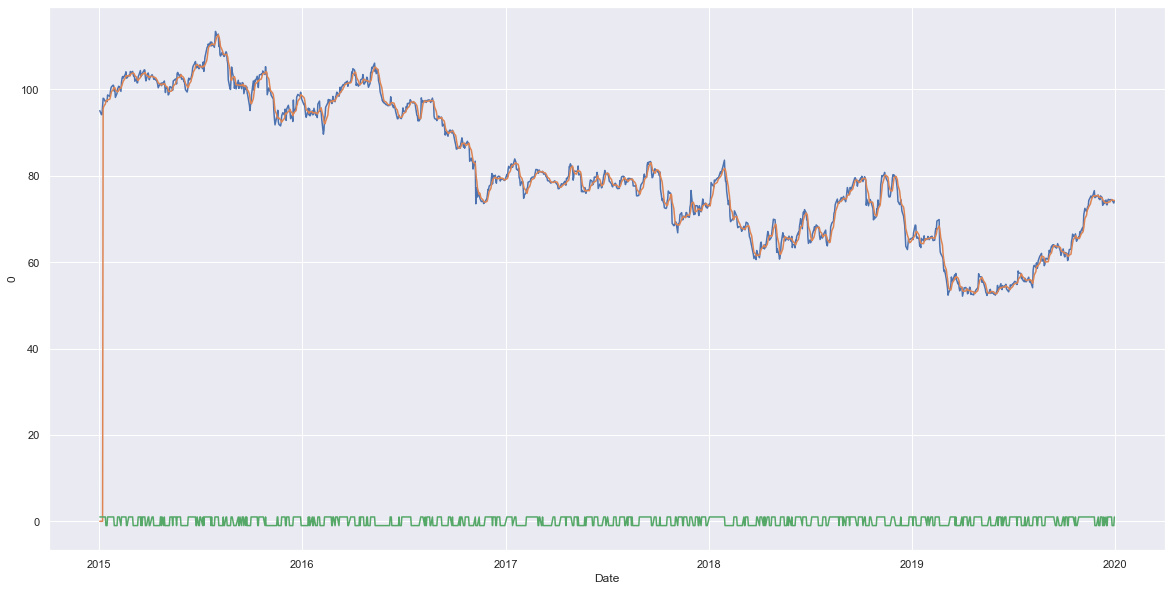

In [448]:
sns.set(rc={'figure.figsize':(20,10)})
pd.plotting.register_matplotlib_converters()
sns.lineplot(data = df_totaldata,x = 'Date',y = 'CVS')
sns.lineplot(data = df_rct_avg_5,x = 'Date',y = 'CVS')

sns.lineplot(data = df_modified_data_5,x = 'Date',y = 0)


In [128]:
df_temp = df_totaldata.copy()
df_temp.drop(columns = 'Date',inplace=True)

#create dataset with predictor variables as v(t) to v(t-9) with XX(t+1) as class
list_columns = list(range(10*df_temp.shape[1]))
df_newdata = pd.DataFrame(columns = list_columns)
LIMIT_LOWER = 9
limit_upper = df_temp.shape[0]-1

#create new dataset
for i in range(LIMIT_LOWER,limit_upper):
    row = df_temp.loc[i-9:i][::-1].T.melt()['value']
    row.index = range(0,len(list_columns))
    df_newdata = df_newdata.append(row,ignore_index = True)


In [129]:
#adding class column with name XX_tplus1
XX_tplus1 = df_modified_data_5.loc[LIMIT_LOWER+1:limit_upper,0]
XX_tplus1.index = range(0,limit_upper-LIMIT_LOWER)
df_newdata['XX_tplus1'] = XX_tplus1

In [130]:
#write to excel dataset
filepath = 'processed_data.xlsx'

with ExcelWriter(filepath) as writer:
    df_totaldata.to_excel(writer,sheet_name = 'total_data' )
    df_rct_avg_5.to_excel(writer,sheet_name = 'recent_avg_data_5' )
    df_modified_data_5.to_excel(writer,sheet_name = 'modified_data_5' )
    df_newdata.to_excel(writer,sheet_name = 'newdata' )
    writer.save()  


In [461]:
df_test[df_test['XX_tplus1'] == 1].describe()

0           1           2           3           4           5  \
count  130.000000  130.000000  130.000000  130.000000  130.000000  130.000000   
mean    78.919846   94.632970   66.559539   53.828923  127.943115   78.549000   
std     15.273299   24.446244    8.202295    8.277806   46.342791   14.817785   
min     52.430000   63.070507   48.880001   34.990002   61.974998   61.869999   
25%     67.970003   77.705441   59.392499   50.162499   91.690001   67.517502   
50%     77.324997   87.590000   66.849998   56.230000  116.110001   73.329998   
75%     92.699999  104.292500   72.087498   60.379999  152.962494   84.317497   
max    110.540001  152.850006   83.690002   67.010002  242.850006  119.800003   

                6           7           8           9  ...          91  \
count  130.000000  130.000000  130.000000  130.000000  ...  130.000000   
mean    99.122846   62.314550   40.730000  244.430692  ...   93.854571   
std     24.976993    5.407848    4.597436   56.747833  ...   23.909901   
min     64.269997   51.129414   29.400000  153.279999  ...   62.562546   
25%     78.920002   58.182352   38.145000  186.542500  ...   77.139999   
50%     86.994999   62.307842   39.514999  247.639999  ...   87.049999   
75%    126.974997   66.563725   43.745000  293.895004  ...  102.557497   
max    147.529999   72.533333   52.599998  368.790009  ...  147.529999   

               92          93          94          95          96          97  \
count  130.000000  130.000000  130.000000  130.000000  130.000000  130.000000   
mean    66.241077   53.915461  126.363269   79.055846   98.008615   62.259024   
std      8.783104    8.277243   45.339930   15.320520   24.020514    5.618880   
min     45.299999   34.320000   61.974998   61.619999   65.389999   51.403923   
25%     59.462499   50.052501   93.217497   67.784998   77.920000   56.840196   
50%     66.299999   56.045000  115.744999   74.140003   88.235001   61.849020   
75%     72.042501   60.545001  147.047497   84.402498  124.672501   66.737257   
max     84.059998   67.510002  242.960007  121.209999  142.839996   72.819611   

               98          99  XX_tplus1  
count  130.000000  130.000000      130.0  
mean    40.801616  241.675615        1.0  
std      4.600187   53.973172        0.0  
min     26.400000  141.729996        1.0  
25%     37.840001  188.917496        1.0  
50%     40.039999  244.320000        1.0  
75%     43.497500  287.104996        1.0  
max     52.279999  345.209991        1.0  

[8 rows x 101 columns]

In [462]:
df_test[df_test['XX_tplus1'] == -1].describe()

0           1           2           3           4           5  \
count  119.000000  119.000000  119.000000  119.000000  119.000000  119.000000   
mean    82.358739   90.625866   67.342605   55.496723  121.106218   81.768824   
std     15.944622   23.949861    8.308750    7.460426   46.218835   16.715288   
min     52.689999   63.608795   51.240002   35.900002   64.639999   61.619999   
25%     71.065002   71.910538   60.040001   52.020000   82.809998   67.424999   
50%     79.120003   82.139999   66.059998   57.380001  113.570000   75.830002   
75%     97.219997  101.730000   73.485001   61.125000  141.984993   96.544998   
max    112.820000  147.309998   84.230003   66.029999  246.259995  119.599998   

                6           7           8           9  ...          91  \
count  119.000000  119.000000  119.000000  119.000000  ...  119.000000   
mean    93.799832   62.200017   40.345883  226.705546  ...   90.237233   
std     23.903880    5.106684    4.917420   52.969995  ...   23.804871   
min     65.110001   52.423531   29.610001  149.619995  ...   62.191055   
25%     76.000000   58.013725   37.145000  177.934998  ...   72.054585   
50%     83.739998   62.298038   39.700001  211.050003  ...   83.389999   
75%    116.064999   66.413727   43.014999  273.585007  ...  101.810001   
max    143.990005   72.705879   52.139999  344.119995  ...  145.750000   

               92          93          94          95          96          97  \
count  119.000000  119.000000  119.000000  119.000000  119.000000  119.000000   
mean    67.823529   55.331345  120.890546   81.856891   93.685042   62.386805   
std      8.354242    7.755089   45.713078   16.050913   24.514269    5.352127   
min     51.730000   35.029999   62.195000   62.799999   65.459999   51.796078   
25%     61.480000   50.860001   81.520000   67.785000   75.295002   57.803921   
50%     66.599998   57.380001  114.190002   77.199997   82.620003   62.869999   
75%     75.035000   61.395000  148.070000   94.939999  114.295002   66.905884   
max     81.860001   66.430000  244.229996  118.160004  144.259995   72.705879   

               98          99  XX_tplus1  
count  119.000000  119.000000      119.0  
mean    40.163613  228.236387       -1.0  
std      4.918390   55.217817        0.0  
min     28.760000  146.839996       -1.0  
25%     37.549999  177.519997       -1.0  
50%     38.860001  215.399994       -1.0  
75%     43.405001  274.050003       -1.0  
max     50.830002  339.589996       -1.0  

[8 rows x 101 columns]

In [454]:
df_newdata.describe()

0            1            2            3            4  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000   
mean     80.813734    92.556356    67.256458    54.760088   124.257776   
std      15.879274    24.407922     8.557039     7.801273    46.527270   
min      52.130001    62.077332    43.419998    34.320000    61.930000   
25%      68.215002    73.053448    60.360001    50.872500    88.270000   
50%      78.760002    85.475002    67.434998    56.584999   114.220001   
75%      96.847498   102.647499    73.750000    60.849998   148.720001   
max     113.449997   153.339996    84.230003    68.580002   246.259995   

                 5            6            7            8            9  ...  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000  ...   
mean     80.277019    96.178718    62.064833    40.400296   235.108013  ...   
std      15.336341    24.487641     5.481330     4.897190    55.820992  ...   
min      60.540001    62.830002    49.756863    28.760000   145.979996  ...   
25%      67.712502    77.050003    57.475491    37.490002   180.417500  ...   
50%      74.830002    85.129997    62.078430    39.545000   235.105003  ...   
75%      87.897501   123.032499    66.655880    43.552500   280.444992  ...   
max     122.209999   149.259995    73.164703    53.560001   371.000000  ...   

                91           92           93           94           95  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000   
mean     91.922862    67.262668    54.724279   123.032316    80.514407   
std      23.989333     8.561983     7.802297    45.814169    15.370861   
min      62.077332    43.419998    34.320000    61.930000    60.540001   
25%      72.594770    60.360001    50.872500    87.225002    67.852501   
50%      85.114998    67.434998    56.509998   113.974998    75.000000   
75%     102.312498    73.779999    60.849998   148.147503    88.900002   
max     151.440002    84.230003    68.580002   246.259995   122.209999   

                96           97           98           99    XX_tplus1  
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000  
mean     95.643934    61.972049    40.218750   233.495152     0.044872  
std      24.181043     5.502973     4.916593    55.190718     0.999393  
min      62.830002    49.756863    25.750000   139.089996    -1.000000  
25%      76.860003    57.376472    37.417499   179.954998    -1.000000  
50%      84.834999    61.915688    39.465000   233.500000     1.000000  
75%     122.187498    66.592155    43.432500   278.510002     1.000000  
max     146.289993    73.164703    53.560001   365.880005     1.000000  

[8 rows x 101 columns]

In [134]:
#create train and test data with equal proportion of cl1 to cl-1
def create_traintestdata(prop,df_input):  
    #calculate trainset size for cl1 and cl_1
    train_cl1_size = round(0.8*df_input[df_input['XX_tplus1'] == 1].shape[0])
    train_cl_1_size = round(0.8*df_input[df_input['XX_tplus1'] == -1].shape[0])

    #cl1 cl_1 classification
    df_cl1 = df_input[df_input['XX_tplus1'] == 1]
    df_cl_1 = df_input[df_input['XX_tplus1'] == -1]
    
    #extract a random sample of 80% CL1 as train and 20% CL1 as test set
    df_train = df_cl1.sample(train_cl1_size)
    df_test = df_cl1.drop(df_train.index)
    
    #extract a random sample of 80% CL-1 as train and 20% CL-1 as test set
    cl_1_train = df_cl_1.sample(train_cl_1_size)
    cl_1_test = df_cl_1.drop(cl_1_train.index)

    #creating train and test sets by combinining CL1 and CL-1
    df_train = df_train.append(cl_1_train,ignore_index = True)
    df_test = df_test.append(cl_1_test,ignore_index = True)
    
    #Reset index    
    df_train.reset_index(drop=True,inplace = True)
    df_test.reset_index(drop=True,inplace = True)
    
    return df_train,df_test
    

df_train,df_test = create_traintestdata(80,df_newdata)



In [455]:
df_train.describe()

0           1           2           3           4           5  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean    80.876146   92.516084   67.336887   54.793514  124.153614   80.324184   
std     15.940361   24.460373    8.634966    7.773526   46.602120   15.225424   
min     52.130001   62.077332   43.419998   34.320000   61.930000   60.540001   
25%     68.000000   72.820316   60.584999   50.889999   88.075001   67.815002   
50%     78.790001   85.459999   67.709999   56.599998  114.089996   75.220001   
75%     96.940002  102.540001   74.000000   60.830000  148.639999   87.965000   
max    113.449997  153.339996   84.089996   68.580002  245.639999  122.209999   

                6           7           8           9  ...          91  \
count  999.000000  999.000000  999.000000  999.000000  ...  999.000000   
mean    96.078969   62.016235   40.363874  234.895746  ...   91.872279   
std     24.479455    5.537596    4.935492   55.907329  ...   24.028070   
min     62.830002   49.756863   28.760000  145.979996  ...   62.077332   
25%     77.030003   57.380394   37.445000  180.889999  ...   72.528427   
50%     84.970001   61.996078   39.520000  234.910004  ...   85.000000   
75%    123.035000   66.725487   43.555000  280.274994  ...  102.314999   
max    149.259995   73.164703   53.560001  371.000000  ...  151.440002   

               92          93          94          95          96          97  \
count  999.000000  999.000000  999.000000  999.000000  999.000000  999.000000   
mean    67.328799   54.757217  122.853984   80.544294   95.569560   61.885300   
std      8.555488    7.743855   45.910805   15.294349   24.161639    5.507414   
min     43.419998   34.330002   61.930000   60.540001   62.830002   49.756863   
25%     60.440001   50.934999   87.484997   67.975002   76.969997   57.231373   
50%     67.690002   56.439999  113.360001   75.209999   84.830002   61.866665   
75%     73.959999   60.779999  148.175003   89.049999  122.204998   66.513725   
max     84.230003   68.580002  246.259995  122.209999  146.289993   73.164703   

               98          99   XX_tplus1  
count  999.000000  999.000000  999.000000  
mean    40.149469  233.057047    0.045045  
std      4.955707   55.287786    0.999485  
min     25.750000  139.089996   -1.000000  
25%     37.360001  179.745003   -1.000000  
50%     39.400002  233.279999    1.000000  
75%     43.365000  278.544998    1.000000  
max     53.560001  365.880005    1.000000  

[8 rows x 101 columns]

In [456]:
df_test.describe()

0           1           2           3           4           5  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean    80.563333   92.717928   66.933775   54.625984  124.675683   80.087791   
std     15.661012   24.244615    8.245987    7.926019   46.316792   15.803419   
min     52.430000   63.070507   48.880001   34.990002   61.974998   61.619999   
25%     69.269997   73.563309   59.520000   50.730000   89.199997   67.500000   
50%     78.430000   85.480003   66.559998   56.509998  114.830002   73.900002   
75%     95.190002  102.940002   73.010002   60.849998  149.309998   87.800003   
max    112.820000  152.850006   84.230003   67.010002  246.259995  119.800003   

                6           7           8           9  ...          91  \
count  249.000000  249.000000  249.000000  249.000000  ...  249.000000   
mean    96.578916   62.259813   40.546426  235.959638  ...   92.125803   
std     24.565722    5.255806    4.747294   55.577149  ...   23.880364   
min     64.269997   51.129414   29.400000  149.619995  ...   62.191055   
25%     77.389999   58.039215   37.700001  179.110001  ...   73.123581   
50%     86.040001   62.298038   39.619999  238.059998  ...   85.480003   
75%    122.239998   66.529411   43.490002  281.670013  ...  102.129997   
max    147.529999   72.705879   52.599998  368.790009  ...  147.529999   

               92          93          94          95          96          97  \
count  249.000000  249.000000  249.000000  249.000000  249.000000  249.000000   
mean    66.997349   54.592128  123.747791   80.394498   95.942329   62.320092   
std      8.600129    8.047085   45.509223   15.704770   24.305224    5.482347   
min     45.299999   34.320000   61.974998   61.619999   65.389999   51.403923   
25%     59.830002   50.400002   87.000000   67.769997   76.480003   57.478432   
50%     66.510002   56.770000  115.050003   74.690002   84.849998   62.439999   
75%     73.349998   61.110001  147.940002   87.529999  121.760002   66.760788   
max     84.059998   67.510002  244.229996  121.209999  144.259995   72.819611   

               98          99   XX_tplus1  
count  249.000000  249.000000  249.000000  
mean    40.496707  235.252851    0.044177  
std      4.755997   54.875019    1.001036  
min     26.400000  141.729996   -1.000000  
25%     37.669998  180.919998   -1.000000  
50%     39.689999  235.059998    1.000000  
75%     43.500000  278.410004    1.000000  
max     52.279999  345.209991    1.000000  

[8 rows x 101 columns]

In [136]:
df_train_std = (df_train - df_train.mean())/df_train.std()

In [137]:
df_train_std.drop(columns='XX_tplus1',inplace=True)
df_train_std['class'] = df_train['XX_tplus1']
df_train_std

0         1         2         3         4         5         6  \
0   -1.544265  2.050824 -0.889047  0.202802  1.976657 -0.817986  2.045839   
1   -0.223091  0.542670  0.025838 -2.063866  0.445610 -0.417340  1.446970   
2   -1.427580  1.867670 -0.878624 -0.419824  1.908205 -1.080048  1.226377   
3    0.932466 -0.651786  1.156127  0.932201 -0.524088  0.203332 -0.778978   
4   -0.258221 -0.633518 -0.318113  0.343021 -0.915916 -0.491559 -1.016320   
..        ...       ...       ...       ...       ...       ...       ...   
994 -0.470889  0.408167 -0.919157 -2.196366  0.853746 -0.852140  1.643870   
995  1.224179 -1.171882  1.612411 -0.570335 -1.162686  1.382938 -0.736902   
996 -0.130872  0.382002  1.182763  0.763680  0.060649  0.207929  0.251682   
997 -0.974642  0.473170 -1.317537 -1.894059  0.543675 -0.858707  1.355464   
998 -0.043044  0.371373  1.342578  0.849870  0.055499  0.457512  0.219410   

            7         8         9  ...        91        92        93  \
0    1.113076  2.029408  0.825012  ...  1.995904 -1.125453  0.221180   
1    0.538111 -0.266209  1.729188  ...  0.490581  0.668717 -1.962487   
2    0.080137  1.800454  1.055215  ...  2.136573 -0.981685  0.141116   
3    1.321350 -1.167842 -0.984052  ... -0.738949  0.909498  1.091547   
4   -0.628956 -0.551895 -0.324390  ... -0.495349 -0.624020  0.799703   
..        ...       ...       ...  ...       ...       ...       ...   
994  0.668414  0.501698  1.388087  ...  0.668706 -0.195056 -2.294363   
995 -1.407236 -1.599409 -1.026981  ... -1.142508  1.652881 -0.516179   
996 -0.536893  0.449019  0.802654  ...  0.361565  1.318592  0.928838   
997  0.123123  0.438887  0.843972  ...  0.468108 -1.854809 -2.265954   
998 -0.141733  0.560456  0.847729  ...  0.321196  1.371190  1.019232   

           94        95        96        97        98        99  class  
0    1.408732 -0.889498  1.826467  1.460704  1.398495  0.926840      1  
1    0.456886 -0.321968  1.513161  0.312768 -0.139127  1.835902      1  
2    1.951959 -0.930036  1.916279  0.999507  1.858571  0.748501      1  
3   -0.529592  0.137679 -0.750759  1.074665 -1.279226 -0.830329      1  
4   -0.699922 -0.324583 -0.865403  0.077078 -0.316699 -0.560649      1  
..        ...       ...       ...       ...       ...       ...    ...  
994  0.870079 -0.709693  2.025129  1.457749  0.859722  1.758670     -1  
995 -1.152865  1.127587 -0.812013 -1.242355 -1.400299 -0.991124     -1  
996  0.023002  0.028488 -0.105935 -0.419222  0.668024  0.836404     -1  
997  0.660324 -1.176532  1.195301 -0.054651  0.191805  0.966271     -1  
998 -0.051491  0.078179 -0.255345 -0.363682  0.776989  0.772195     -1  

[999 rows x 101 columns]

In [138]:

df_test_std = (df_test - df_train.mean())/df_train.std()
df_test_std.drop(columns='XX_tplus1',inplace=True)
df_test_std['class'] = df_test['XX_tplus1']
df_test_std

0         1         2         3         4         5         6  \
0    1.168346 -1.201638  0.971992 -0.598636 -1.281350  1.527433 -1.095162   
1    1.404225 -1.141507  1.560297 -0.547179 -1.211932  1.266685 -0.991810   
2    1.369721 -1.172812  1.534819 -0.587058 -1.155497  1.189183 -0.859045   
3    1.159563 -1.203807  1.670315 -0.520165 -1.334244  1.409867 -0.796136   
4    1.322671 -1.059680  1.681896 -0.408246 -1.263325  1.866340 -0.694826   
..        ...       ...       ...       ...       ...       ...       ...   
244 -1.215540  1.823109 -1.359228 -0.392809  1.957344 -1.228484  0.776612   
245 -1.184800  1.928176 -1.351122 -0.109798  2.167849 -1.155579  0.902840   
246 -1.006009  1.795717 -1.075498 -0.220429  2.246816 -0.940807  1.181441   
247 -0.366124  2.210674  0.619935  0.297997  2.620189 -0.867246  1.791340   
248 -0.368633  2.240109  0.604879  0.359745  2.618687 -0.891547  1.819119   

            7         8         9  ...        91        92        93  \
0   -1.415026 -2.221435 -1.459840  ... -1.147872  0.813653 -0.323769   
1   -1.541789 -1.635880 -1.223377  ... -1.063626  0.962096 -0.172681   
2   -1.332170 -1.502155 -1.018037  ... -1.073723  1.698465 -0.381879   
3   -1.497882 -1.362351 -1.258435  ... -1.195201  1.938078 -0.301816   
4   -1.259937 -1.228626 -1.084755  ... -1.219812  1.761583 -0.429659   
..        ...       ...       ...  ...       ...       ...       ...   
244 -0.042660  1.601892  0.368364  ...  2.242282 -0.885841 -0.627235   
245  0.155982  1.772088  0.363893  ...  2.192341 -1.164025 -0.221752   
246 -0.013767  1.482350  0.924999  ...  1.949708 -1.272727 -0.083578   
247  1.434515  2.236074  1.914673  ...  1.842750  0.187155  0.164360   
248  1.288243  2.386008  1.953666  ...  2.126169  0.604431  0.241841   

           94        95        96        97        98        99  class  
0   -1.260139  1.238085 -0.934521 -1.371237 -2.774472 -1.651849      1  
1   -1.196428  1.522504 -0.975909 -1.134123 -1.507246 -1.285221      1  
2   -1.077502  1.421813 -0.808702 -1.053661 -1.390209 -0.909189      1  
3   -1.169419  1.514004 -0.737928 -1.087127 -1.242904 -0.917147      1  
4   -1.290742  1.599657 -0.872025 -1.350587 -1.238869 -1.206361      1  
..        ...       ...       ...       ...       ...       ...    ...  
244  2.009462 -0.953574  1.293391  0.229636  1.987714  0.820307     -1  
245  2.096152 -1.045111  1.064516 -0.149852  1.957446  0.758087     -1  
246  2.270838 -1.082380  1.028922  0.191505  1.743552  0.600548     -1  
247  2.563798 -1.094149  1.610836  1.142950  1.313744  1.536378     -1  
248  2.643735 -1.024189  1.828950  1.173817  1.824266  1.893962     -1  

[249 rows x 101 columns]

In [157]:
class MidpointNormalize(Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))


class SvmClassification:
    
    train_data = pd.DataFrame
    train_labels = pd.DataFrame
    train_Un  = pd.DataFrame
    test_data = pd.DataFrame
    test_labels = pd.DataFrame
    test_Un  = pd.DataFrame
    svm_master= Pipeline
    pred_train = pd.DataFrame
    pred_test = pd.DataFrame
    confmat_train = pd.DataFrame
    confmat_test = pd.DataFrame
    confmat_train_error = pd.DataFrame
    confmat_train_confint = pd.DataFrame
    confmat_test_error = pd.DataFrame
    confmat_test_confint = pd.DataFrame
    df_tune_data = pd.DataFrame


    def __init__(self,train_data,test_data):
        #initializing train data and train labels
        self.train_data = train_data.drop(columns = ['class'])
        self.train_labels = train_data['class']
        #self.train_Un = train_data['Un']

        #initializing test data and test labels
        self.test_data = test_data.drop(columns = ['class'])
        self.test_labels = test_data['class']
        #self.test_Un = test_data['Un']

        #initializing pred_train and pred_test
        self.pred_train = pd.DataFrame(0,index = ['total','cl1','cl_1'],
                                       columns = ['pred','error','conf_int'])
        self.pred_test = pd.DataFrame(0,index =['total','cl1','cl_1'],
                                       columns = ['pred','error','conf_int'])
        self.confmat_train = pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])
        self.confmat_train_confint = pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])

        self.confmat_train_error =  pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])
        self.confmat_train_confint =  pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])

        self.confmat_test_error = pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])
        self.confmat_test_confint = pd.DataFrame(0,index = ['true_CL1','true_CL_1'],
                                          columns = ['pred_CL1','pred_CL_1'])


    def svm_call(self,kernel_type,parameters,is_test):

        #choosing kernel based on type
        if kernel_type == 'linear':
            
            print('kernel_type: ',kernel_type)
            print('parameters: ',parameters)
            self.svm_master = SVC(kernel=kernel_type, C=parameters['C'])

        elif kernel_type == 'rbf':
            print('kernel_type: ',kernel_type)
            self.svm_master = SVC(kernel=kernel_type, gamma=parameters['gamma'], C=parameters['C'])

        elif kernel_type == 'poly':
            print('kernel_type: ',kernel_type)
            self.svm_master = SVC(kernel=kernel_type, 
                                degree = 4,coef0 = parameters['coef0'],
                                gamma = parameters['gamma'],C = parameters['C'])

        #######Train set fitted SVM######################
        #fitting train data into svm model   
        print('------Fitting train data into svm model-----')     
        self.svm_master.fit(self.train_data,self.train_labels)
        print('Score for above parameters in SVC model : ',
                self.svm_master.score(self.train_data,self.train_labels))
        size_data = self.train_data.shape[0]    

        #ROC plotting
        train_score = self.svm_master.fit(self.train_data, self.train_labels).decision_function(self.train_data)
        self.plot_roc(train_score,self.train_labels)

    #     #train data poly(x) vs svm(x)
    #     x_values = self.train_Un
    #     y_values = pd.Series(self.svm_master.decision_function(self.train_data))

    #     #plot poly(x)  and svm(x)
    #     self.plot_poly_svm(x_values,y_values) 

        #sv count and ratio
        number_sv = sum(self.svm_master.n_support_)
        print('Number of Support vectors,S : ',number_sv)
        ratio_sv = round(number_sv/size_data,2)
        print('Ratio of Support vectors,s : ',ratio_sv) 

        ########SVM applied on test set############  

        print('------SVM applied on test set-----')    
        print('Score for above parameters in SVC model for testset : ',
              self.svm_master.score(self.test_data,self.test_labels))
        #ROC plotting
        test_score = self.svm_master.fit(self.train_data, self.train_labels).decision_function(self.test_data)
        self.plot_roc(test_score,self.test_labels)

    #     #test data poly(x) vs svm(x)
    #     x_values = self.test_Un
    #     y_values = pd.Series(self.svm_master.decision_function(self.test_data))

    #     #plot poly(x)  and svm(x)
    #     self.plot_poly_svm(x_values,y_values) 


    def plot_roc(self,y_score,y_true):

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()

        # # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        #For CL1
        fpr[0], tpr[0], _ = roc_curve(y_true[y_score>0], y_score[y_score>0])
        roc_auc[0] = auc(fpr[0], tpr[0])
        #Plot of a ROC curve for a CL1
        plt.figure()
        lw = 2
        plt.plot(fpr[0], tpr[0], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic CL1')
        plt.legend(loc="lower right")
        plt.show()

        #For CL_1
        fpr[1], tpr[1], _ = roc_curve(y_true[y_score<0], y_score[y_score<0])
        roc_auc[1] = auc(fpr[1], tpr[1])
        #Plot of a ROC curve for a CL1
        plt.figure()
        lw = 2
        plt.plot(fpr[1], tpr[1], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic CL -1')
        plt.legend(loc="lower right")
        plt.show()

    def plot_poly_svm(self,x_values,y_values):

        col = np.where(np.sign(x_values) == np.sign(y_values),'g','r')

        fig = plt.figure()
        ax = fig.add_subplot(1,1, 1)
        fig.set_size_inches(8,6)
        ax.scatter(x_values,y_values,c=col, s=5, linewidth=0)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_color('none')
        ax.spines['left'].set_smart_bounds(True)
        ax.spines['bottom'].set_smart_bounds(True)
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_xlabel('poly(x)') 
        ax.xaxis.set_label_coords(1,0)
        ax.set_ylabel('svm(x)')
        ax.yaxis.set_label_coords(-0.1,1)
        ax.set_title("poly(x) Vs svm(x)")

    def tune(self,tuned_parameters,nfolds,is_test):

        kernel_type = tuned_parameters['kernel'][0]
        print('kernel_type : ',kernel_type)

        grid_search = GridSearchCV(SVC(), tuned_parameters, cv=nfolds)
        print('------Fitting train data into svm model-----')      
        grid_search.fit(self.train_data,self.train_labels)
        size_data = self.train_data.shape[0]
        #train data scores and plots
        self.best_params  = grid_search.best_params_
        #display scores and parameters
        print("# Tuning hyper-parameters\n")
        print("\nBest parameters set found on development set:\n")
        print(grid_search.best_params_)
        print("\nGrid scores on development set:\n")
        means = grid_search.cv_results_['mean_test_score']
        stds = grid_search.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, grid_search.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))

        #number of support vectors for train data model
        self.tune_sv_score(tuned_parameters,False)

#         #fitting test data into svm model
#         print('------calculating scores for test data for various svm models-----') 
#         size_data = self.test_data.shape[0]   
#         self.tune_sv_score(tuned_parameters,True)

        if kernel_type in ['rbf','poly']:
            print('in heatmap:',kernel_type)
            self.tune_heatmap(tuned_parameters,grid_search)

    def tune_sv_score(self,tuned_parameters,is_test):    
        # tuned_parameters = [{'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10,100]}]
        #C = tuned_parameters[0]['C']
        # tuned_parameters[0]['kernel'][0]
        # tuned_parameters = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
        # C = tuned_parameters['C']
        kernel_type = tuned_parameters['kernel'][0]
        tune_data_col = {'cost':[],'gamma':[],'coef0':[],'number_sv':[],
                         'ratio_sv':[],'score_tr':[],'score_tt':[],'score_diff':[]}
        self.df_tune_data = pd.DataFrame(tune_data_col) 


        if is_test:
          #fitting test data into svm model
          #print('------Fitting test data into svm model-----') 
            select_data =  self.test_data
            select_data_labels = self.test_labels        
          #size_data = self.test_data.shape[0]

        else:
          #fitting train data into svm model  
            print('------Fitting train data into svm model-----')
            select_data =  self.train_data
            select_data_labels = self.train_labels
        size_data = self.train_data.shape[0]


        #choosing kernel based on type
        if kernel_type == 'linear':
            C_range = tuned_parameters['C']
            for cost in C_range:        
                svm_sample = SVC(kernel=kernel_type, C=cost)
                svm_sample.fit(self.train_data,self.train_labels)

                #getting scores and SVs for each cost
                number_sv,svm_sam_tr_score,svm_sam_tt_score = self.calc_sv_score(
                  svm_sample,select_data,select_data_labels)

                ratio_sv = np.around(number_sv/size_data,2)
                append_data = {'cost':cost,'number_sv':number_sv,'ratio_sv':ratio_sv, 
                               'score_tr':svm_sam_tr_score,'score_tt':svm_sam_tt_score,
                               'score_diff':svm_sam_tr_score-svm_sam_tt_score}
                self.df_tune_data = self.df_tune_data.append(append_data,ignore_index = True)

                #plot ROC for each cost/parameter        
                test_score = svm_sample.fit(self.train_data, self.train_labels).decision_function(self.test_data)

    #             self.plot_roc(test_score,self.test_labels)

                #print('C: {0} ; Number of Support vectors,S : {1};score : {2}'.format(cost,number_sv,svm_sample_score))

            self.plot_tune_data(kernel_type)        

        elif kernel_type == 'rbf':
            
            C_range = tuned_parameters['C']
            gamma_range = tuned_parameters['gamma']
            for cost in C_range:
                for gamma in gamma_range:            
                    svm_sample = SVC(kernel=kernel_type, C=cost,gamma = gamma)
                    svm_sample.fit(self.train_data,self.train_labels)
                    #getting scores and SVs for each cost
                    number_sv,svm_sam_tr_score,svm_sam_tt_score = self.calc_sv_score(
                      svm_sample,select_data,select_data_labels)
                    ratio_sv = np.around(number_sv/size_data,2)
                    append_data = {'cost':cost,'gamma':gamma,'number_sv':number_sv,
                                 'ratio_sv':ratio_sv,'score_tr':svm_sam_tr_score,
                                 'score_tt':svm_sam_tt_score,'score_diff':svm_sam_tr_score-svm_sam_tt_score}
                    self.df_tune_data = self.df_tune_data.append(append_data,ignore_index = True)
                    #print('C: {0} ;gamma:{3} Number of Support vectors,S : {1};score : {2}'.format(cost,number_sv,svm_sample_score,gamma))
                    #plot ROC for each cost/parameter          
                    test_score = svm_sample.fit(self.train_data, self.train_labels).decision_function(self.test_data)
                    #self.plot_roc(test_score,self.test_labels)

            self.plot_tune_data(kernel_type)


        elif kernel_type == 'poly':
            print('kernel_type: ',kernel_type)
            C_range = tuned_parameters['C']
            coef0_range = tuned_parameters['coef0']
            gamma = tuned_parameters['gamma'][0]
            for cost in C_range:
                for coef0 in coef0_range:            
                    svm_sample = SVC(kernel=kernel_type,degree = 4,coef0 = coef0,
                                   gamma = gamma,C = cost)
                    svm_sample.fit(self.train_data,self.train_labels)
                    #getting scores and SVs for each cost
                    number_sv,svm_sam_tr_score,svm_sam_tt_score = self.calc_sv_score(
                      svm_sample,select_data,select_data_labels)
                    ratio_sv = np.around(number_sv/size_data,2)
                    append_data = {'cost':cost,'gamma':gamma,'number_sv':number_sv,
                                 'coef0':coef0,'ratio_sv':ratio_sv,'score_tr':svm_sam_tr_score,
                                 'score_tt':svm_sam_tt_score,'score_diff':svm_sam_tr_score-svm_sam_tt_score}
                    self.df_tune_data = self.df_tune_data.append(append_data,ignore_index = True)
                    #plot ROC for each cost/parameter        
                    test_score = svm_sample.fit(self.train_data, self.train_labels).decision_function(self.test_data)
                   # self.plot_roc(test_score,self.test_labels)

            self.plot_tune_data(kernel_type)

                  #print('C: {0} ;coef0:{3} Number of Support vectors,S : {1};score : {2}'.format(cost,number_sv,svm_sample_score,coef0))

    def plot_tune_data(self,kernel_type):
            print('df_tune_data:\n',self.df_tune_data)
            #{'cost':cost,'gamma':gamma,'number_sv':number_sv,
                            #  'ratio_sv':ratio_sv,'score_tr':svm_sam_tr_score,
                            #  'score_tt':svm_sam_tt_score}

            #cost vs ratio_sv
            ax = self.df_tune_data.plot('cost','ratio_sv',kind = 'scatter',title = 'cost vs sv ratio',style='b')
            self.df_tune_data.plot('cost','ratio_sv',kind = 'line',title = 'cost vs sv ratio',
                                    ax=ax,style='r',logx=True,grid=True)
            #cost vs score_Train and score_test
            # ax = self.df_tune_data.plot('cost',y = 'score_tr',kind = 'scatter',
            #                             title = 'cost vs Train score',style='b',logx=True,grid=True)
            # self.df_tune_data.plot('cost',y = 'score_tr',kind = 'line',title = 'cost vs Train score',
            #                         ax=ax,style='r',logx=True,grid=True)

            # ax1 = self.df_tune_data.plot('cost',y = 'score_tt',kind = 'scatter',
            #                             title = 'cost vs Test score',style='b',logx=True,grid=True)
            # self.df_tune_data.plot('cost',y = 'score_tt',kind = 'line',title = 'cost vs Test score',
            #                         ax=ax1,style='r',logx=True,grid=True)

            ax = self.df_tune_data.plot(x = 'cost', y =['score_tt','score_tr'],  title = 'cost vs score',
                                        logx=True,grid=True)
            # self.df_tune_data.plot(x = 'cost', y =['score_tt','score_tr'],  title = 'cost vs score',
            #                        ax=ax,logx=True,grid=True)

            if kernel_type == 'linear':                   
                pass
            elif kernel_type == 'rbf':
                #gamma vs ratio_sv
                ax = self.df_tune_data.plot('gamma','ratio_sv',kind = 'scatter',title = 'gamma vs sv ratio',style='b')
                self.df_tune_data.plot('gamma','ratio_sv',kind = 'line',title = 'gamma vs sv ratio',
                                     ax=ax,style='r',logx=True,grid=True)

                #gamma vs score Tr
                ax = self.df_tune_data.plot(x = 'gamma', y =['score_tt','score_tr'],  title = 'gamma vs score',
                                        logx=True,grid=True)
                # ax = self.df_tune_data.plot('gamma',y = 'score_tr',kind = 'scatter',title = 'gamma vs score Train',style='b')
                # self.df_tune_data.plot('gamma',y = 'score_tr',kind = 'line',title = 'gamma vs score Train',
                #                        ax=ax,style='r',logx=True,grid=True)

                # ax1 = self.df_tune_data.plot('gamma',y = 'score_tt',kind = 'scatter',
                #                             title = 'cost vs Test score',style='b',logx=True,grid=True)
                # self.df_tune_data.plot('gamma',y = 'score_tt',kind = 'line',title = 'gamma vs Test score',
                #                        ax=ax,style='r',logx=True,grid=True)


            elif kernel_type == 'poly':       

                #coef0 vs ratio_sv
                ax = self.df_tune_data.plot('coef0','ratio_sv',kind = 'scatter',title = 'coef0 vs sv ratio',style='b')
                self.df_tune_data.plot('coef0','ratio_sv',kind = 'line',title = 'coef0 vs sv ratio',
                                     ax=ax,style='r',logx=True,grid=True)

                #coef0 vs score Train
                ax = self.df_tune_data.plot(x = 'coef0', y =['score_tt','score_tr'],  title = 'coef0 vs score',
                                        logx=True,grid=True)

                # ax = self.df_tune_data.plot('coef0',y = 'score_tr',kind = 'scatter',title = 'coef0 vs score Train',style='b')
                # self.df_tune_data.plot('coef0',y = 'score_tr',kind = 'line',title = 'coef0 vs score Train',
                #                        ax=ax,style='r',logx=True,grid=True)

                # ax1 = self.df_tune_data.plot('coef0',y = 'score_tt',kind = 'scatter',
                #                             title = 'cost vs Test score',style='b',logx=True,grid=True)
                # self.df_tune_data.plot('coef0',y = 'score_tt',kind = 'line',title = 'coef0 vs Test score',
                #                        ax=ax,style='r',logx=True,grid=True)

    def calc_sv_score(self,svm_sample,select_data,select_data_labels):
        #train score
        svm_sample_tr_score = svm_sample.score(self.train_data,self.train_labels)

        #test score
        svm_sample_tt_score = svm_sample.score(self.test_data,self.test_labels)

        #getting decision function and identifying support vectors for train data - same for test data
        decision_function = svm_sample.decision_function(self.train_data)
        sv_indices = np.where(self.train_labels * decision_function <= 1)[0]
        support_vectors = self.train_data.loc[sv_indices]
        number_sv = sum(svm_sample.n_support_)
        return number_sv,svm_sample_tr_score,svm_sample_tt_score

    def tune_heatmap(self,tuned_parameters,grid):

        kernel_type = tuned_parameters['kernel'][0]
        if kernel_type == 'rbf':
            C_range = tuned_parameters['C']
            parameter_range = tuned_parameters['gamma']      
            parameter_name = 'gamma'
        elif kernel_type == 'poly':
            C_range = tuned_parameters['C']
            parameter_range = tuned_parameters['coef0']
            parameter_name = 'a'

        scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                  len(parameter_range))



        # Draw heatmap of the validation accuracy as a function of gamma and C
        #
        # The score are encoded as colors with the hot colormap which varies from dark
        # red to bright yellow. As the most interesting scores are all located in the
        # 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
        # as to make it easier to visualize the small variations of score values in the
        # interesting range while not brutally collapsing all the low score values to
        # the same color.

        plt.figure(figsize=(8, 6))
        plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
        plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
              norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
        plt.xlabel(parameter_name)

        plt.ylabel('C')
        plt.colorbar()
        plt.xticks(np.arange(len(parameter_range)), parameter_range, rotation=45)
        plt.yticks(np.arange(len(C_range)), C_range)
        plt.title('Validation accuracy')
        plt.show()


    def calc_correct_pred(self):
        #calculating correct prediction for train data
        self.pred_train.loc['total','pred'] = self.svm_master.score(self.train_data,self.train_labels)*100

        #Prediction accuracy on train set for CL1 and CL_1
        self.pred_train.loc['cl1','pred'] = self.svm_master.score(
            self.train_data[self.train_labels > 0],self.train_labels[self.train_labels > 0])*100

        self.pred_train.loc['cl_1','pred'] = self.svm_master.score(
            self.train_data[self.train_labels < 0],self.train_labels[self.train_labels < 0])*100

        #calculating correct prediction for test data
        self.pred_test.loc['total','pred'] = self.svm_master.score(self.test_data,self.test_labels)*100

        #Prediction accuracy on test set for CL1 and CL_1           
        self.pred_test.loc['cl1','pred'] = self.svm_master.score(
            self.test_data[self.test_labels > 0],self.test_labels[self.test_labels > 0])*100

        self.pred_test.loc['cl_1','pred'] = self.svm_master.score(
            self.test_data[self.test_labels < 0],self.test_labels[self.test_labels < 0])*100

    def calc_confusionmatrix(self):      
        #reading predictions for cl1 and cl_1
        pred_train_cl1 = self.pred_train.loc['cl1','pred']
        pred_train_cl_1 = self.pred_train.loc['cl_1','pred']

        #creating confusion matrix for train data
        confmat_train_data = np.array([pred_train_cl1,100-pred_train_cl1,100-pred_train_cl_1,pred_train_cl_1]).reshape(2,2)
        self.confmat_train = pd.DataFrame(np.around(confmat_train_data,2),index = ['true_CL1','true_CL_1'],columns = ['pred_CL1','pred_CL_1'])

        #reading predictions for cl1 and cl_1
        pred_test_cl1 = self.pred_test.loc['cl1','pred']
        pred_test_cl_1 = self.pred_test.loc['cl_1','pred']

        #creating confusion matrix for test data
        confmat_test_data = np.array([pred_test_cl1,100-pred_test_cl1,100-pred_test_cl_1,pred_test_cl_1]).reshape(2,2)
        self.confmat_test = pd.DataFrame(np.around(confmat_test_data,2),index = ['true_CL1','true_CL_1'],columns = ['pred_CL1','pred_CL_1'])


    def error_estimate(self):
        #error estimation for train data
        size_train_cl1 = sum(self.train_labels > 0)
        size_train_cl_1 = sum(self.train_labels < 0)
        #sigma estimation
        self.pred_train.loc['total','error'] = self.err_est_element(self.pred_train.loc['total','pred'],
                                                              self.train_data.shape[0],True)
        self.pred_train.loc['cl1','error'] = self.err_est_element(self.pred_train.loc['cl1','pred'],
                                                              size_train_cl1,True)
        self.pred_train.loc['cl_1','error'] = self.err_est_element(self.pred_train.loc['cl_1','pred'],
                                                              size_train_cl_1,True)
        #confidence interval calculation
        self.pred_train.loc['total','conf_int'] = self.err_est_element(self.pred_train.loc['total','pred'],
                                                              self.train_data.shape[0],False)
        self.pred_train.loc['cl1','conf_int'] = self.err_est_element(self.pred_train.loc['cl1','pred'],
                                                              size_train_cl1,False)
        self.pred_train.loc['cl_1','conf_int'] = self.err_est_element(self.pred_train.loc['cl_1','pred'],
                                                              size_train_cl_1,False)
        #sigma and confid interval estimation for confmat_train
        #calculations for first row
        #size = self.confmat_train.loc['true_CL1','pred_CL1']*size_train_cl1/100
        size = size_train_cl1
        self.confmat_train_error.loc['true_CL1','pred_CL1'] = self.err_est_element(self.confmat_train.loc['true_CL1','pred_CL1'],size,True)
        self.confmat_train_confint.loc['true_CL1','pred_CL1'] = self.err_est_element(self.confmat_train.loc['true_CL1','pred_CL1'],size,False)
        #size = self.confmat_train.loc['true_CL1','pred_CL_1']*size_train_cl1/100
        self.confmat_train_error.loc['true_CL1','pred_CL_1'] = self.err_est_element(self.confmat_train.loc['true_CL1','pred_CL_1'],size,True)
        self.confmat_train_confint.loc['true_CL1','pred_CL_1'] = self.err_est_element(self.confmat_train.loc['true_CL1','pred_CL_1'],size,False)

        #calculations for second row
        #size = self.confmat_train.loc['true_CL_1','pred_CL1']*size_train_cl_1/100
        size = size_train_cl_1
        self.confmat_train_error.loc['true_CL_1','pred_CL1'] = self.err_est_element(self.confmat_train.loc['true_CL_1','pred_CL1'],size,True)
        self.confmat_train_confint.loc['true_CL_1','pred_CL1'] = self.err_est_element(self.confmat_train.loc['true_CL_1','pred_CL1'],size,False)
        #size = self.confmat_train.loc['true_CL_1','pred_CL_1']*size_train_cl_1/100
        self.confmat_train_error.loc['true_CL_1','pred_CL_1'] = self.err_est_element(self.confmat_train.loc['true_CL_1','pred_CL_1'],size,True)
        self.confmat_train_confint.loc['true_CL_1','pred_CL_1'] = self.err_est_element(self.confmat_train.loc['true_CL_1','pred_CL_1'],size,False)

        #error estimation for test data
        size_test_cl1 = sum(self.test_labels > 0)
        size_test_cl_1 = sum(self.test_labels < 0)
        #sigma estimation
        self.pred_test.loc['total','error'] = self.err_est_element(self.pred_test.loc['total','pred'],
                                                              self.test_data.shape[0],True)
        self.pred_test.loc['cl1','error'] = self.err_est_element(self.pred_test.loc['cl1','pred'],
                                                              size_test_cl1,True)
        self.pred_test.loc['cl_1','error'] = self.err_est_element(self.pred_test.loc['cl_1','pred'],
                                                              size_test_cl_1,True)
        #confidence interval calculation
        self.pred_test.loc['total','conf_int'] = self.err_est_element(self.pred_test.loc['total','pred'],
                                                              self.test_data.shape[0],False)
        self.pred_test.loc['cl1','conf_int'] = self.err_est_element(self.pred_test.loc['cl1','pred'],
                                                              size_test_cl1,False)
        self.pred_test.loc['cl_1','conf_int'] = self.err_est_element(self.pred_test.loc['cl_1','pred'],
                                                              size_test_cl_1,False)

        #sigma and confid interval estimation for confmat_test
        #calculations for first row for true_cl1
        #size = self.confmat_test.loc['true_CL1','pred_CL1']*size_test_cl1/100
        size = size_test_cl1
        self.confmat_test_error.loc['true_CL1','pred_CL1'] = self.err_est_element(self.confmat_test.loc['true_CL1','pred_CL1'],size,True)
        self.confmat_test_confint.loc['true_CL1','pred_CL1'] = self.err_est_element(self.confmat_test.loc['true_CL1','pred_CL1'],size,False)
        #size = self.confmat_test.loc['true_CL1','pred_CL_1']*size_test_cl1/100
        self.confmat_test_error.loc['true_CL1','pred_CL_1'] = self.err_est_element(self.confmat_test.loc['true_CL1','pred_CL_1'],size,True)
        self.confmat_test_confint.loc['true_CL1','pred_CL_1'] = self.err_est_element(self.confmat_test.loc['true_CL1','pred_CL_1'],size,False)

        #calculations for second row for true_cl_1
        #size = self.confmat_test.loc['true_CL_1','pred_CL1']*size_test_cl_1/100
        size = size_test_cl_1
        self.confmat_test_error.loc['true_CL_1','pred_CL1'] = self.err_est_element(self.confmat_test.loc['true_CL_1','pred_CL1'],size,True)
        self.confmat_test_confint.loc['true_CL_1','pred_CL1'] = self.err_est_element(self.confmat_test.loc['true_CL_1','pred_CL1'],size,False)
        #size = self.confmat_test.loc['true_CL_1','pred_CL_1']*size_test_cl_1/100
        self.confmat_test_error.loc['true_CL_1','pred_CL_1'] = self.err_est_element(self.confmat_test.loc['true_CL_1','pred_CL_1'],size,True)
        self.confmat_test_confint.loc['true_CL_1','pred_CL_1'] = self.err_est_element(self.confmat_test.loc['true_CL_1','pred_CL_1'],size,False)

        # print('For 95% confidence level, Errors of estimation on {0} = {1} is {2} and confidence interval is {3}'.
        #     format(term_name,term,sigma,conf_int))

    def err_est_element(self,term,size,return_sigma):
        sigma = np.around(math.sqrt(term*(100-term)/size),2)

        #for 95% confidence level
        Z_VAL = 1.96
        limit_lower = np.around((term - Z_VAL*sigma),2)
        if limit_lower < 0:
          #print('before if:',limit_lower)
          limit_lower = 0
          #print('after if:',limit_lower)

        limit_upper = np.around((term + Z_VAL*sigma),2)
        if limit_upper > 100:
          #print('before if:',limit_upper)
          limit_upper = 100
          #print('after if:',limit_upper)      

        conf_int = [limit_lower,limit_upper]

        if return_sigma:
            return sigma
        else:
            return str(conf_int)



# Run the svm() function on the set TRAIN
Fix arbitrarily the "cost" parameter in the svm() function, for instance cost = 5; Select the kernel parameter kernel = "linear "



In [144]:
#create linear SVM with parameter C
svm_linear = SvmClassification(df_train_std.copy(),df_test_std.copy())


kernel_type:  linear
parameters:  {'C': 5}
------Fitting train data into svm model-----
Score for above parameters in SVC model :  0.7867867867867868


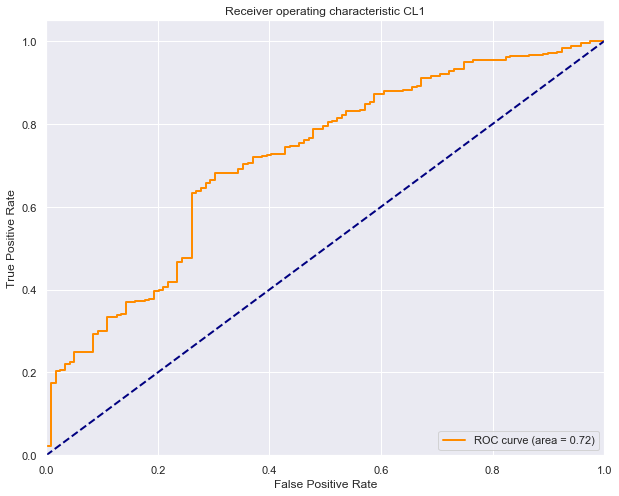

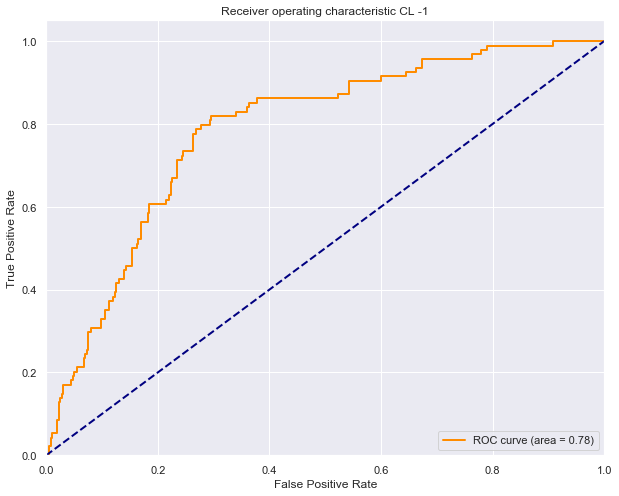

Number of Support vectors,S :  606
Ratio of Support vectors,s :  0.61
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.7028112449799196


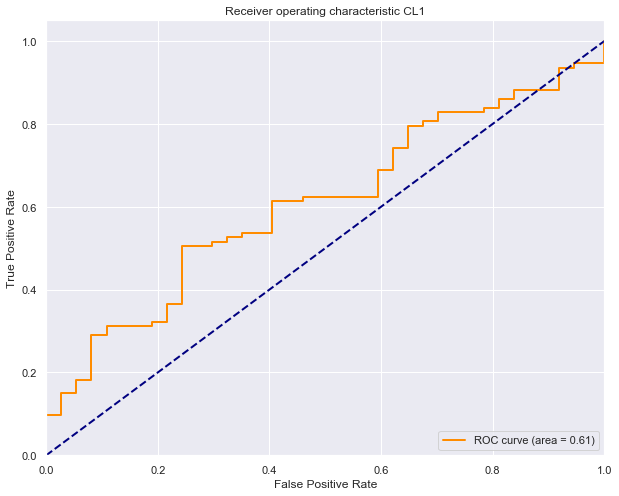

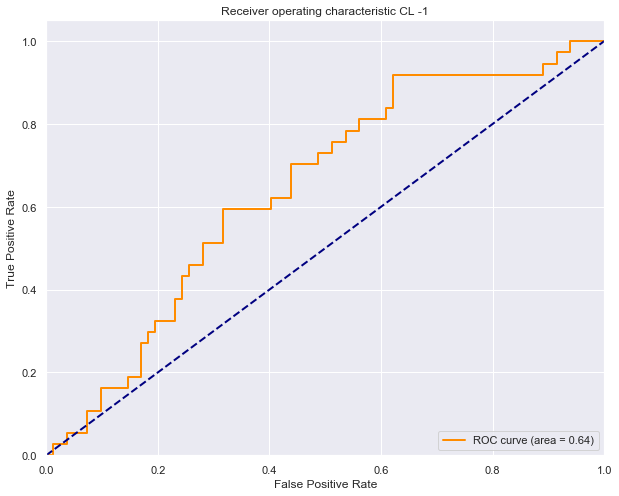

In [145]:
#compute the number S of support vectors and the ratio s = S/4000
#creating dicitionary for parameters
parameters = {'C':5}
kernel_type = 'linear'
svm_linear.svm_call(kernel_type,parameters,False)

In [146]:
#compute the percentages of correct prediction PredTrain and PredTest on the sets TRAIN and TEST
svm_linear.calc_correct_pred()
print(svm_linear.pred_train['pred'])
print(svm_linear.pred_test['pred'])

# compute two confusion matrices (one for the set TRAIN and one for the test set
# confusion matrices must be converted in terms of frequencies of correct predictions within each class
svm_linear.calc_confusionmatrix()
print(svm_linear.confmat_train)
print(svm_linear.confmat_test)

# compute the errors of estimation on PredTRAIN, PredTEST, and on the terms of the confusion matrices
svm_linear.error_estimate()
print(svm_linear.pred_train)
print(svm_linear.pred_test)

#print('confmat_train_error:\n',svm_linear.confmat_train_error)
print('confmat_train_confint:\n',svm_linear.confmat_train_confint)
#print('confmat_test_error:\n',svm_linear.confmat_test_error)
print('confmat_test_confint:\n',svm_linear.confmat_test_confint)

# interpret your results

total    78.678679
cl1      81.992337
cl_1     75.052411
Name: pred, dtype: float64
total    70.281124
cl1      71.538462
cl_1     68.907563
Name: pred, dtype: float64
           pred_CL1  pred_CL_1
true_CL1      81.99      18.01
true_CL_1     24.95      75.05
           pred_CL1  pred_CL_1
true_CL1      71.54      28.46
true_CL_1     31.09      68.91
            pred  error        conf_int
total  78.678679   1.30  [76.13, 81.23]
cl1    81.992337   1.68   [78.7, 85.29]
cl_1   75.052411   1.98  [71.17, 78.93]
            pred  error       conf_int
total  70.281124   2.90  [64.6, 75.97]
cl1    71.538462   3.96  [63.78, 79.3]
cl_1   68.907563   4.24  [60.6, 77.22]
confmat_train_confint:
                  pred_CL1       pred_CL_1
true_CL1    [78.7, 85.28]   [14.72, 21.3]
true_CL_1  [21.07, 28.83]  [71.17, 78.93]
confmat_test_confint:
                 pred_CL1      pred_CL_1
true_CL1   [63.78, 79.3]  [20.7, 36.22]
true_CL_1  [22.78, 39.4]  [60.6, 77.22]


kernel_type :  linear
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.523 (+/-0.005) for {'C': 0.001, 'kernel': 'linear'}
0.537 (+/-0.066) for {'C': 0.01, 'kernel': 'linear'}
0.658 (+/-0.051) for {'C': 0.1, 'kernel': 'linear'}
0.725 (+/-0.045) for {'C': 1, 'kernel': 'linear'}
0.726 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
0.709 (+/-0.063) for {'C': 100, 'kernel': 'linear'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
       cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0    0.001    NaN    NaN      959.0      0.96  0.522523  0.522088    0.000434
1    0.010    NaN    NaN      954.0      0.95  0.605606  0.582329    0.023276
2    0.100    NaN    NaN      845.0      0.85  0.705706  0.674699    0.031007
3    1.000    NaN    NaN      704.0      0.70  0.781782  0.702811    0.078971
4   10.000    NaN    NaN      577.0      0.58  0.790791  0.694779    0.096012
5  100.000    NaN    NaN      542.0      0.54  0.788789  0.658635    0.130154


{'C': 10, 'kernel': 'linear'}

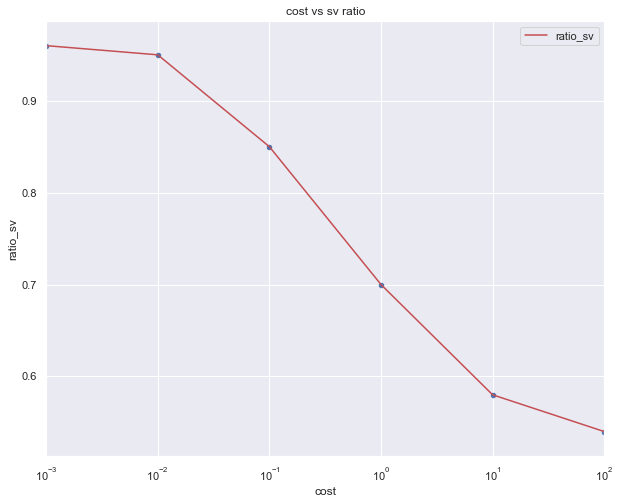

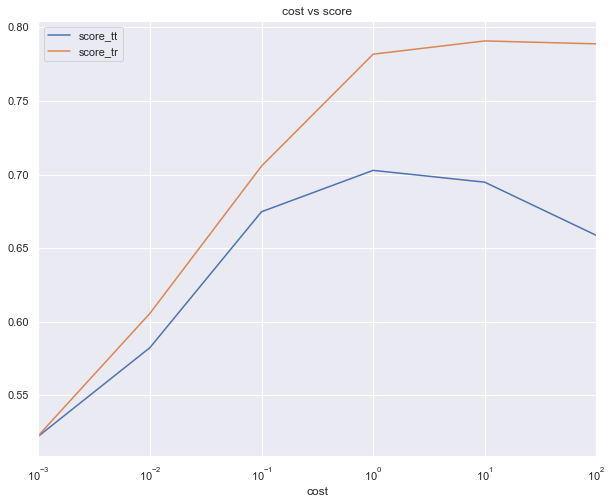

In [147]:
# **Question 3 : optimize the parameter "cost"**

# Select a list of 6 values for the "cost " parameter
# Run the tuning function tune() for the linear svm() to identify the best value of "cost"


# Set the parameters by cross-validation
tuned_parameters = {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10,100]}
nfolds = 10
#building SVMs with train dataset and calculating SV ratio and scores
svm_linear.tune(tuned_parameters,nfolds,False)

# Evaluate the performance characteristics of the "best" linear svm as in question 2

svm_linear.best_params 

kernel_type :  linear
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 10, 'kernel': 'linear'}

Grid scores on development set:

0.633 (+/-0.092) for {'C': 0.05, 'kernel': 'linear'}
0.658 (+/-0.051) for {'C': 0.1, 'kernel': 'linear'}
0.725 (+/-0.045) for {'C': 1, 'kernel': 'linear'}
0.724 (+/-0.036) for {'C': 5, 'kernel': 'linear'}
0.726 (+/-0.037) for {'C': 10, 'kernel': 'linear'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
     cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0   0.05    NaN    NaN      885.0      0.89  0.680681  0.638554    0.042126
1   0.10    NaN    NaN      845.0      0.85  0.705706  0.674699    0.031007
2   1.00    NaN    NaN      704.0      0.70  0.781782  0.702811    0.078971
3   5.00    NaN    NaN      606.0      0.61  0.786787  0.702811    0.083976
4  10.00    NaN    NaN      577.0      0.58  0.790791  0.694779    0.096012


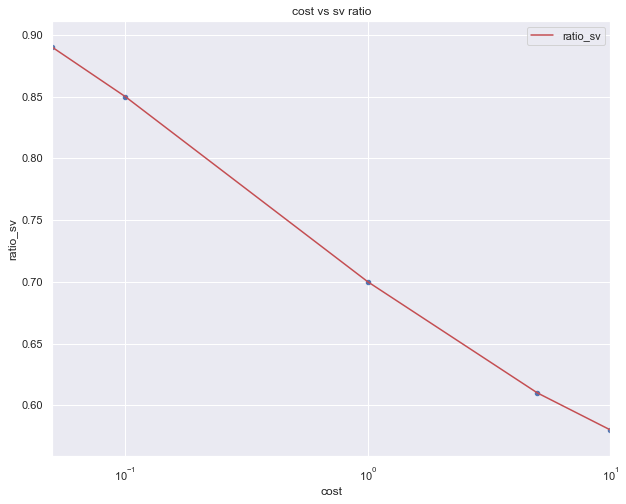

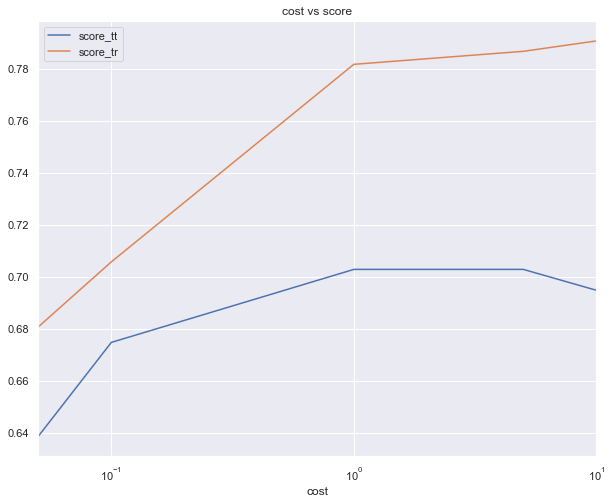

In [148]:
# Set the parameters by cross-validation for finetuning 0.1 to 20
tuned_parameters = {'kernel': ['linear'], 'C': [0.05,0.1, 1, 5,10]}
nfolds = 10
#building SVMs with train dataset and calculating SV ratio and scores
svm_linear.tune(tuned_parameters,nfolds,False)


kernel_type:  linear
parameters:  {'C': 10, 'kernel': 'linear'}
------Fitting train data into svm model-----
Score for above parameters in SVC model :  0.7907907907907908


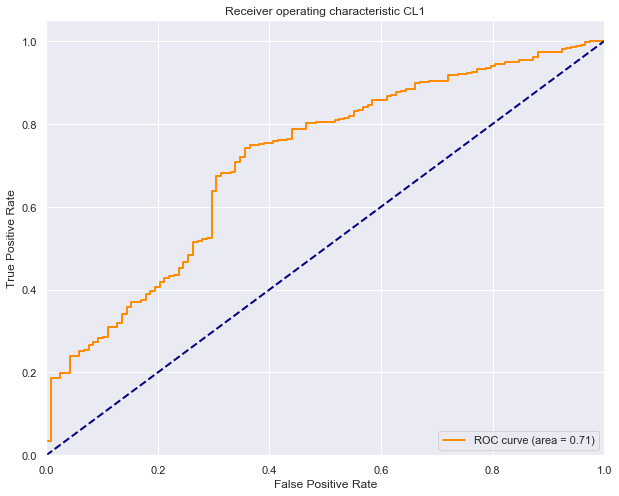

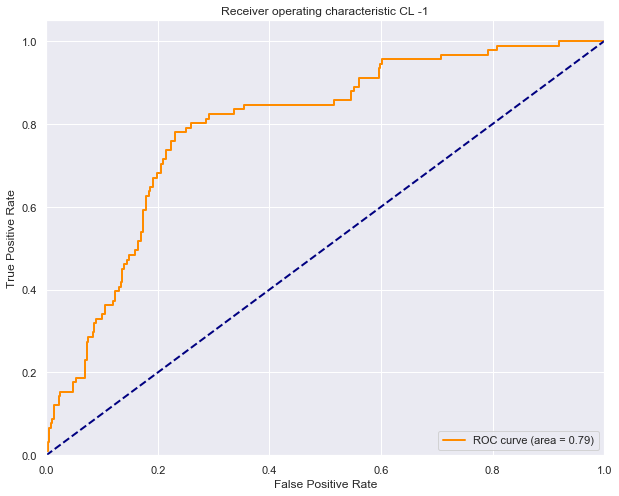

Number of Support vectors,S :  577
Ratio of Support vectors,s :  0.58
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.6947791164658634


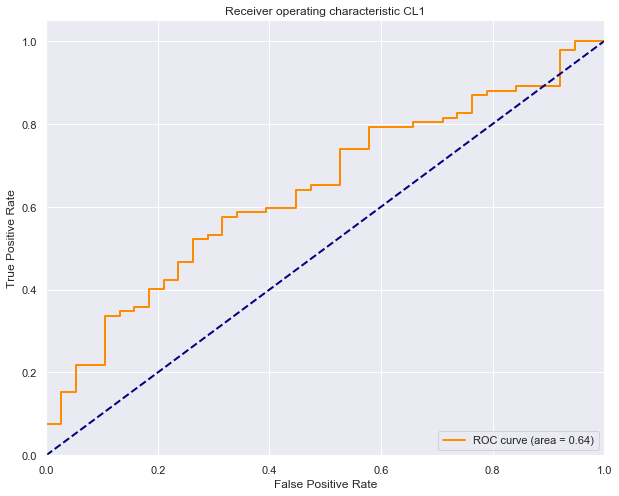

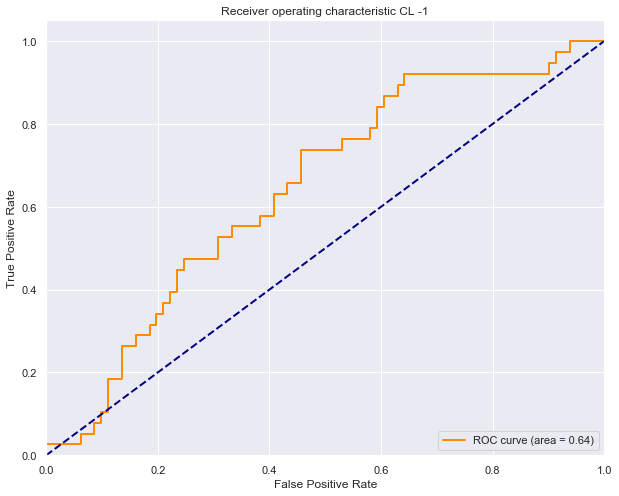

total    79.079079
cl1      82.567050
cl_1     75.262055
Name: pred, dtype: float64
total    69.477912
cl1      70.769231
cl_1     68.067227
Name: pred, dtype: float64
           pred_CL1  pred_CL_1
true_CL1      82.57      17.43
true_CL_1     24.74      75.26
           pred_CL1  pred_CL_1
true_CL1      70.77      29.23
true_CL_1     31.93      68.07
            pred  error        conf_int
total  79.079079   1.29  [76.55, 81.61]
cl1    82.567050   1.66  [79.31, 85.82]
cl_1   75.262055   1.98  [71.38, 79.14]
            pred  error        conf_int
total  69.477912   2.92   [63.75, 75.2]
cl1    70.769231   3.99  [62.95, 78.59]
cl_1   68.067227   4.27   [59.7, 76.44]
confmat_train_confint:
                  pred_CL1       pred_CL_1
true_CL1   [79.32, 85.82]  [14.18, 20.68]
true_CL_1  [20.86, 28.62]  [71.38, 79.14]
confmat_test_confint:
                  pred_CL1       pred_CL_1
true_CL1   [62.95, 78.59]  [21.41, 37.05]
true_CL_1   [23.56, 40.3]   [59.7, 76.44]


In [149]:
#creating svm_master for best
kernel_type = svm_linear.best_params['kernel']
parameters = svm_linear.best_params 
svm_linear.svm_call(kernel_type,parameters,False)

#calculating PredTrain and PredTest for best SVM
svm_linear.calc_correct_pred()
print(svm_linear.pred_train['pred'])
print(svm_linear.pred_test['pred'])

#calulating confusion matrix for best params
svm_linear.calc_confusionmatrix()
print(svm_linear.confmat_train)
print(svm_linear.confmat_test)

#error estimation for best params
svm_linear.error_estimate()
print(svm_linear.pred_train)
print(svm_linear.pred_test)
#print('confmat_train_error:\n',svm_linear.confmat_train_error)
print('confmat_train_confint:\n',svm_linear.confmat_train_confint)
#print('confmat_test_error:\n',svm_linear.confmat_test_error)
print('confmat_test_confint:\n',svm_linear.confmat_test_confint)

In [163]:
# Question 4: SVM classification by radial kernel
# Fix the "cost" parameter in the svm() function to the best cost value identified in question 3
# Select the kernel parameter kernel = "radial " which means that the kernel ks given by the formula
# K(x,y) = exp(-gamma || x- y ||2)
# Select arbitrarily the gamma parameter "gamma" = 1
# Run the svm() function on the set TRAIN

svm_radial = SvmClassification(df_train_std.copy(),df_test_std.copy())

kernel_type:  rbf
------Fitting train data into svm model-----
Score for above parameters in SVC model :  1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


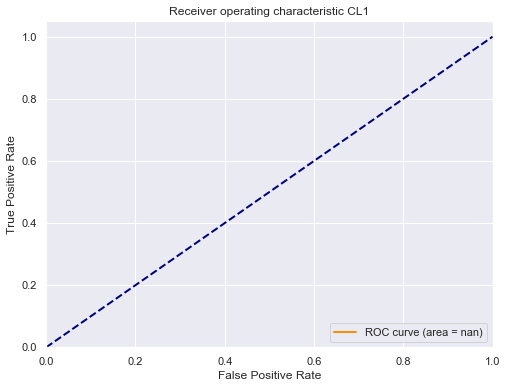

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


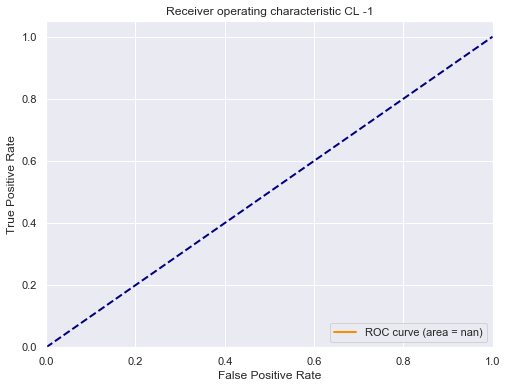

Number of Support vectors,S :  976
Ratio of Support vectors,s :  0.98
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.7068273092369478


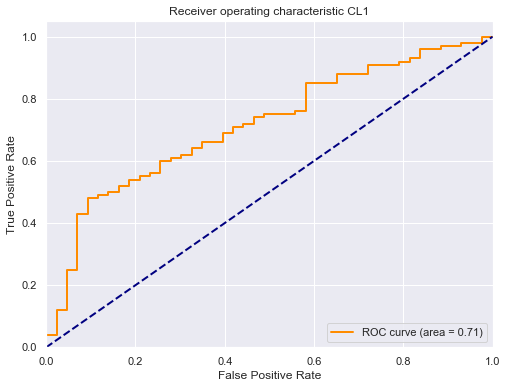

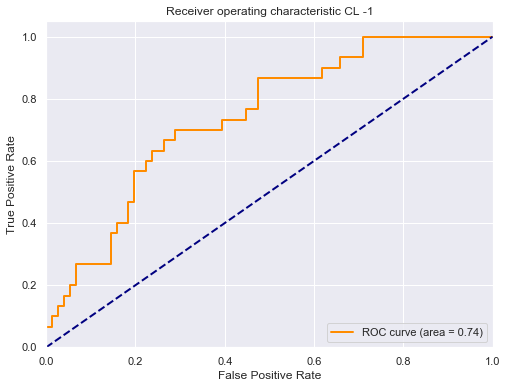

In [164]:
#as in question 2 compute the number S and the ratio s = S/4000
#Build Radial kernel SVM with cost as linear's best cost and gamma = 1
parameters = {'kernel': ['rbf'], 'C': svm_linear.best_params['C'],'gamma' : 1}

#build SVM with Training set
svm_radial.svm_call("rbf",parameters,False)

In [165]:
#the percentages of correct predictions PredTrain and PredTest and the two confusion matrices
svm_radial.calc_correct_pred()
print('Predictions Train:\n',svm_radial.pred_train)
print('Predictions Test:\n',svm_radial.pred_test)

svm_radial.calc_confusionmatrix()
print('Confusion matrix for Train:\n',svm_radial.confmat_train)
print('Confusion matrix for Test:\n',svm_radial.confmat_test)

svm_radial.error_estimate()
print('prediction errors train:\n',svm_radial.pred_train)
print('prediction errors test:\n',svm_radial.pred_test)

#print('confmat_train_error:\n',svm_radial.confmat_train_error)
print('confmat_train_confint:\n',svm_radial.confmat_train_confint)
#print('confmat_test_error:\n',svm_radial.confmat_test_error)
print('confmat_test_confint:\n',svm_radial.confmat_test_confint)

#interpret your results

Predictions Train:
         pred  error  conf_int
total  100.0      0         0
cl1    100.0      0         0
cl_1   100.0      0         0
Predictions Test:
             pred  error  conf_int
total  70.682731      0         0
cl1    76.923077      0         0
cl_1   63.865546      0         0
Confusion matrix for Train:
            pred_CL1  pred_CL_1
true_CL1      100.0        0.0
true_CL_1       0.0      100.0
Confusion matrix for Test:
            pred_CL1  pred_CL_1
true_CL1      76.92      23.08
true_CL_1     36.13      63.87
prediction errors train:
         pred  error        conf_int
total  100.0    0.0  [100.0, 100.0]
cl1    100.0    0.0  [100.0, 100.0]
cl_1   100.0    0.0  [100.0, 100.0]
prediction errors test:
             pred  error        conf_int
total  70.682731   2.88  [65.04, 76.33]
cl1    76.923077   3.70  [69.67, 84.18]
cl_1   63.865546   4.40  [55.24, 72.49]
confmat_train_confint:
                  pred_CL1       pred_CL_1
true_CL1   [100.0, 100.0]      [0.0, 0.0]

kernel_type :  rbf
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.641 (+/-0.043) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.709 (+/-0.045) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.703 (+/-0.052) for {'C': 10, 'gamma': 1.0, 'kernel': 'rbf'}
0.543 (+/-0.019) for {'C': 10, 'gamma': 10.0, 'kernel': 'rbf'}
0.525 (+/-0.000) for {'C': 10, 'gamma': 100.0, 'kernel': 'rbf'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
    cost   gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0  10.0    0.01    NaN      798.0      0.80  0.781782  0.606426    0.175356
1  10.0    0.10    NaN      713.0      0.71  0.941942  0.710843    0.231099
2  10.0    1.00    NaN      976.0      0.98  1.000000  0.706827    0.293173
3  10.0   10.00    NaN      999.0      1.00  1.000000  0.546185    0.453815
4  10.0  100.00    NaN      999.0      1.00  1.000000  0.522088    0.477912


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


in heatmap: rbf


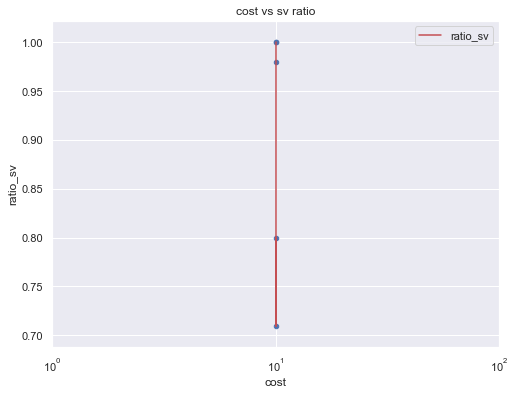

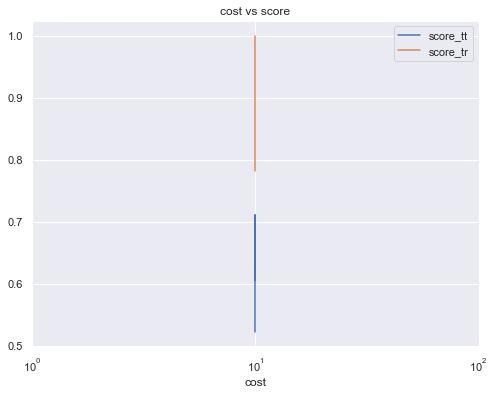

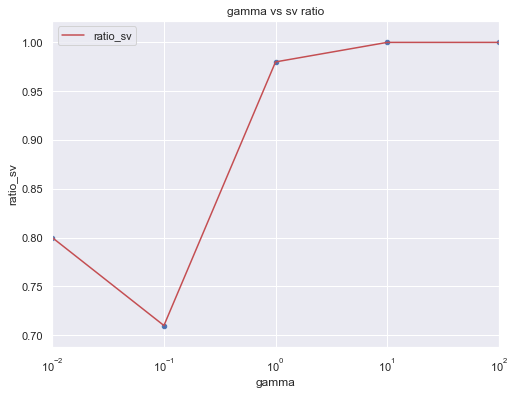

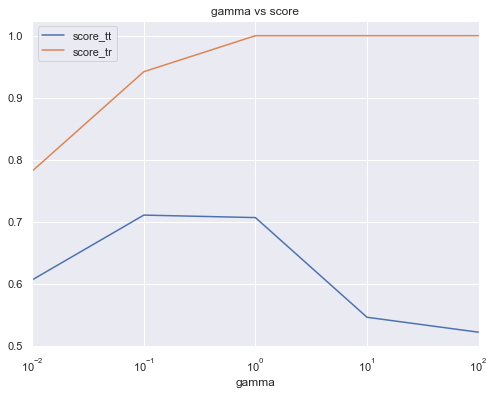

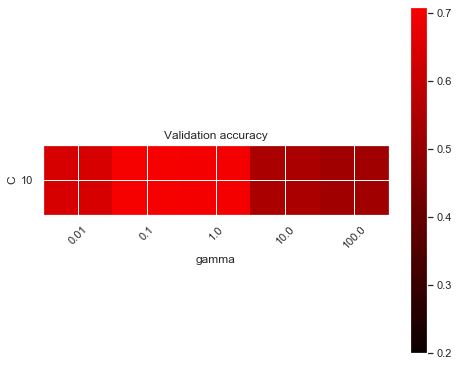

In [166]:
# Question 5 : optimize the parameter "cost"and "gamma"
# Select a list of 5 values for the "cost " parameter and a list of 5 values for the parameter "gamma"
# On the TRAIN set , run the tuning function tune() for the radial svm() to identify the best value of the
# pair ("cost", "gamma") among the 25 values you have listed


# Set the parameters by cross-validation with C= best_param of linear and gamma as below

C_range = [svm_linear.best_params['C']]
gamma_range = np.logspace(-2, 2, 5)

tuned_parameters = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

svm_radial.tune(tuned_parameters,nfolds,False)


kernel_type :  rbf
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}

Grid scores on development set:

0.698 (+/-0.039) for {'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}
0.681 (+/-0.055) for {'C': 10, 'gamma': 0.03, 'kernel': 'rbf'}
0.709 (+/-0.045) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.707 (+/-0.063) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.711 (+/-0.052) for {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
    cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0  10.0   0.05    NaN      726.0      0.73  0.895896  0.690763    0.205133
1  10.0   0.03    NaN      747.0      0.75  0.850851  0.682731    0.168120
2  10.0   0.10    NaN      713.0      0.71  0.941942  0.710843    0.231099
3  10.0   0.20    NaN      758.0      0.76  0.984985  0.730924    0.254061
4  10.0   0.30    NaN      810.0      0.81  1.000000  0.734940    0.265060


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 10.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


in heatmap: rbf


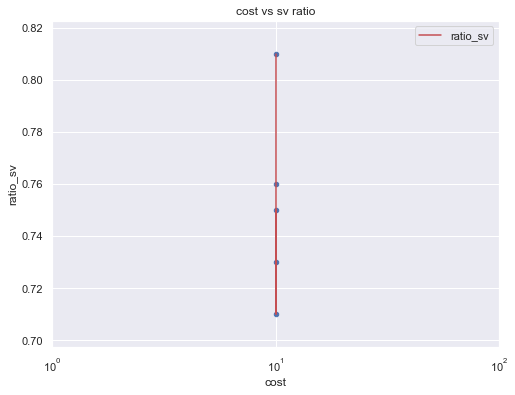

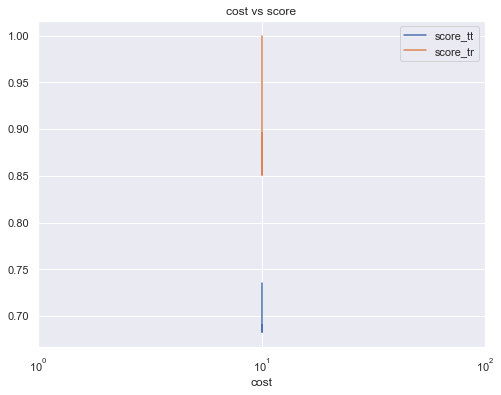

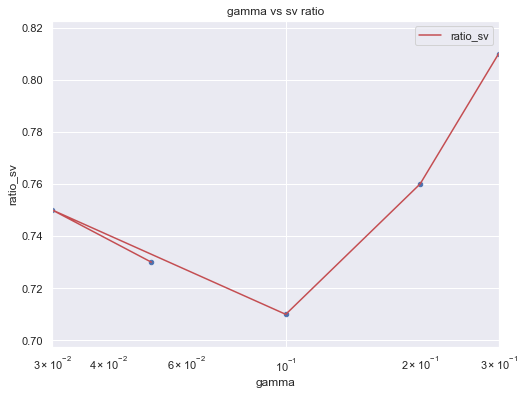

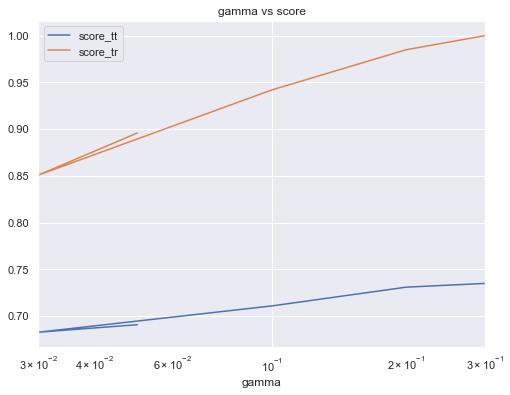

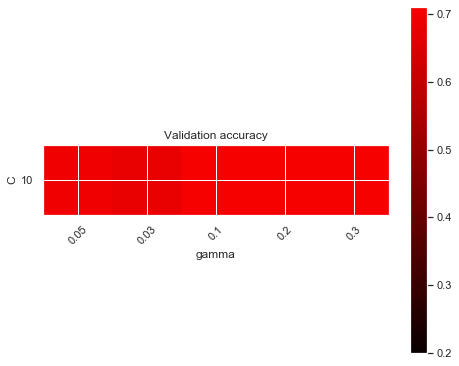

In [172]:

#finetuning for gamma between 0.1 to 10
C_range = [svm_linear.best_params['C']]
#gamma_range = [0.05,0.1,0.5,1,5,8]
gamma_range = [0.05,0.03,0.1,0.2,0.3]

tuned_parameters = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
svm_radial.tune(tuned_parameters,nfolds,False)

kernel_type :  rbf
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.649 (+/-0.058) for {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.709 (+/-0.045) for {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 100.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 10000.0, 'gamma': 0.1, 'kernel': 'rbf'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
       cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0      1.0    0.1    NaN      888.0      0.89  0.783784  0.614458    0.169326
1     10.0    0.1    NaN      713.0      0.71  0.941942  0.710843    0.231099
2    100.0    0.1    NaN      684.0      0.68  1.000000  0.730924    0.269076
3   1000.0    0.1    NaN      684.0      0.68  1.000000  0.730924    0.269076
4  10000.0    0.1    NaN      684.0      0.68  1.000000  0.730924    0.269076


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


in heatmap: rbf


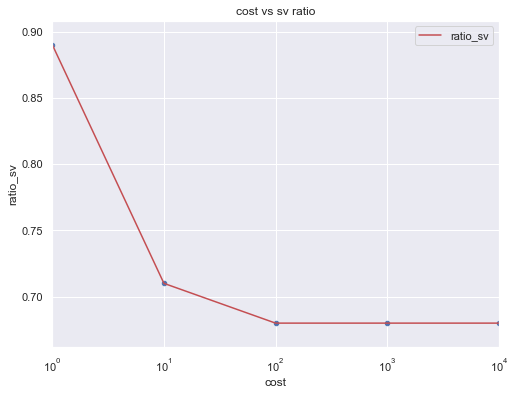

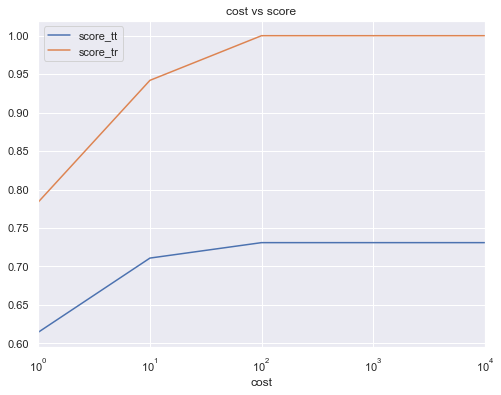

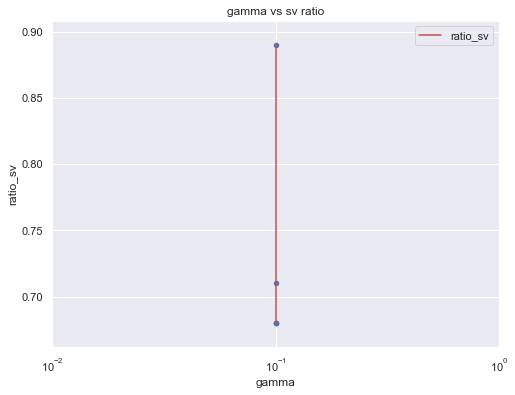

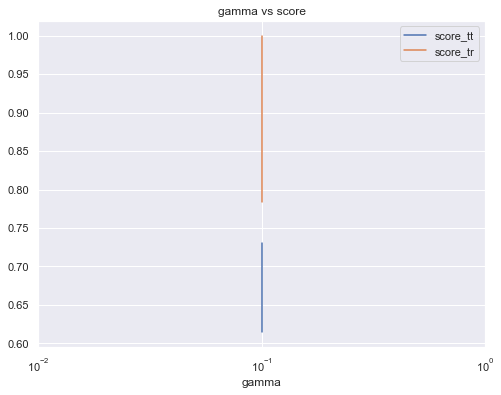

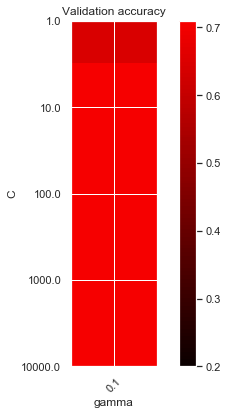

In [174]:
# gamma fixed to 0.1
#broad tuning  for cost 
C_range = np.logspace(0, 4, 5)
gamma_range = [0.1]
tuned_parameters = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
svm_radial.tune(tuned_parameters,nfolds,False)

kernel_type :  rbf
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.712 (+/-0.050) for {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
0.708 (+/-0.051) for {'C': 50, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 80, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 110, 'gamma': 0.1, 'kernel': 'rbf'}
0.710 (+/-0.051) for {'C': 140, 'gamma': 0.1, 'kernel': 'rbf'}
------Fitting train data into svm model-----


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
     cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0   20.0    0.1    NaN      695.0      0.70  0.978979  0.714859    0.264120
1   50.0    0.1    NaN      695.0      0.70  1.000000  0.738956    0.261044
2   80.0    0.1    NaN      687.0      0.69  1.000000  0.730924    0.269076
3  110.0    0.1    NaN      684.0      0.68  1.000000  0.730924    0.269076
4  140.0    0.1    NaN      684.0      0.68  1.000000  0.730924    0.269076


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.1 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


in heatmap: rbf


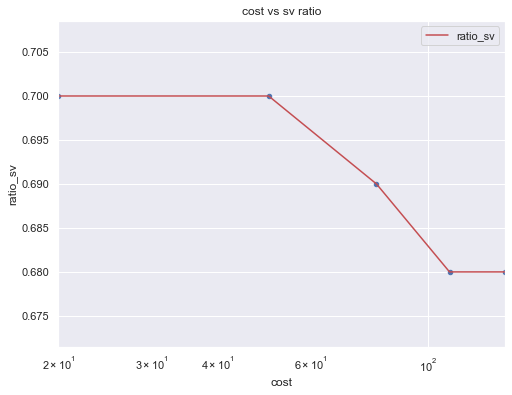

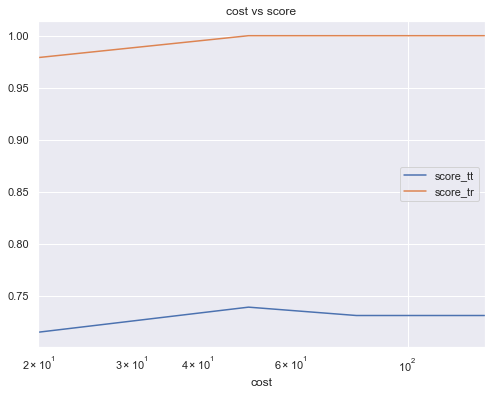

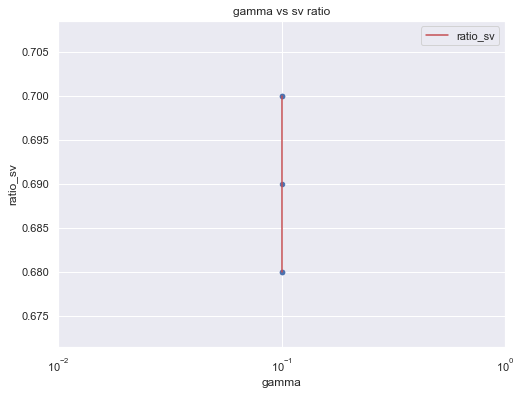

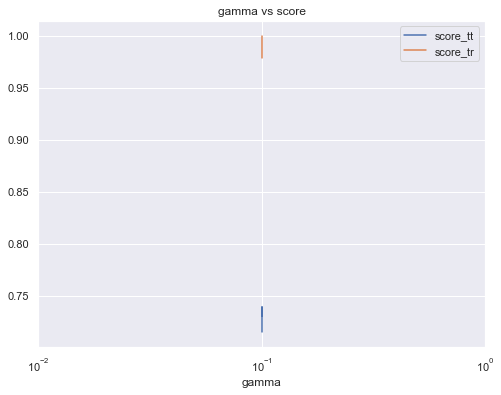

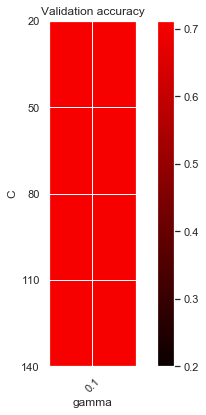

In [175]:
# gamma fixed to 0.1

#fine tuning  for cost in range
C_range = [20,50,80,110,140]
gamma_range = [0.1]
#gamma_range = [0.1,0.05,1,5,8]
tuned_parameters = {'kernel': ['rbf'], 'C': C_range, 'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
svm_radial.tune(tuned_parameters,nfolds,False)


{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
kernel_type:  rbf
------Fitting train data into svm model-----
Score for above parameters in SVC model :  0.978978978978979


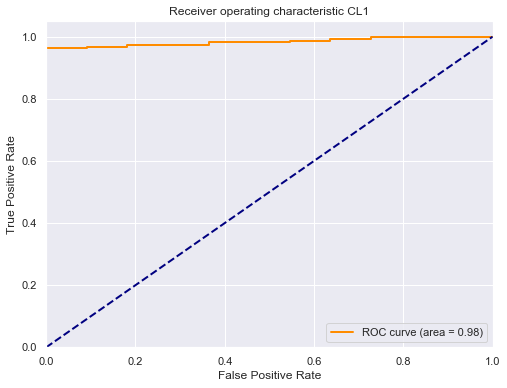

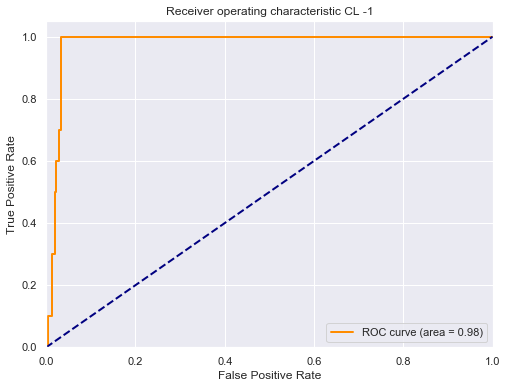

Number of Support vectors,S :  695
Ratio of Support vectors,s :  0.7
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.714859437751004


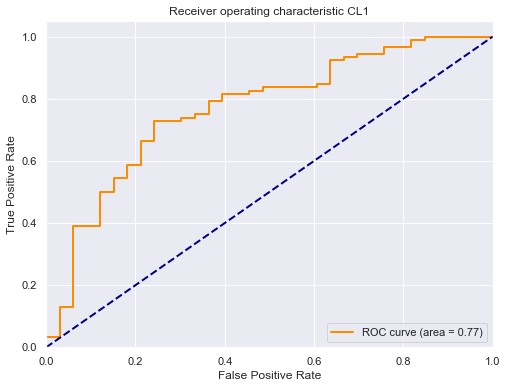

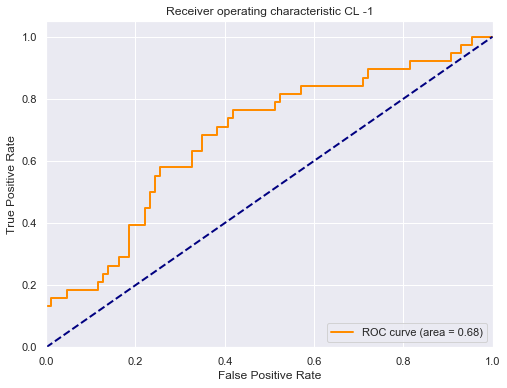

Predictions Train:
             pred  error        conf_int
total  97.897898    0.0  [100.0, 100.0]
cl1    98.084291    0.0  [100.0, 100.0]
cl_1   97.693920    0.0  [100.0, 100.0]
Predictions Test:
             pred  error        conf_int
total  71.485944   2.88  [65.04, 76.33]
cl1    70.769231   3.70  [69.67, 84.18]
cl_1   72.268908   4.40  [55.24, 72.49]
Confusion matrix for Train:
            pred_CL1  pred_CL_1
true_CL1      98.08       1.92
true_CL_1      2.31      97.69
Confusion matrix for Test:
            pred_CL1  pred_CL_1
true_CL1      70.77      29.23
true_CL_1     27.73      72.27
prediction errors train:
             pred  error        conf_int
total  97.897898   0.45  [97.02, 98.78]
cl1    98.084291   0.60  [96.91, 99.26]
cl_1   97.693920   0.69  [96.34, 99.05]
prediction errors test:
             pred  error        conf_int
total  71.485944   2.86  [65.88, 77.09]
cl1    70.769231   3.99  [62.95, 78.59]
cl_1   72.268908   4.10   [64.23, 80.3]
confmat_train_confint:
    

In [176]:
# Evaluate the performance characteristics of the "best" radial svm as in question 2

svm_radial.best_params = {'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}
parameters = svm_radial.best_params
print(parameters)
# svm_radial.best_params_ = grid.best_params_
svm_radial.svm_call("rbf",parameters,False)
svm_radial.calc_correct_pred()
print('Predictions Train:\n',svm_radial.pred_train)
print('Predictions Test:\n',svm_radial.pred_test)

svm_radial.calc_confusionmatrix()
print('Confusion matrix for Train:\n',svm_radial.confmat_train)
print('Confusion matrix for Test:\n',svm_radial.confmat_test)

svm_radial.error_estimate()
print('prediction errors train:\n',svm_radial.pred_train)
print('prediction errors test:\n',svm_radial.pred_test)

# print('confmat_train_error:\n',svm_radial.confmat_train_error)
print('confmat_train_confint:\n',svm_radial.confmat_train_confint)
# print('confmat_test_error:\n',svm_radial.confmat_test_error)
print('confmat_test_confint:\n',svm_radial.confmat_test_confint)

#Interpret your results


In [178]:
# # Question 6 : SVM classification using a polynomial kernel
# Implement the steps of question 4 and 
# K(x,y) = (a + <x,y>)^4
# You will have to optimize the choice of the two parameters "a" >0 and ''cost"

svm_poly = SvmClassification(df_train_std.copy(),df_test_std.copy())

svm_radial.best_params

{'C': 20, 'gamma': 0.1, 'kernel': 'rbf'}

kernel_type:  poly
------Fitting train data into svm model-----
Score for above parameters in SVC model :  1.0


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:651: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  UndefinedMetricWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:113: RuntimeWarning: invalid value encountered in less
  if np.any(dx < 0):


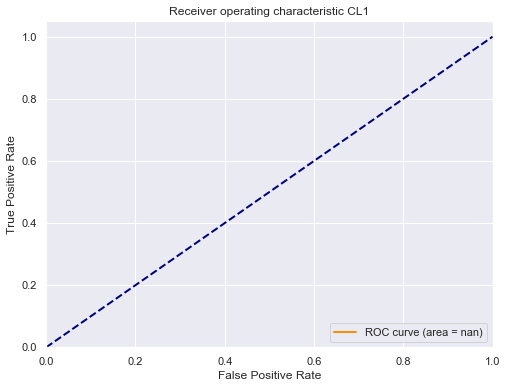

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


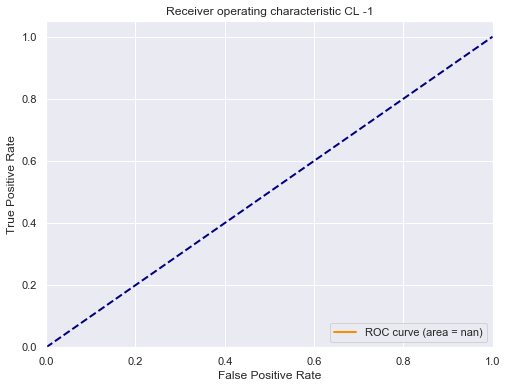

Number of Support vectors,S :  554
Ratio of Support vectors,s :  0.55
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.6104417670682731


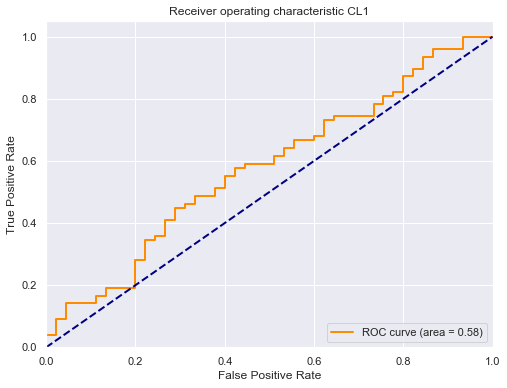

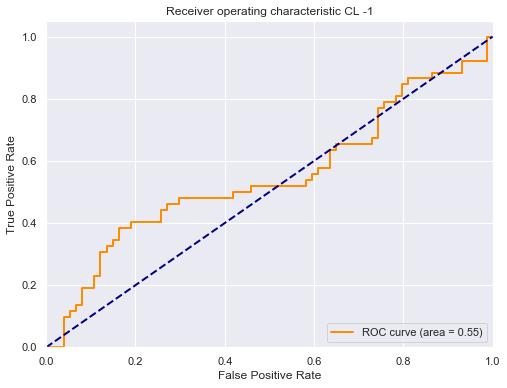

In [179]:
parameters = {'kernel': ['poly'], 'C': svm_radial.best_params['C'],
              'degree' : 4,'coef0' : 1,'gamma':1}
svm_poly.svm_call('poly',parameters,False)
 


In [180]:
svm_poly.calc_correct_pred()
print('Predictions Train:\n',svm_poly.pred_train)
print('Predictions Test:\n',svm_poly.pred_test)

svm_poly.calc_confusionmatrix()
print('Confusion matrix for Train:\n',svm_poly.confmat_train)
print('Confusion matrix for Test:\n',svm_poly.confmat_test)


svm_poly.error_estimate()
print('prediction errors train:\n',svm_poly.pred_train)
print('prediction errors test:\n',svm_poly.pred_test)

# print('confmat_train_error:\n',svm_poly.confmat_train_error)
print('confmat_train_confint:\n',svm_poly.confmat_train_confint)
# print('confmat_test_error:\n',svm_poly.confmat_test_error)
print('confmat_test_confint:\n',svm_poly.confmat_test_confint)

Predictions Train:
         pred  error  conf_int
total  100.0      0         0
cl1    100.0      0         0
cl_1   100.0      0         0
Predictions Test:
             pred  error  conf_int
total  61.044177      0         0
cl1    60.000000      0         0
cl_1   62.184874      0         0
Confusion matrix for Train:
            pred_CL1  pred_CL_1
true_CL1      100.0        0.0
true_CL_1       0.0      100.0
Confusion matrix for Test:
            pred_CL1  pred_CL_1
true_CL1      60.00      40.00
true_CL_1     37.82      62.18
prediction errors train:
         pred  error        conf_int
total  100.0    0.0  [100.0, 100.0]
cl1    100.0    0.0  [100.0, 100.0]
cl_1   100.0    0.0  [100.0, 100.0]
prediction errors test:
             pred  error        conf_int
total  61.044177   3.09   [54.99, 67.1]
cl1    60.000000   4.30  [51.57, 68.43]
cl_1   62.184874   4.45  [53.46, 70.91]
confmat_train_confint:
                  pred_CL1       pred_CL_1
true_CL1   [100.0, 100.0]      [0.0, 0.0]

kernel_type :  poly
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 20, 'coef0': 50, 'gamma': 1, 'kernel': 'poly'}

Grid scores on development set:

0.669 (+/-0.077) for {'C': 20, 'coef0': 15, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 20, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.674 (+/-0.074) for {'C': 20, 'coef0': 25, 'gamma': 1, 'kernel': 'poly'}
0.672 (+/-0.073) for {'C': 20, 'coef0': 30, 'gamma': 1, 'kernel': 'poly'}
0.677 (+/-0.056) for {'C': 20, 'coef0': 50, 'gamma': 1, 'kernel': 'poly'}
------Fitting train data into svm model-----
kernel_type:  poly


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
    cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0  20.0    1.0   15.0      562.0      0.56       1.0  0.614458    0.385542
1  20.0    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
2  20.0    1.0   25.0      561.0      0.56       1.0  0.614458    0.385542
3  20.0    1.0   30.0      557.0      0.56       1.0  0.622490    0.377510
4  20.0    1.0   50.0      548.0      0.55       1.0  0.602410    0.397590


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


in heatmap: poly


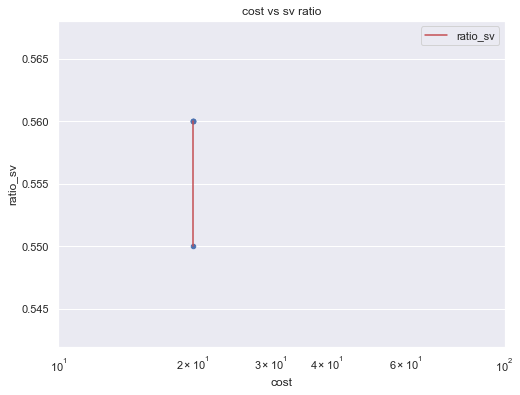

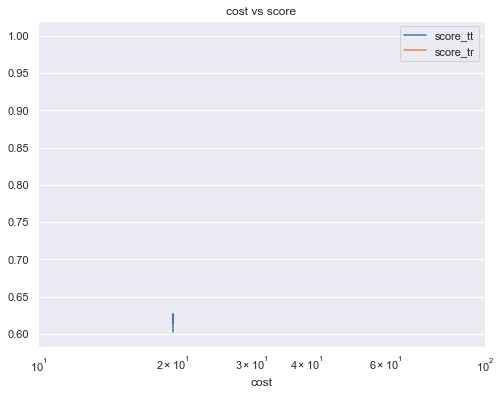

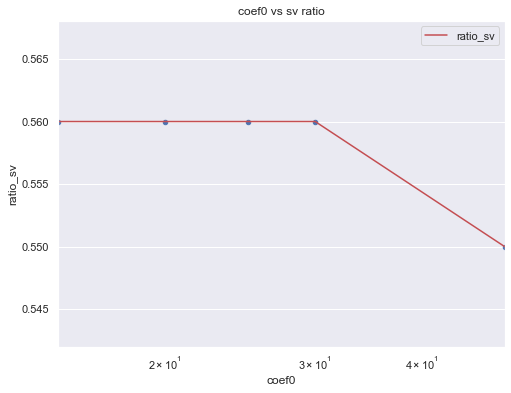

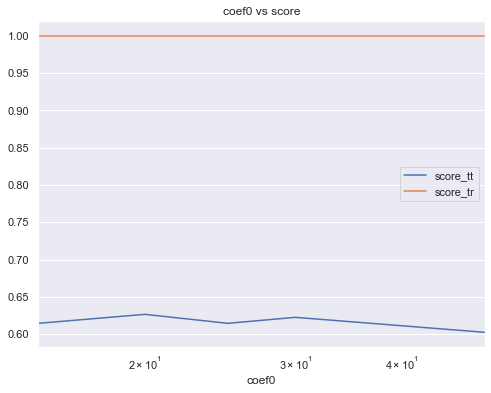

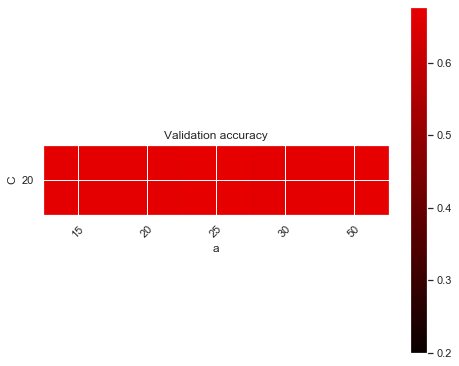

In [187]:
# Q6a: optimize the parameters 'cost' and 'a' based on the polynomial kernel

#broad tuning for coef0(a) between 0.01 to 100
C_range = [svm_radial.best_params['C']]
gamma_range = [1]
# coef0_range = np.logspace(-2, 2,5)
coef0_range = [15,20,25,30,50]
tuned_parameters = {'kernel': ['poly'], 'C': C_range, 'coef0' : coef0_range,'gamma': [1]}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#tuning for Train set
svm_poly.tune(tuned_parameters,nfolds,False)


kernel_type :  poly
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 0.01, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}

Grid scores on development set:

0.670 (+/-0.074) for {'C': 0.01, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 0.1, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 1.0, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 10.0, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 100.0, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
------Fitting train data into svm model-----
kernel_type:  poly


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
      cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0    0.01    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
1    0.10    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
2    1.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
3   10.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
4  100.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


in heatmap: poly


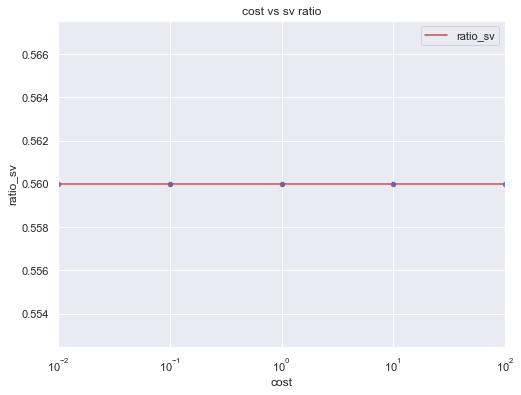

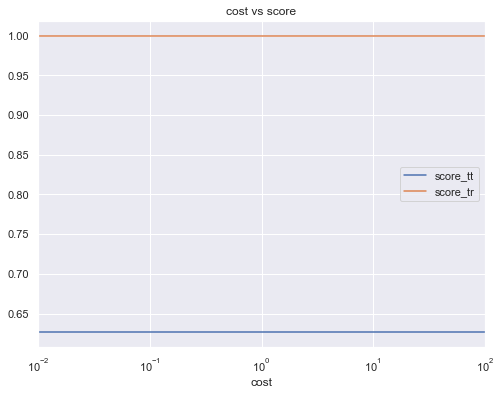

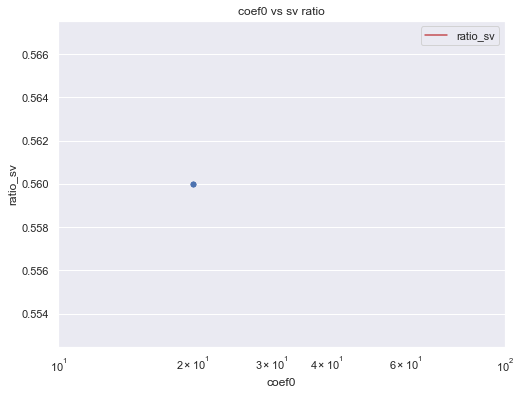

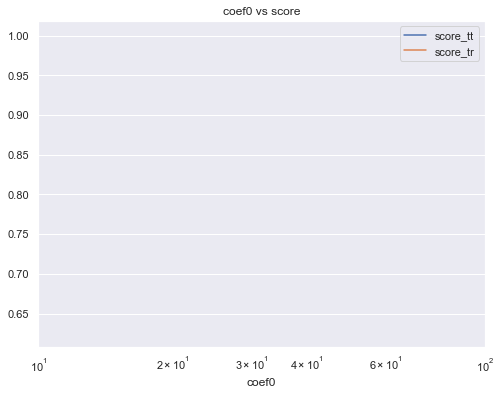

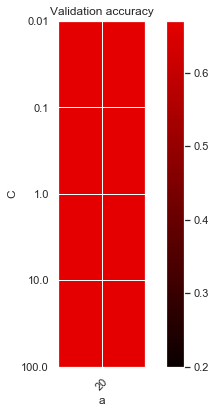

In [189]:
#broad tuning for C between 0.01 to 100
C_range = np.logspace(-2, 2,5)
gamma_range = [1]
#best value from broad tuning
coef0_range = [20]
tuned_parameters = {'kernel': ['poly'], 'C': C_range, 'coef0' : coef0_range,'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#tuning for Train set
svm_poly.tune(tuned_parameters,nfolds,False)


kernel_type :  poly
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 0.01, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}

Grid scores on development set:

0.670 (+/-0.074) for {'C': 0.01, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 1, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 10, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 30, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 50, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 70, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
0.670 (+/-0.074) for {'C': 100, 'coef0': 20, 'gamma': 1, 'kernel': 'poly'}
------Fitting train data into svm model-----
kernel_type:  poly


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
      cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0    0.01    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
1    1.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
2   10.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
3   30.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
4   50.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
5   70.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494
6  100.00    1.0   20.0      560.0      0.56       1.0  0.626506    0.373494


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


in heatmap: poly


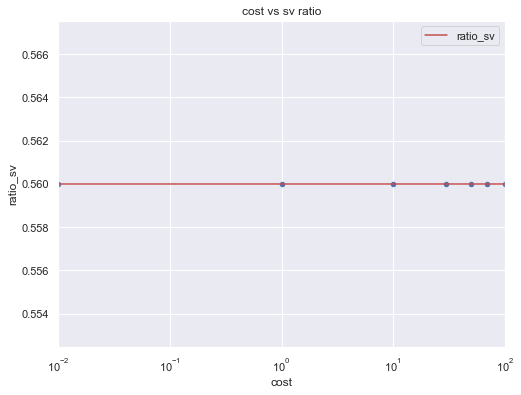

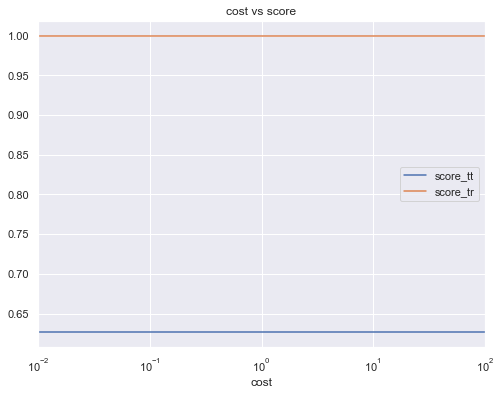

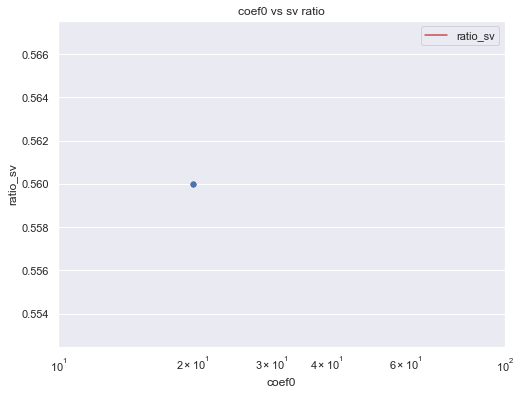

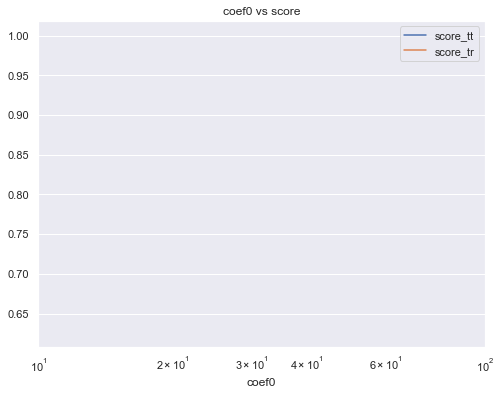

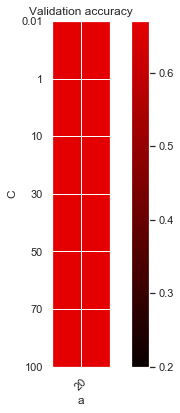

In [193]:
#fine tuning for C and coef0
gamma_range = [1]
C_range = [0.01,1,10,30,50,70,100]
coef0_range = [20]

tuned_parameters = {'kernel': ['poly'], 'C': C_range, 'coef0' : coef0_range,'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#tuning for Train set
svm_poly.tune(tuned_parameters,nfolds,False)

kernel_type :  poly
------Fitting train data into svm model-----
# Tuning hyper-parameters


Best parameters set found on development set:

{'C': 0.01, 'coef0': 20, 'gamma': 0.05, 'kernel': 'poly'}

Grid scores on development set:

0.696 (+/-0.056) for {'C': 0.01, 'coef0': 20, 'gamma': 0.05, 'kernel': 'poly'}
------Fitting train data into svm model-----
kernel_type:  poly


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


df_tune_data:
    cost  gamma  coef0  number_sv  ratio_sv  score_tr  score_tt  score_diff
0  0.01   0.05   20.0      515.0      0.52  0.976977  0.626506    0.350471


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 0.01 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


in heatmap: poly


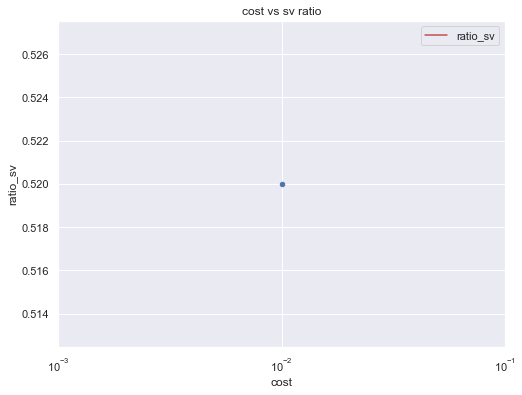

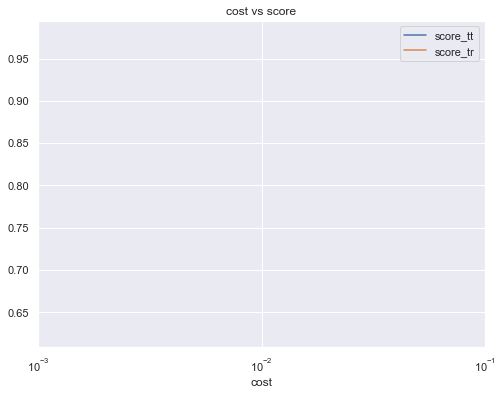

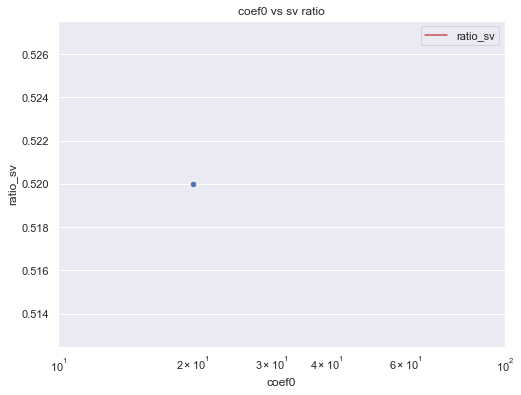

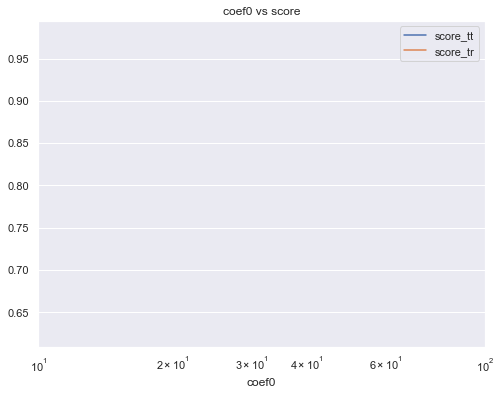

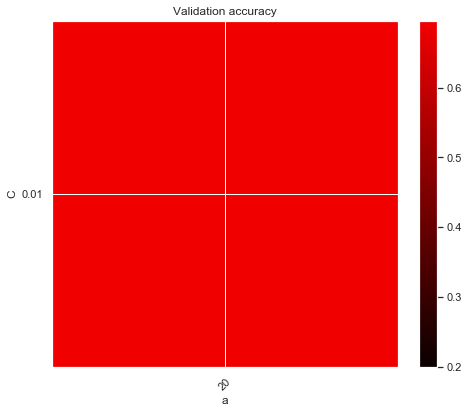

In [201]:
#fine tuning for C and coef0
gamma_range = [0.05]
C_range = [0.01]
#coef0_range = [10,30,70,90,100]
coef0_range = [20]
tuned_parameters = {'kernel': ['poly'], 'C': C_range, 'coef0' : coef0_range,'gamma': gamma_range}
nfolds = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
#tuning for Train set
svm_poly.tune(tuned_parameters,nfolds,False)

{'C': 0.01, 'coef0': 20, 'gamma': 0.05, 'kernel': 'poly'}
kernel_type:  poly
------Fitting train data into svm model-----
Score for above parameters in SVC model :  0.9769769769769769


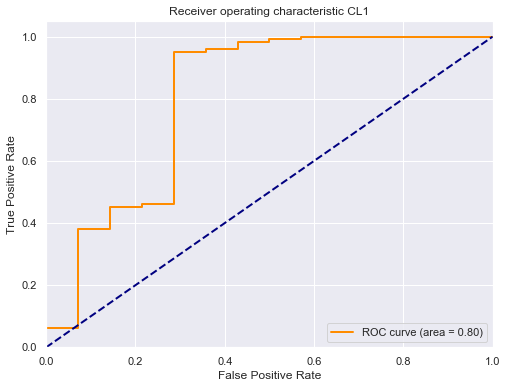

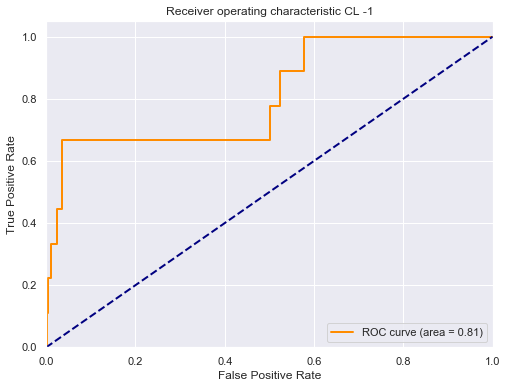

Number of Support vectors,S :  515
Ratio of Support vectors,s :  0.52
------SVM applied on test set-----
Score for above parameters in SVC model for testset :  0.6265060240963856


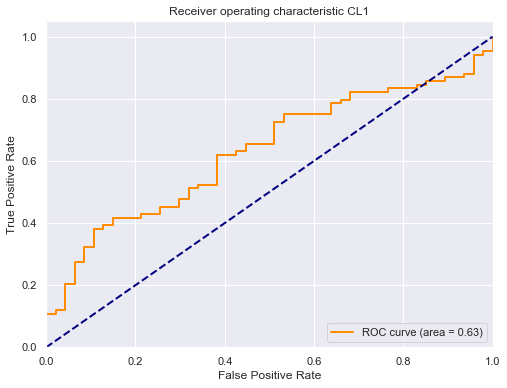

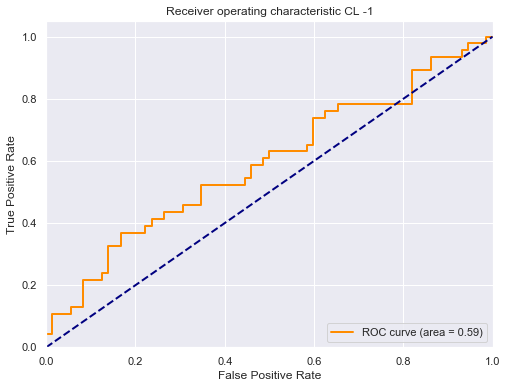

Predictions Train:
             pred  error        conf_int
total  97.897898   0.45  [97.02, 98.78]
cl1    98.084291   0.60  [96.91, 99.26]
cl_1   97.693920   0.69  [96.34, 99.05]
Predictions Test:
             pred  error        conf_int
total  71.485944   2.86  [65.88, 77.09]
cl1    70.769231   3.99  [62.95, 78.59]
cl_1   72.268908   4.10   [64.23, 80.3]
Confusion matrix for Train:
            pred_CL1  pred_CL_1
true_CL1      98.08       1.92
true_CL_1      2.31      97.69
Confusion matrix for Test:
            pred_CL1  pred_CL_1
true_CL1      70.77      29.23
true_CL_1     27.73      72.27
prediction errors train:
             pred  error        conf_int
total  97.897898   0.45  [97.02, 98.78]
cl1    98.084291   0.60  [96.91, 99.26]
cl_1   97.693920   0.69  [96.34, 99.05]
prediction errors test:
             pred  error        conf_int
total  71.485944   2.86  [65.88, 77.09]
cl1    70.769231   3.99  [62.95, 78.59]
cl_1   72.268908   4.10   [64.23, 80.3]
confmat_train_confint:
    

In [202]:
# svm_poly.best_params = {'C': 10, 'coef0': 30, 'gamma': 1, 'kernel': 'poly'}
svm_poly.best_params = {'C': 0.01, 'coef0': 20, 'gamma': 0.05, 'kernel': 'poly'}
parameters = svm_poly.best_params
print(parameters)
svm_poly.svm_call("poly",parameters,False)

svm_poly.calc_correct_pred()
print('Predictions Train:\n',svm_radial.pred_train)
print('Predictions Test:\n',svm_radial.pred_test)

svm_poly.calc_confusionmatrix()
print('Confusion matrix for Train:\n',svm_radial.confmat_train)
print('Confusion matrix for Test:\n',svm_radial.confmat_test)

svm_poly.error_estimate()
print('prediction errors train:\n',svm_radial.pred_train)
print('prediction errors test:\n',svm_radial.pred_test)

# print('confmat_train_error:\n',svm_radial.confmat_train_error)
print('confmat_train_confint:\n',svm_radial.confmat_train_confint)
# print('confmat_test_error:\n',svm_radial.confmat_test_error)
print('confmat_test_confint:\n',svm_radial.confmat_test_confint)

# KRR regression

In [243]:
df_temp = df_totaldata.copy()
df_temp.drop(columns = 'Date',inplace=True)

#create dataset with predictor variables as v(t) to v(t-9) with X(t+1) as response variable
list_columns = list(range(10*df_temp.shape[1]))
#list_columns = list(map(lambda x : 'X'+str(x + 1), list_numbers)) 
df_krrdata = pd.DataFrame(columns = list_columns)
LIMIT_LOWER = 9
limit_upper = df_temp.shape[0]-1

#create new dataset
for i in range(LIMIT_LOWER,limit_upper):
    row = df_temp.loc[i-9:i][::-1].T.melt()['value']
    row.index = range(0,len(list_columns))
    df_krrdata = df_krrdata.append(row,ignore_index = True)


list_columns = list(map(lambda x : 'X'+str(x + 1), list_columns))
df_krrdata.columns = list_columns
#adding class column with name X_tplus1
X_tplus1 = df_totaldata.loc[LIMIT_LOWER+1:limit_upper,'CVS']
X_tplus1.index = range(0,limit_upper-LIMIT_LOWER)

#adding Date of X_tplus1
Date_col = df_totaldata.loc[LIMIT_LOWER+1:limit_upper,'Date']
Date_col.index = range(0,limit_upper-LIMIT_LOWER)
df_krrdata.insert(0,'Date',Date_col)

df_krrdata['Y'] = X_tplus1

In [244]:
#write to excel dataset
filepath = 'processed_data_krr.xlsx'

with ExcelWriter(filepath) as writer:
    df_totaldata.to_excel(writer,sheet_name = 'total_data' )
    df_krrdata.to_excel(writer,sheet_name = 'df_krrdata' )
    writer.save()  

In [350]:
df_krrdata.head()

Date          X1         X2         X3         X4         X5  \
0 2015-01-16   97.169998  62.191055  74.459999  50.590000  64.294998   
1 2015-01-20   98.739998  62.577709  75.050003  50.759998  64.580002   
2 2015-01-21   98.370003  62.903713  75.209999  50.299999  64.230003   
3 2015-01-22   99.500000  63.123577  75.730003  50.139999  64.440002   
4 2015-01-23  100.279999  64.063683  76.150002  50.880001  65.169998   

           X6         X7         X8         X9  ...        X92        X93  \
0   97.400002  70.070000  54.054901  28.760000  ...  64.988625  75.830002   
1  100.709999  69.839996  54.705883  29.030001  ...  64.344200  74.699997   
2  103.779999  67.860001  54.313725  29.280001  ...  63.904472  73.620003   
3  103.580002  69.269997  54.180393  29.400000  ...  64.291130  74.290001   
4  105.139999  70.400002  55.905884  29.510000  ...  65.284309  75.769997   

         X94        X95         X96        X97        X98        X99  \
0  51.930000  63.860001   94.910004  73.970001  53.662746  26.379999   
1  51.570000  63.889999   96.790001  71.809998  53.180393  26.120001   
2  50.930000  63.509998   97.650002  71.690002  52.870586  25.750000   
3  52.250000  65.000000   99.480003  72.989998  54.333332  26.400000   
4  53.540001  66.574997  102.300003  74.930000  55.098038  27.110001   

         X100           Y  
0  142.990005   98.739998  
1  139.199997   98.370003  
2  139.089996   99.500000  
3  141.729996  100.279999  
4  147.830002  100.620003  

[5 rows x 102 columns]

In [367]:
class KernelRidgePrediction:
    #attributes
        
    
    #methods
    def __init__(self,df_totaldata):
        
        self.df_totaldata = df_totaldata.copy()
        self.df_totaldata_orig = df_totaldata.copy()
        #add Xp(j)=1 column
        self.df_totaldata.insert(101,'X101',np.repeat(1.,self.df_totaldata.shape[0]))
        self.f_size = (8,8)
        
    #missing value count
    def missingvalue_count(self): 
        
        #initiaizing severity dataframe with NaN values
        self.df_severity = pd.DataFrame(data = np.NaN,index = self.df_totaldata.columns,
                                  columns = ['Missing_Values','%_of_MV'])
        
        self.df_missingrec = pd.DataFrame()
        #iterating through columns to find null values count and percentage
        for column in self.df_totaldata:
            
            if self.df_totaldata[column].isnull().values.any():    
                
                null_rows = self.df_totaldata[column].isnull()        
                null_count = sum(null_rows)
                nullcount_percent = round(null_count/self.df_totaldata[column].size*100,2)        
                self.df_missingrec = self.df_missingrec.append(self.df_totaldata[null_rows])
            else:        
                
                null_count = 0
                nullcount_percent = 0   
            #saving missing value counts in dataframe
            self.df_severity.loc[column,'Missing_Values'] = null_count
            self.df_severity.loc[column,'%_of_MV'] = nullcount_percent    
        
        print('Data Severity\n ', self.df_severity)
      

    def create_traintestdata(self,prop):  

        #calculate trainset size for cl1
        train_size = int(prop*self.df_totaldata.shape[0]/100)
        #extract a random sample of 80% as train and 20% as test set
        self.df_train = self.df_totaldata.sample(train_size)
        self.df_test = self.df_totaldata.drop(self.df_train.index)

        #sort train and test by date
        self.df_train.sort_values(by='Date',ascending=True,axis =0,inplace=True)
        self.df_test.sort_values(by='Date',ascending=True,axis =0,inplace=True)
        #Reset index    
        self.df_train.reset_index(drop=True,inplace = True)
        self.df_test.reset_index(drop=True,inplace = True)
        
        
    def write_traintest_files(self,filepath):
        with ExcelWriter(filepath) as writer:
            self.df_train.to_excel(writer,sheet_name = 'train_data' )
            self.df_test.to_excel(writer,sheet_name = 'test_data' )
            self.df_train.loc[:,'X1':'X101'].to_excel(writer,sheet_name = 'train_data_nolabel' )
            self.df_train['Y'].to_excel(writer,sheet_name = 'train_labels_all' )
            self.df_test.loc[:,'X1':'X101'].to_excel(writer,sheet_name = 'test_data_nolabel' )
            self.df_test['Y'].to_excel(writer,sheet_name = 'test_labels_all' )
            writer.save()  
       

    def calc_kl_radial(self,gamma,x,y):    
        val_k = math.exp(-1*gamma*np.power(np.linalg.norm(x-y),2))
        return val_k

    ####Line vector calculation-----------
    def cal_linevector_A(self,val_gamma,val_lambda,df_train):    
        #gramian matrix
        mat_train = np.matrix(df_train.loc[:,'X1':'X101'])
        val_m =mat_train.shape[0]

        for i in np.arange(val_m):
            for j in np.arange(val_m):
                mat_gramian[i,j] = self.calc_kl_radial(val_gamma,mat_train[i],mat_train[j])

        #Calculation of M = G + lambda*Identity    
        mat_M = mat_gramian + val_lambda*np.eye(mat_gramian.shape[0])
        mat_Minv = np.linalg.inv(mat_M)

        #line vector A calculation
        mat_y = np.asmatrix(df_train['Y'])
        linevector_A = mat_y* mat_Minv

        return linevector_A

    #calculate prediction for input vector input_X
    def cal_predx(self,val_gamma,linevector_A,mat_input_X,mat_train_X):
        val_trainsize = mat_train_X.shape[0]  
        mat_vx = np.zeros(val_trainsize).reshape(val_trainsize,1)      

        for i in np.arange(val_trainsize):
            
            mat_vx[i,0] = self.calc_kl_radial(val_gamma,mat_input_X,mat_train_X[i])

        pred_x = linevector_A*mat_vx
        return np.around(pred_x[0,0],4)
    
    def cal_rmse(self,y_true,y_pred):
        val_rmse = np.sqrt(np.mean(np.square(y_true-y_pred)))
        return val_rmse   

    ###function to calculate performance for given test set and linevector_A
    def cal_performance_params(self,val_gamma,linevector_A,df_test,df_train):
        
        #matrix formulation
        mat_train = np.matrix(df_train.loc[:,'X1':'X101'])
        val_m =mat_train.shape[0]
        mat_test = np.matrix(df_test.loc[:,'X1':'X101'])
        val_testsize = mat_test.shape[0]  

        #calculate predictions for test data
        mat_pred_x = np.zeros(val_testsize).reshape(val_testsize,1)
        for i in np.arange(val_testsize):
            mat_pred_x[i,0] = self.cal_predx(val_gamma,linevector_A,mat_test[i],mat_train)

        #reshaping arguments for RMSE
        mat_y_true = np.asmatrix(df_test['Y'])
        mat_y_pred = np.asmatrix(np.array(mat_pred_x[:,0])).reshape(mat_y_true.shape)

        #calculate RMSE
        val_rmse_test = self.cal_rmse(mat_y_true,mat_y_pred)

        #calculate ratio RMSE/avy for test
        val_avy_test = np.mean(np.abs(mat_y_true))
        ratio_rmse_avy_test = np.around(val_rmse_test/val_avy_test,4)
        
        with ExcelWriter(filepath) as writer:
            self.df_train.to_excel(writer,sheet_name = 'train_data' )
            self.df_test.to_excel(writer,sheet_name = 'test_data' )
            self.df_train.loc[:,'X1':'X101'].to_excel(writer,sheet_name = 'train_data_nolabel' )
            self.df_train['Y'].to_excel(writer,sheet_name = 'train_labels_all' )
            self.df_test.loc[:,'X1':'X101'].to_excel(writer,sheet_name = 'test_data_nolabel' )
            self.df_test['Y'].to_excel(writer,sheet_name = 'test_labels_all' )
            writer.save()  
        
        #rplotting true y vs yhat

        fig, ax = plt.subplots(figsize=self.f_size)
        scale = np.where(np.max(mat_y_true)>np.max(mat_y_pred),np.max(mat_y_true),np.max(mat_y_pred))
        #ax.plot( [0,np.max(mat_y_true)],[0,np.max(mat_y_true)] )
        ax.plot( [0,scale],[0,scale] )
        ax.scatter(np.asarray(mat_y_true),np.asarray(mat_y_pred),c = 'g')
        ax.set(title = 'y vs y hat ' , xlabel = 'y', ylabel = 'yhat')
        plt.show()
        
        #RMSE ratio and confidence intervals
        print('val_rmse: ',np.around(val_rmse_test,4))
        print('ratio rmse/avy : ',ratio_rmse_avy_test)
        confint_ratio = self.err_est_element(ratio_rmse_avy_test,df_test['Y'].shape[0],False)

        print('For 95% confidence level, confidence interval for ratio {0} is {1}'.format(
            ratio_rmse_avy_test,confint_ratio))


        return val_rmse_test,ratio_rmse_avy_test,mat_y_pred
    
    ####---------------------------------

    def tune_krr(self,tuned_parameters):
        lambda_range = tuned_parameters['lambda']
        gamma_range = tuned_parameters['gamma']
        df_grid_scores = pd.DataFrame(0,index = [],columns = 
                                    ['rmse_test','rmse_train','ratio_test','ratio_train',
                                     'diff_ratio','params'])

        #tuning output
        for val_lambda in lambda_range:
            for val_gamma in gamma_range:
                print('tuning parameters: lambda ={0},gamma = {1}'.format(val_lambda,val_gamma))
                linevector_A = self.cal_linevector_A(val_gamma,val_lambda,self.df_train)
                #train performance 
                print('#train performance')
                val_rmse_train,ratio_rmse_avy_train,mat_train_pred = self.cal_performance_params(val_gamma,linevector_A,self.df_train,self.df_train)

                #test performance
                print('#test performance')
                val_rmse_test,ratio_rmse_avy_test,mat_test_pred = self.cal_performance_params(val_gamma,linevector_A,self.df_test,self.df_train)      
                params = 'lambda = '+ str(val_lambda)+ '; gamma = '+ str(val_gamma)
                row = {'rmse_test':val_rmse_test,'rmse_train':val_rmse_train,
                       'ratio_test':ratio_rmse_avy_test,'ratio_train':ratio_rmse_avy_train,
                       'diff_ratio': ratio_rmse_avy_test -ratio_rmse_avy_train ,
                       'params':params }      
                df_grid_scores = df_grid_scores.append(row,ignore_index = True)
                
        df_grid_scores.to_excel('grid_scores.xlsx')

    def err_est_element(self,term,size,return_sigma):
        sigma = np.around(math.sqrt(term*(1-term)/size),4)
        print('sigma: ',sigma)
        #for 95% confidence level
        Z_VAL = 1.96
        limit_lower = np.around((term - Z_VAL*sigma),4)

        if limit_lower < 0:
            limit_lower = 0
            
        limit_upper = np.around((term + Z_VAL*sigma),4)
        
        if limit_upper > 100:
            limit_upper = 100
      
        conf_int = [limit_lower,limit_upper]
        
        if return_sigma:
            return sigma
        else:
            return str(conf_int)

    def plot_results(self,data,title):

        fig, ax = plt.subplots(figsize=self.f_size)
        data.plot('Date',['Y','yhat'],ax=ax)
        #ax.plot(np.arange(1,sort_linevect_A.shape[0]+1),sort_linevect_A, c='b',s=5, alpha=.5)
        ax.set(title = title , xlabel = 'Date', ylabel = 'stock price')
        plt.show()
        
    #calculate prediction coefficients list for input vector input_X
    def cal_predx_list(self,val_gamma,linevector_A,mat_input_X,mat_train_X):
        val_trainsize = mat_train_X.shape[0]  
        #reshaping with same
        mat_vx = np.zeros(val_trainsize).reshape(linevector_A.shape)      

        for i in np.arange(val_trainsize):
            #print('sizes: {0},{1}'.format(mat_input_X.shape,mat_train_X[i].shape))
            mat_vx[0,i] = self.calc_kl_radial(val_gamma,mat_input_X,mat_train_X[i])

        #print(' cal_predx variable mat_vx:\n',mat_vx)
        pred_x = np.multiply(linevector_A, mat_vx)
        #print('cal_predx variable pred_x: ',pred_x)
        return np.around(pred_x,4)         

    #function that returns list of elements in pred(x) summations in test set
    def cal_indices_pred(self,val_gamma,linevector_A,df_train,df_test):

        #matrix formulation
        mat_train = np.matrix(df_train.loc[:,'X1':'X101'])
        val_m =mat_train.shape[0]
        #mat_test_worst10 = np.matrix(df_test.loc[0:9,'X1':'X11'])
        mat_test_worst10 = np.matrix(df_test.loc[:,'X1':'X101'])
        val_testsize = mat_test_worst10.shape[0]  

        #calculate predictions for test data
        #mat_pred_x = np.zeros(val_testsize).reshape(val_testsize,linevector_A_best.shape[1])
        mat_pred_x = np.zeros((val_testsize,linevector_A.shape[1]))
        for i in np.arange(val_testsize):
            mat_pred_x[i] = self.cal_predx_list(val_gamma,linevector_A,mat_test_worst10[i],mat_train)

        #print('cal_performance_params variable mat_pred_x:\n',mat_pred_x)

        return mat_pred_x

    


In [368]:
# # 1.1 make sure that p ≥ 10 in your Data Set and make sure to include an artificial feature Xp(j) =1 for all cases j=1...n
# each feature must be a "continuous" variable; 
# avoid or eliminate discrete features taking only a small number of values ; 
krr_radial = KernelRidgePrediction(df_krrdata)

krr_radial.df_totaldata.describe()

X1           X2           X3           X4           X5  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000   
mean     80.813734    92.556356    67.256458    54.760088   124.257776   
std      15.879274    24.407922     8.557039     7.801273    46.527270   
min      52.130001    62.077332    43.419998    34.320000    61.930000   
25%      68.215002    73.053448    60.360001    50.872500    88.270000   
50%      78.760002    85.475002    67.434998    56.584999   114.220001   
75%      96.847498   102.647499    73.750000    60.849998   148.720001   
max     113.449997   153.339996    84.230003    68.580002   246.259995   

                X6           X7           X8           X9          X10  ...  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000  ...   
mean     80.277019    96.178718    62.064833    40.400296   235.108013  ...   
std      15.336341    24.487641     5.481330     4.897190    55.820992  ...   
min      60.540001    62.830002    49.756863    28.760000   145.979996  ...   
25%      67.712502    77.050003    57.475491    37.490002   180.417500  ...   
50%      74.830002    85.129997    62.078430    39.545000   235.105003  ...   
75%      87.897501   123.032499    66.655880    43.552500   280.444992  ...   
max     122.209999   149.259995    73.164703    53.560001   371.000000  ...   

               X93          X94          X95          X96          X97  \
count  1248.000000  1248.000000  1248.000000  1248.000000  1248.000000   
mean     67.262668    54.724279   123.032316    80.514407    95.643934   
std       8.561983     7.802297    45.814169    15.370861    24.181043   
min      43.419998    34.320000    61.930000    60.540001    62.830002   
25%      60.360001    50.872500    87.225002    67.852501    76.860003   
50%      67.434998    56.509998   113.974998    75.000000    84.834999   
75%      73.779999    60.849998   148.147503    88.900002   122.187498   
max      84.230003    68.580002   246.259995   122.209999   146.289993   

               X98          X99         X100    X101            Y  
count  1248.000000  1248.000000  1248.000000  1248.0  1248.000000  
mean     61.972049    40.218750   233.495152     1.0    80.795401  
std       5.502973     4.916593    55.190718     0.0    15.873582  
min      49.756863    25.750000   139.089996     1.0    52.130001  
25%      57.376472    37.417499   179.954998     1.0    68.215002  
50%      61.915688    39.465000   233.500000     1.0    78.750000  
75%      66.592155    43.432500   278.510002     1.0    96.772499  
max      73.164703    53.560001   365.880005     1.0   113.449997  

[8 rows x 102 columns]

In [369]:
# 1.4.for each feature X1 X2 ... Xp, compute and display its  mean and standard deviation

krr_radial.df_totaldata.describe().to_excel('df_totaldata.describe.xlsx')

# 1.5. compute and display its  mean and standard deviation for Y 
krr_radial.df_totaldata.describe()['Y']

# 1.6. Split the data set DS into a training set TRAIN and a test set TEST, with respective proportions 80% ,  20%

#missing values in each column
krr_radial.missingvalue_count()

Data Severity
        Missing_Values  %_of_MV
Date             0.0      0.0
X1               0.0      0.0
X2               0.0      0.0
X3               0.0      0.0
X4               0.0      0.0
...              ...      ...
X98              0.0      0.0
X99              0.0      0.0
X100             0.0      0.0
X101             0.0      0.0
Y                0.0      0.0

[103 rows x 2 columns]


In [370]:
#create train and test datasets
PROP = 80
krr_radial.create_traintestdata(PROP)
#describe train and test data
print('############# Train data #######')

#write to excel dataset
filepath = 'preprocessed_data.xlsx'

krr_radial.write_traintest_files(filepath)
krr_radial.df_train.describe().to_excel('df_train.describe.xlsx')
krr_radial.df_test.describe().to_excel('df_test.describe.xlsx')


############# Train data #######


In [371]:
# 1.7.Compute the empirical correlations cor(X1, Y) ... cor(Xp,Y) and their absolute values C1 ... Cp
sr_corr_XY = pd.DataFrame(np.abs(krr_radial.df_totaldata.corrwith(krr_radial.df_totaldata['Y'])))
sr_corr_XY.to_excel('sr_corr_XY.xlsx')

In [372]:
# 1.8.compute  the 3 largest values among C1 ... Cp, to be denoted  Cu > Cv > Cw which are

sr_corr_XY.sort_values(by=0,ascending=False)[1:4]


0
X1   0.997293
X11  0.994653
X21  0.991921

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


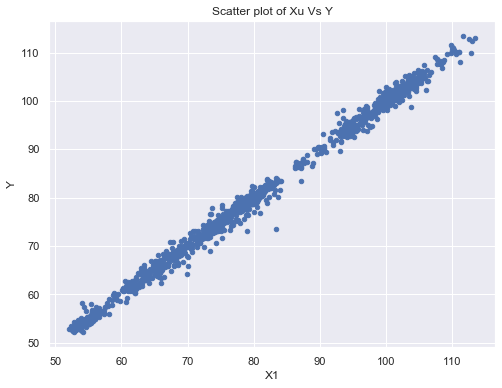

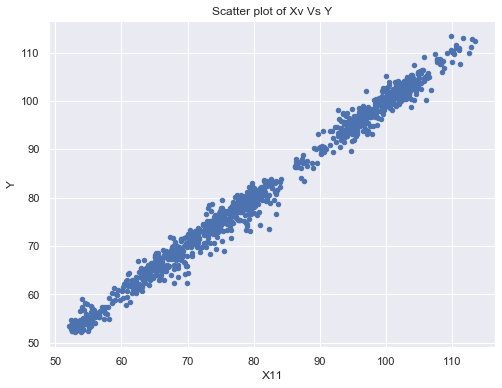

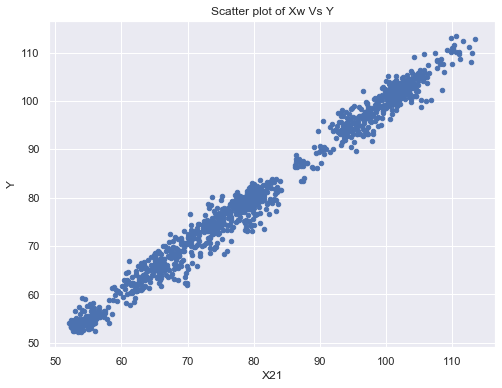

In [373]:
# 1.9.display separately the 3 scatter plots (Xu(j), Yj)  ,  (Xv(j), Yj)  , (Xw(j), Yj)  where j= 1...n

krr_radial.df_totaldata.plot(x='X1',y='Y',kind = 'scatter',title = 'Scatter plot of Xu Vs Y')

krr_radial.df_totaldata.plot(x='X11',y='Y',kind = 'scatter',title = 'Scatter plot of Xv Vs Y')

krr_radial.df_totaldata.plot(x='X21',y='Y',kind = 'scatter',title = 'Scatter plot of Xw Vs Y')


In [374]:
# Question 2: Kernel Ridge Regression (KRR) with radial kernel.
# For this question we use intensively the training set TRAIN which has size m = 80% n 
# 2.1.Compute the matrix G and its eigenvalues L1 >L2 > ... > Lm ≥ 0
#saving train data into matrix form
mat_train = np.matrix(krr_radial.df_train.loc[:,'X1':'X101'])
val_m =mat_train.shape[0]
mat_gramian = np.zeros((val_m,val_m))
#sample gamma
VAL_SAMPLE_GAMMA = 0.01

#calculate gramian matrix for train data
for i in np.arange(val_m):
    for j in np.arange(val_m):
        mat_gramian[i,j] = krr_radial.calc_kl_radial(VAL_SAMPLE_GAMMA,mat_train[i],mat_train[j])
        
print('Gramian: \n',mat_gramian)
#count of negative values in gramian
sum(sum(mat_gramian<0))

Gramian: 
 [[1.00000000e+00 1.61499050e-02 2.28664938e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.61499050e-02 1.00000000e+00 1.43172876e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.28664938e-03 1.43172876e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
  3.31597052e-02 9.65908853e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.31597052e-02
  1.00000000e+00 4.62334152e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 9.65908853e-04
  4.62334152e-02 1.00000000e+00]]


0

In [375]:
#calculate and display eigen values statistics
gramian_eig_val,gramian_eig_vec = np.linalg.eig(mat_gramian)
gramian_eig_val = gramian_eig_val.real
gramian_eig_vec = gramian_eig_vec.real

pd.DataFrame(gramian_eig_val).describe()

0
count  998.000000
mean     1.000000
std      0.331073
min      0.275632
25%      0.863267
50%      0.998484
75%      1.042211
max      3.624492

In [376]:
#sorting eigen values in descending order
gramian_eig_val[::-1].sort()
gramian_eig_val

array([3.62449212, 3.59393759, 3.16092278, 3.00525878, 2.84835556,
       2.78209196, 2.5146856 , 2.49236311, 2.39030845, 2.37149672,
       2.27732066, 2.27317319, 2.22607007, 2.21056032, 2.18850247,
       2.1231162 , 2.00214194, 2.00177795, 1.96689356, 1.94734836,
       1.93524032, 1.9130179 , 1.9059365 , 1.83754789, 1.83676246,
       1.81042747, 1.80377769, 1.7802917 , 1.72605254, 1.71079059,
       1.70733393, 1.6863381 , 1.66378971, 1.66105978, 1.65296811,
       1.64959245, 1.63368331, 1.62998656, 1.62722115, 1.6203672 ,
       1.59944658, 1.57325726, 1.56958841, 1.56907965, 1.55527871,
       1.54959995, 1.54953547, 1.54077152, 1.53707882, 1.53364952,
       1.51917207, 1.51032027, 1.5094756 , 1.50550462, 1.49346292,
       1.48354532, 1.48236839, 1.48174607, 1.47973227, 1.47510768,
       1.46404773, 1.46277455, 1.46176617, 1.45990113, 1.45968162,
       1.44709311, 1.44145502, 1.43930433, 1.43848725, 1.43118791,
       1.42238781, 1.42093001, 1.39102222, 1.38926526, 1.37669

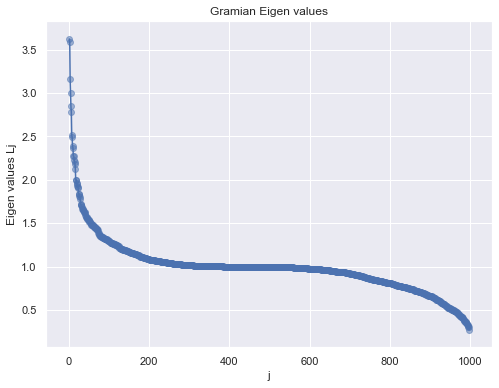

In [377]:
# 2.2.Plot Lj versus j

#plotting eigen values in descending order
fig, ax = plt.subplots()
ax.plot(np.arange(1,gramian_eig_val.shape[0]+1),gramian_eig_val,  '-')
ax.scatter(np.arange(1,gramian_eig_val.shape[0]+1),gramian_eig_val, c='b', alpha=.5)
ax.set(title = 'Gramian Eigen values', xlabel = 'j', ylabel = 'Eigen values Lj')
       #xticks = np.arange(1,gramian_eig_val.shape[0]+1))
       
plt.show()


In [378]:

# 2.3.Plot the increasing ratios RATj= (L1 + ... + Lj)/(L1+ ... + Lm)             
#2.4.Identify the smallest j such that RATj ≥ 95% and set λ = Lj

ratio_eig_val = gramian_eig_val.cumsum()/gramian_eig_val.sum()
ratio_eig_val


array([0.00363176, 0.0072329 , 0.01040015, 0.01341143, 0.0162655 ,
       0.01905317, 0.02157289, 0.02407025, 0.02646535, 0.0288416 ,
       0.03112348, 0.03340121, 0.03563174, 0.03784673, 0.04003962,
       0.04216699, 0.04417314, 0.04617893, 0.04814977, 0.05010102,
       0.05204014, 0.05395699, 0.05586675, 0.05770798, 0.05954842,
       0.06136247, 0.06316987, 0.06495373, 0.06668324, 0.06839746,
       0.07010821, 0.07179793, 0.07346505, 0.07512944, 0.07678572,
       0.07843862, 0.08007558, 0.08170883, 0.08333931, 0.08496293,
       0.08656558, 0.08814199, 0.08971472, 0.09128695, 0.09284534,
       0.09439805, 0.09595069, 0.09749455, 0.09903471, 0.10057143,
       0.10209365, 0.10360699, 0.1051195 , 0.10662802, 0.10812447,
       0.10961099, 0.11109633, 0.11258105, 0.11406374, 0.11554181,
       0.11700879, 0.1184745 , 0.11993919, 0.12140202, 0.12286462,
       0.12431462, 0.12575896, 0.12720115, 0.12864252, 0.13007658,
       0.13150181, 0.13292559, 0.1343194 , 0.13571145, 0.13709

In [379]:
# Where does Rj>.95
a_idx = np.where(ratio_eig_val>.95)[0][0] #gets the index
a = ratio_eig_val[a_idx] #gets the value at index
print('At eigenvalue', (a_idx+1), format(gramian_eig_val[a_idx], '.2f'), 'we get a ratio of', format(a, '.2%'))

val_lambda = gramian_eig_val[a_idx]
val_lambda

At eigenvalue 901 0.66 we get a ratio of 95.04%


0.6593652759850032

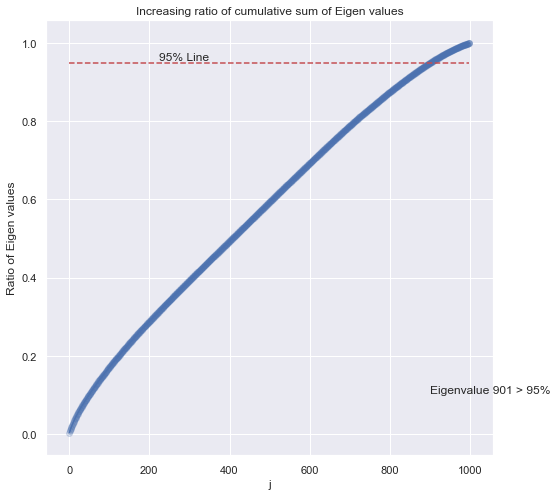

In [380]:
#plotting increasing ratio of eigen values to identify 95% eigen value
fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.plot(np.arange(1,gramian_eig_val.shape[0]+1),ratio_eig_val,  '-')
ax.scatter(np.arange(1,gramian_eig_val.shape[0]+1),ratio_eig_val, c='b', alpha=.2)

#ax.scatter(a_idx, a, c='green', alpha=1)
ax.plot(range(len(ratio_eig_val)), [.95]*gramian_eig_val.shape[0], 'r--', alpha=1)
ax.text(350,a,'95% Line', horizontalalignment = 'right', verticalalignment = 'bottom')
ax.text(a_idx,.1,'Eigenvalue {0} > 95%'.format(a_idx+1),
        horizontalalignment = 'left', verticalalignment = 'bottom')

ax.set(title = 'Increasing ratio of cumulative sum of Eigen values',
       xlabel = 'j', ylabel = 'Ratio of Eigen values')
      
       
plt.show()

In [381]:
# 2.5.Select at random two lists  List1 and List 2 of 100 random integers each , within   [1...m]

# 2.6.For all i in List 1 and all j in List2  compute Dij = ||X(i) -X(j)||

SIZE_SAMPLE = 100
df_list1 = krr_radial.df_train.loc[:,'X1':'X11'].sample(SIZE_SAMPLE).reset_index(drop=True)
df_list2 = krr_radial.df_train.loc[:,'X1':'X11'].sample(SIZE_SAMPLE).reset_index(drop=True)

mat_diff_dij = np.zeros(SIZE_SAMPLE*SIZE_SAMPLE).reshape(SIZE_SAMPLE,SIZE_SAMPLE)
for i in np.arange(df_list1.shape[0]):    
    for j in np.arange(df_list2.shape[0]):        
        mat_diff_dij[i,j] = np.around(np.linalg.norm(df_list1.loc[i,:] - df_list2.loc[j,:]),4)

arr_dij = mat_diff_dij.reshape(1,SIZE_SAMPLE*SIZE_SAMPLE)[0]
arr_dij

array([ 45.6738,  46.2088, 187.527 , ..., 226.8781, 205.0756, 182.0482])

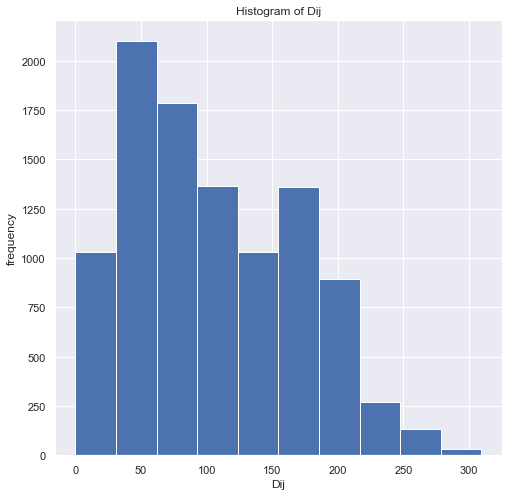

In [382]:
# 2.7.Plot the histogram of the 10000 numbers Dij

# 2.8.Compute q =10% quantile of the 10000 numbers Dij

# 2.9.Set     gamma = 1/q

fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.hist(arr_dij)
ax.set(title = 'Histogram of Dij',
      xlabel = 'Dij', ylabel = 'frequency')
      #  xticks = np.arange(1,gramian_eig_val.shape[0]+1))
       
plt.show()

In [383]:
val_q = np.quantile(arr_dij,0.10)
val_gamma = 1/val_q
val_gamma

0.03289307054839985

In [384]:
# 2.9 Compute the matrix M = G + λ Id  and its inverse M-1  
# 2.10 As seen in class the prediction formula becomes pred(x) = A1 K(x, X(1)) + ... + Am K(x,X(m))compute the line vector A  = [A1 ... Am] by  A= y M-1   
linevector_A_sample = krr_radial.cal_linevector_A(val_gamma,val_lambda,krr_radial.df_train)
linevector_A_sample


matrix([[59.5046327 , 59.90184182, 60.27738494, 60.01529576, 60.06358926,
         60.10577273, 59.23286564, 59.48980931, 58.46115065, 59.08413367,
         59.94963312, 60.67371497, 60.55159794, 59.96342135, 61.79478731,
         62.00657688, 61.76376107, 62.31312324, 62.64068042, 61.76877573,
         62.20817677, 61.942558  , 61.98611282, 61.81131838, 62.40014801,
         61.82605436, 61.69360422, 60.94414841, 60.25914925, 60.64959372,
         61.51330136, 62.06185586, 62.32961604, 62.24337473, 62.55078578,
         62.96638527, 62.94665263, 61.42922143, 61.73644929, 62.18275252,
         60.80747716, 58.62277611, 59.74605688, 56.21662263, 54.95298157,
         51.08239137, 50.78676484, 56.27329104, 53.56236068, 54.72356167,
         57.39276351, 60.4810237 , 59.82586625, 60.53569275, 60.35664317,
         59.50176211, 59.58089238, 59.87635942, 60.66016673, 60.55865277,
         60.08426376, 61.30125968, 61.27518605, 61.41279795, 60.98398833,
         59.95883504, 61.37901644, 61.

##Train Performance for sample parameters###


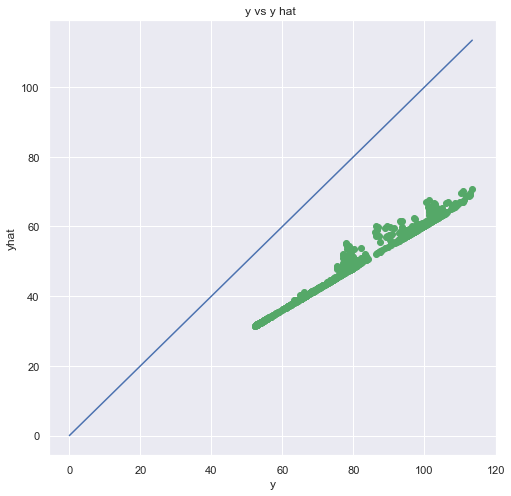

val_rmse:  32.0996
ratio rmse/avy :  0.398
sigma:  0.0155
For 95% confidence level, confidence interval for ratio 0.398 is [0.3676, 0.4284]


In [385]:
# 2.11 Compute the RMSEtrain  of the prediction function pred(x) by running it on all x in TRAIN set

#train performance 
print('##Train Performance for sample parameters###')
val_rmse_train,ratio_rmse_avy_train,mat_y_pred_train = krr_radial.cal_performance_params(
    val_gamma,linevector_A_sample,krr_radial.df_train,krr_radial.df_train)


####test performance for sample parameters####


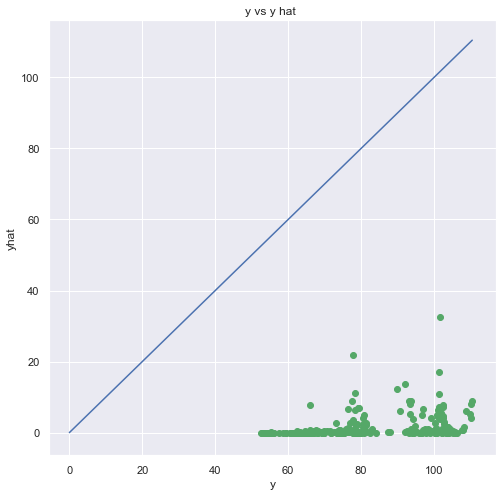

val_rmse:  81.2112
ratio rmse/avy :  0.9984
sigma:  0.0025
For 95% confidence level, confidence interval for ratio 0.9984 is [0.9935, 1.0033]


In [391]:
# 2.12.Compute the RMSEtest   of the prediction function pred(x) by running it on all x in TEST set 
# 2.13 Compare these two RMSE values , and compute their ratios RMSE/ avy 
# where avy = mean of the m absolute values |Y1|,  ... , |Ym|
#test performance for sample parameters
print('####test performance for sample parameters####')
val_rmse_test,ratio_rmse_avy_test,mat_y_pred_test = krr_radial.cal_performance_params(
    val_gamma,linevector_A_sample,krr_radial.df_test,krr_radial.df_train)


tuning parameters: gamma = 0.03289307054839985,lambda =0.6593652759850032


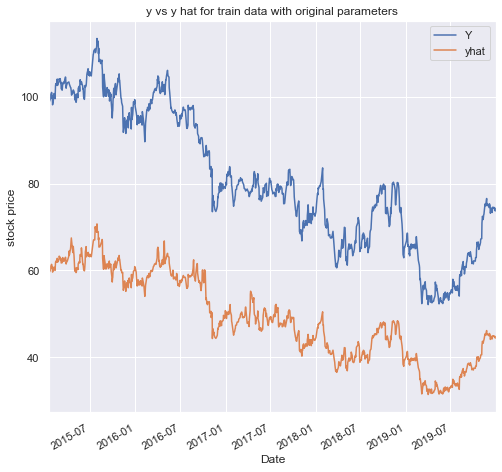

In [387]:
# # Question 3: Improving the results through step by step tuning

# # 3.1.Repeat the preceding operations for other pairs of parameters gamma and λ 
# Suggestion: change only one parameter at a time to check in which direction to go for improved performances


# 3.2.Select the best choice of parameters in terms of accuracy RMSE/avy and stability of performance when one goes from TRAIN to TEST set


#results from question 2 params

print('tuning parameters: gamma = {0},lambda ={1}'.format(val_gamma,val_lambda))

#adding train prediction column to train dataset copy
df_train_orig_lv = krr_radial.df_train.copy()
df_train_orig_lv['yhat'] = np.asarray(mat_y_pred_train.T)


krr_radial.plot_results(df_train_orig_lv,title= 'y vs y hat for train data with original parameters')


In [392]:
mat_y_pred_test.shape

(1, 250)

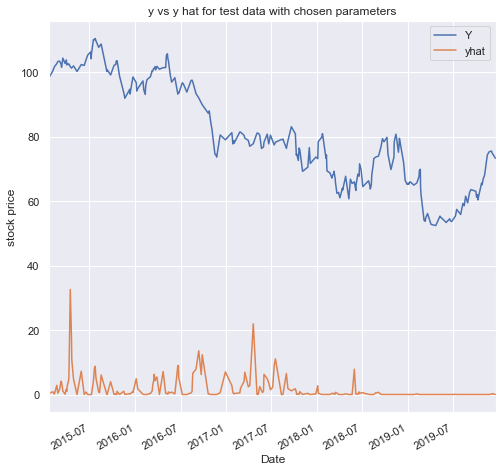

In [393]:
#adding test prediction column to test dataset copy
df_test_orig_lv = krr_radial.df_test.copy()
df_test_orig_lv['yhat'] = np.asarray(mat_y_pred_test.T)

krr_radial.plot_results(df_test_orig_lv,title= 'y vs y hat for test data with chosen parameters')


tuning parameters: lambda =0.6594,gamma = 0.0329
#train performance


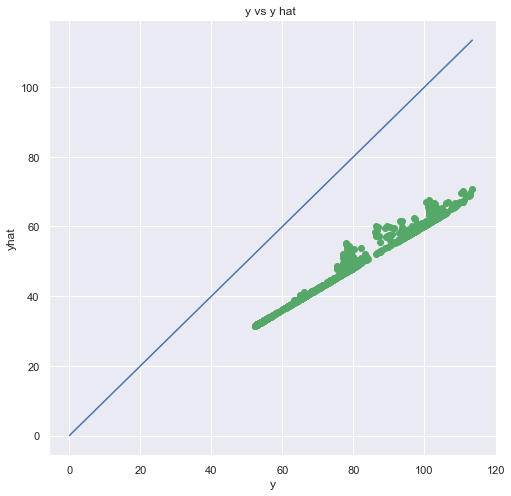

val_rmse:  32.101
ratio rmse/avy :  0.398
sigma:  0.0155
For 95% confidence level, confidence interval for ratio 0.398 is [0.3676, 0.4284]
#test performance


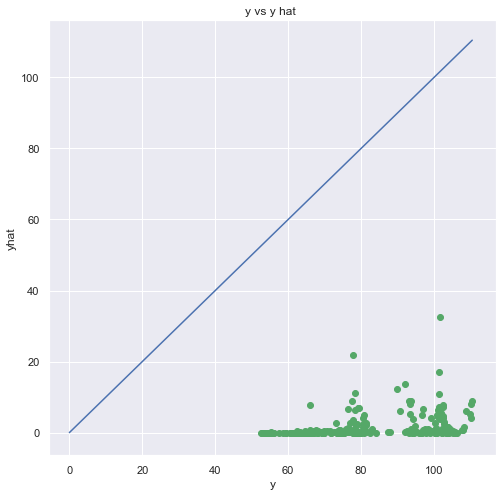

val_rmse:  81.2122
ratio rmse/avy :  0.9984
sigma:  0.0025
For 95% confidence level, confidence interval for ratio 0.9984 is [0.9935, 1.0033]


In [394]:
#first set  of values
gamma_0 = round(val_gamma,4)
lambda_0 = round(val_lambda,4)
#results from question 2 params
lambda_range = [lambda_0]
gamma_range = [gamma_0]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.6594,gamma = 0.01645
#train performance


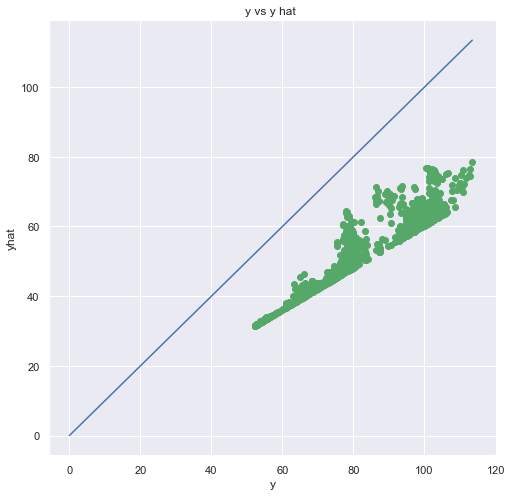

val_rmse:  30.0998
ratio rmse/avy :  0.3732
sigma:  0.0153
For 95% confidence level, confidence interval for ratio 0.3732 is [0.3432, 0.4032]
#test performance


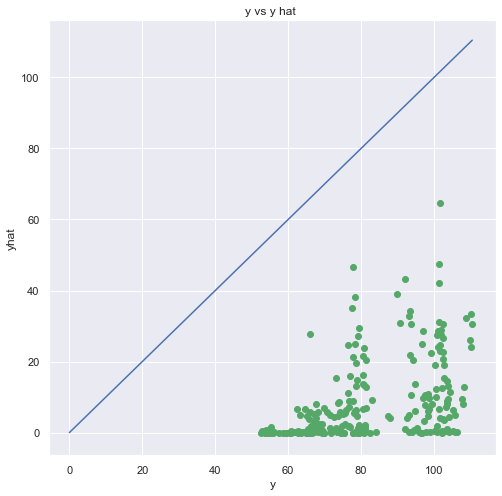

val_rmse:  74.7137
ratio rmse/avy :  0.9185
sigma:  0.0173
For 95% confidence level, confidence interval for ratio 0.9185 is [0.8846, 0.9524]
tuning parameters: lambda =0.6594,gamma = 0.0658
#train performance


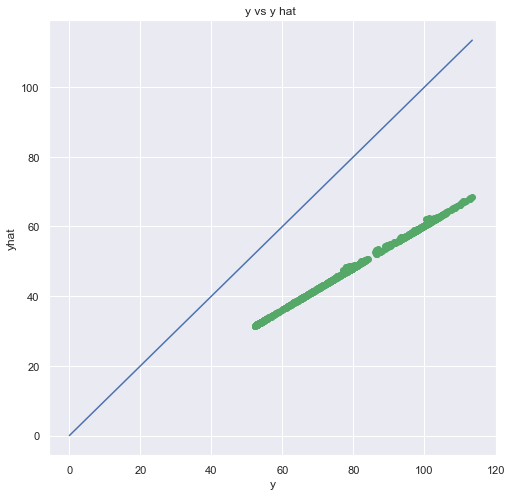

val_rmse:  32.6105
ratio rmse/avy :  0.4043
sigma:  0.0155
For 95% confidence level, confidence interval for ratio 0.4043 is [0.3739, 0.4347]
#test performance


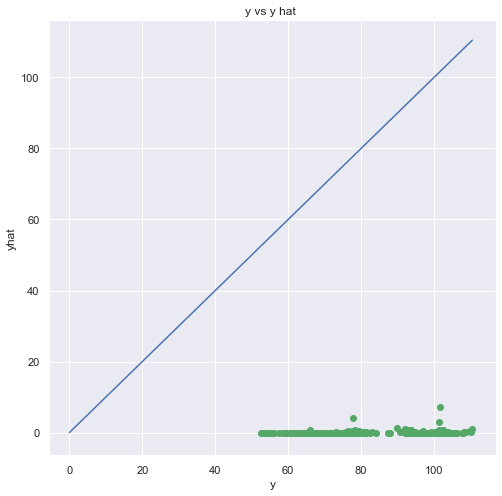

val_rmse:  82.7839
ratio rmse/avy :  1.0177


ValueError: math domain error

In [395]:
#tuning with lambda fixed and changing gamma
lambda_range = [lambda_0]
gamma_range = [gamma_0/2,2*gamma_0]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)


tuning parameters: lambda =0.3297,gamma = 0.01645
#train performance


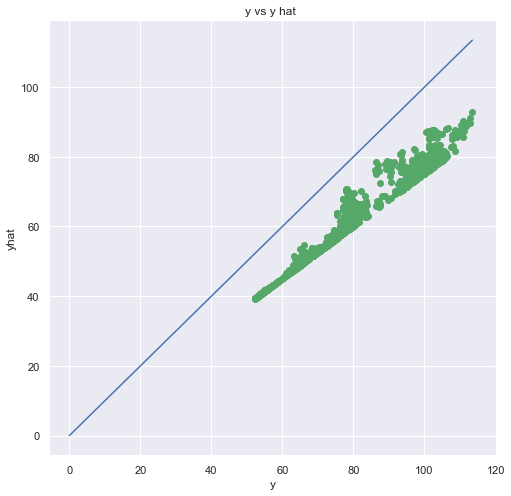

val_rmse:  18.5168
ratio rmse/avy :  0.2296
sigma:  0.0133
For 95% confidence level, confidence interval for ratio 0.2296 is [0.2035, 0.2557]
#test performance


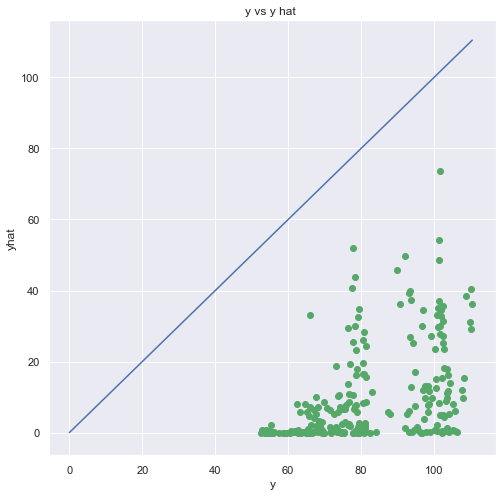

val_rmse:  73.2285
ratio rmse/avy :  0.9002
sigma:  0.019
For 95% confidence level, confidence interval for ratio 0.9002 is [0.863, 0.9374]
tuning parameters: lambda =1.3188,gamma = 0.01645
#train performance


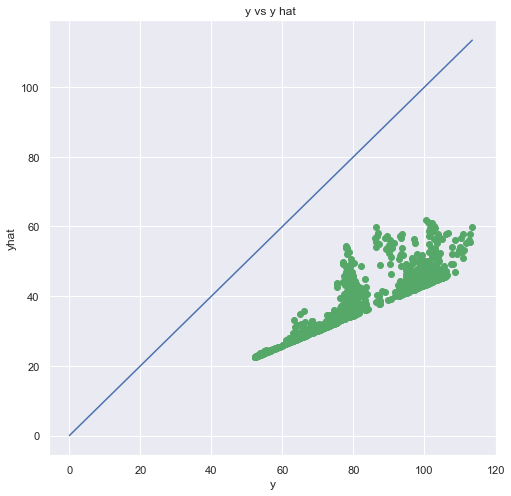

val_rmse:  43.8816
ratio rmse/avy :  0.544
sigma:  0.0158
For 95% confidence level, confidence interval for ratio 0.544 is [0.513, 0.575]
#test performance


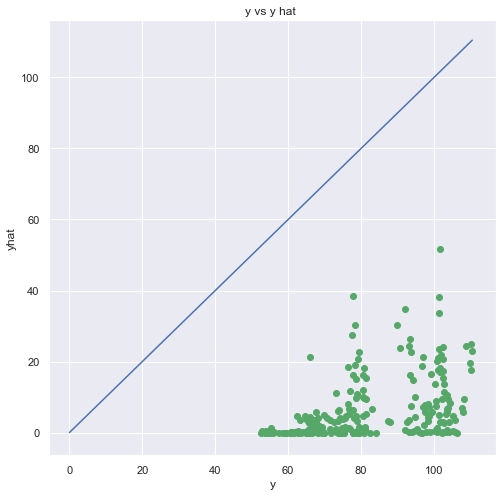

val_rmse:  76.6214
ratio rmse/avy :  0.942
sigma:  0.0148
For 95% confidence level, confidence interval for ratio 0.942 is [0.913, 0.971]


In [396]:
gamma_1 = gamma_0/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_0/2,2*lambda_0]
gamma_range = [gamma_1]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#krr_radial.tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.3297,gamma = 0.008225
#train performance


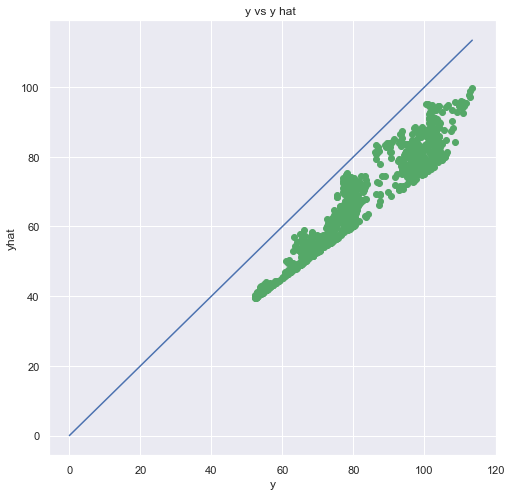

val_rmse:  15.6193
ratio rmse/avy :  0.1936
sigma:  0.0125
For 95% confidence level, confidence interval for ratio 0.1936 is [0.1691, 0.2181]
#test performance


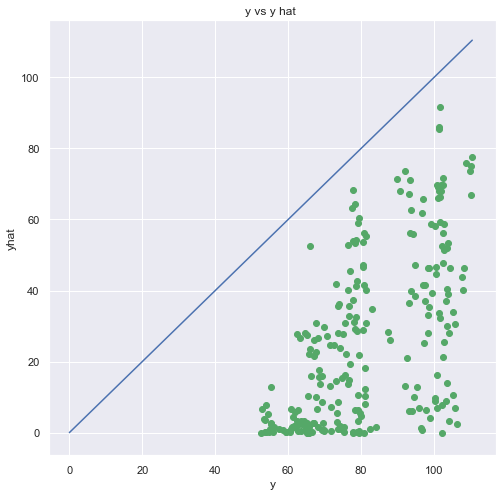

val_rmse:  59.1034
ratio rmse/avy :  0.7266
sigma:  0.0282
For 95% confidence level, confidence interval for ratio 0.7266 is [0.6713, 0.7819]
tuning parameters: lambda =0.3297,gamma = 0.0329
#train performance


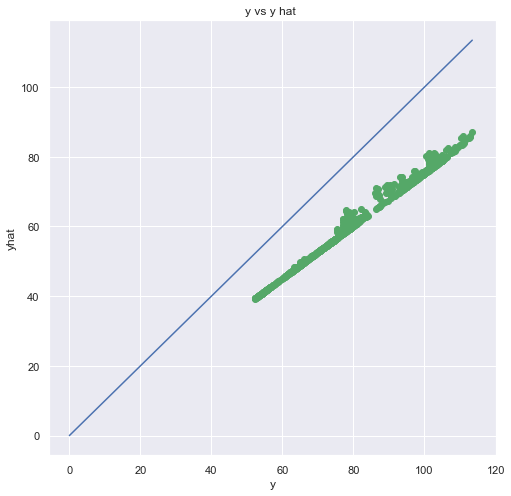

val_rmse:  19.9577
ratio rmse/avy :  0.2474
sigma:  0.0137
For 95% confidence level, confidence interval for ratio 0.2474 is [0.2205, 0.2743]
#test performance


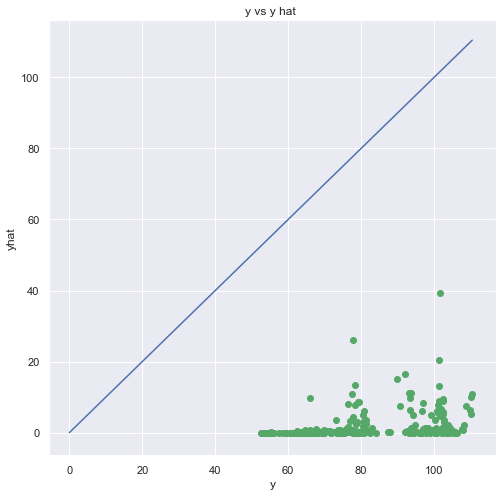

val_rmse:  80.8366
ratio rmse/avy :  0.9938
sigma:  0.005
For 95% confidence level, confidence interval for ratio 0.9938 is [0.984, 1.0036]


In [397]:
lambda_1 = lambda_0/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_1]
gamma_range = [gamma_1/2,2*gamma_1]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.16485,gamma = 0.008225
#train performance


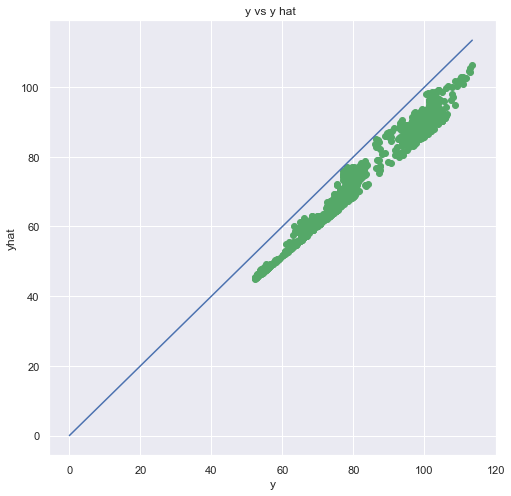

val_rmse:  8.731
ratio rmse/avy :  0.1082
sigma:  0.0098
For 95% confidence level, confidence interval for ratio 0.1082 is [0.089, 0.1274]
#test performance


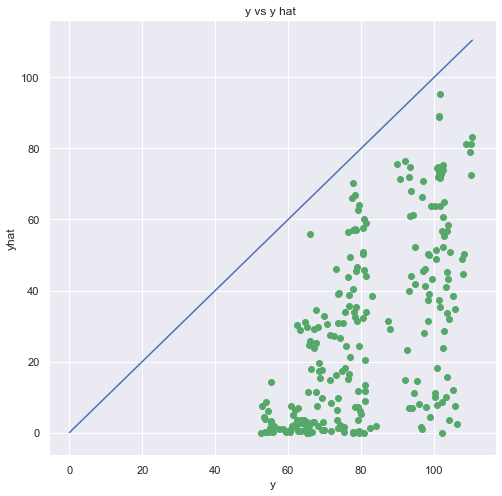

val_rmse:  57.3775
ratio rmse/avy :  0.7054
sigma:  0.0288
For 95% confidence level, confidence interval for ratio 0.7054 is [0.649, 0.7618]
tuning parameters: lambda =0.6594,gamma = 0.008225
#train performance


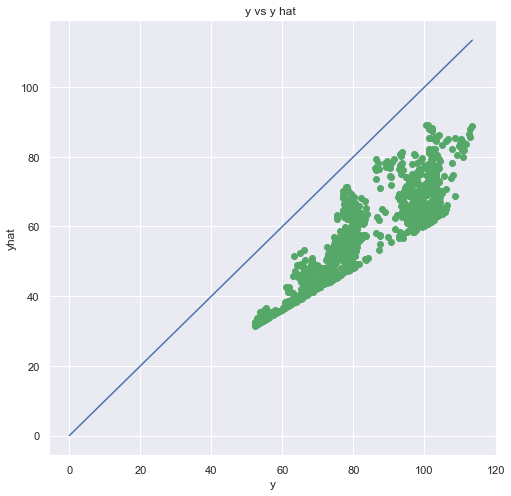

val_rmse:  25.8747
ratio rmse/avy :  0.3208
sigma:  0.0148
For 95% confidence level, confidence interval for ratio 0.3208 is [0.2918, 0.3498]
#test performance


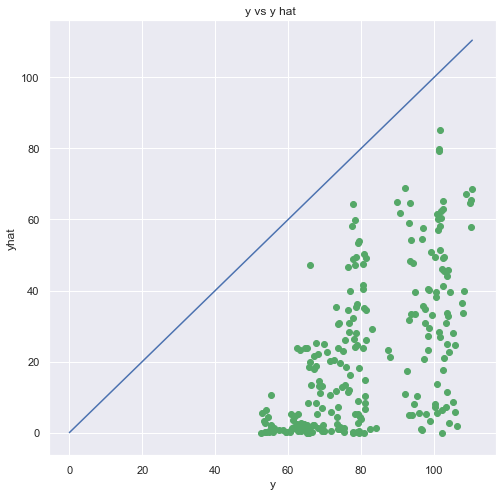

val_rmse:  61.893
ratio rmse/avy :  0.7609
sigma:  0.027
For 95% confidence level, confidence interval for ratio 0.7609 is [0.708, 0.8138]


In [398]:
gamma_2 = gamma_1/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_1/2,2*lambda_1]
gamma_range = [gamma_2]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)


tuning parameters: lambda =0.16485,gamma = 0.0041125
#train performance


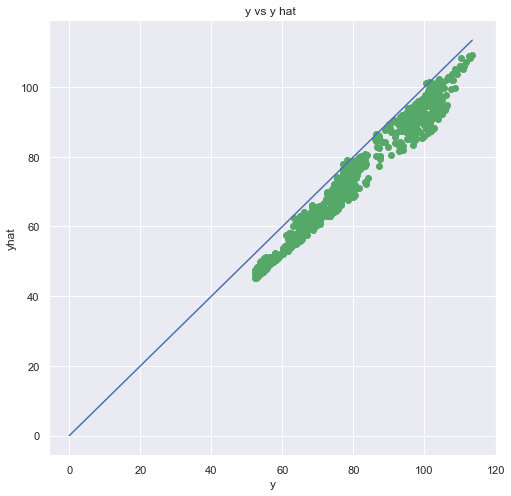

val_rmse:  6.514
ratio rmse/avy :  0.0808
sigma:  0.0086
For 95% confidence level, confidence interval for ratio 0.0808 is [0.0639, 0.0977]
#test performance


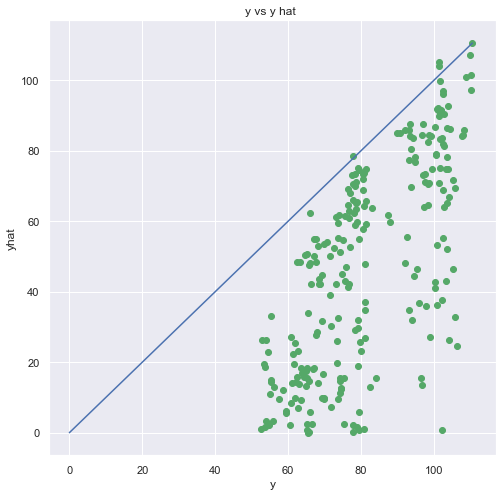

val_rmse:  40.2225
ratio rmse/avy :  0.4945
sigma:  0.0316
For 95% confidence level, confidence interval for ratio 0.4945 is [0.4326, 0.5564]
tuning parameters: lambda =0.16485,gamma = 0.01645
#train performance


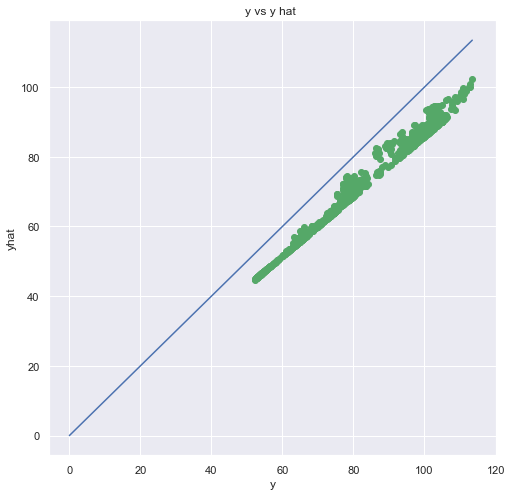

val_rmse:  10.4713
ratio rmse/avy :  0.1298
sigma:  0.0106
For 95% confidence level, confidence interval for ratio 0.1298 is [0.109, 0.1506]
#test performance


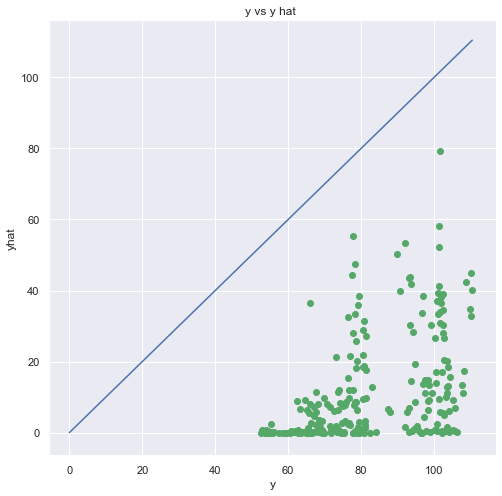

val_rmse:  72.2541
ratio rmse/avy :  0.8883
sigma:  0.0199
For 95% confidence level, confidence interval for ratio 0.8883 is [0.8493, 0.9273]


In [399]:
lambda_2 = lambda_1/2
#tuning with lambda fixed and changing gamma
lambda_range = [lambda_2]
gamma_range = [gamma_2/2,2*gamma_2]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.082425,gamma = 0.0041125
#train performance


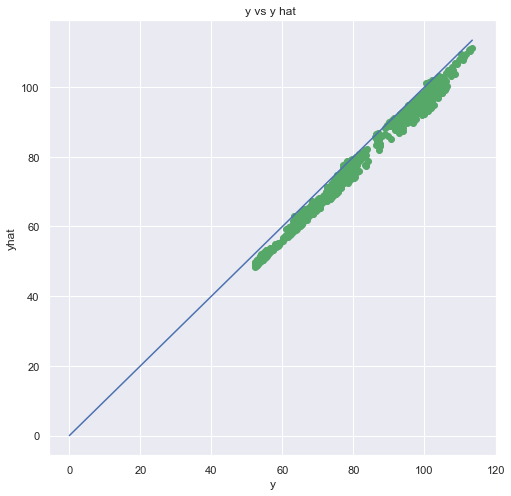

val_rmse:  3.4378
ratio rmse/avy :  0.0426
sigma:  0.0064
For 95% confidence level, confidence interval for ratio 0.0426 is [0.0301, 0.0551]
#test performance


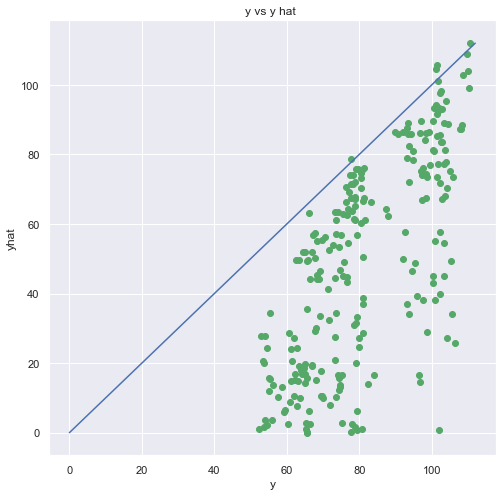

val_rmse:  39.0726
ratio rmse/avy :  0.4803
sigma:  0.0316
For 95% confidence level, confidence interval for ratio 0.4803 is [0.4184, 0.5422]
tuning parameters: lambda =0.3297,gamma = 0.0041125
#train performance


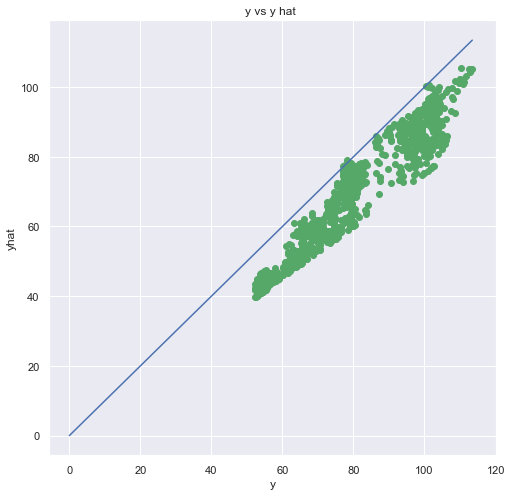

val_rmse:  11.8194
ratio rmse/avy :  0.1465
sigma:  0.0112
For 95% confidence level, confidence interval for ratio 0.1465 is [0.1245, 0.1685]
#test performance


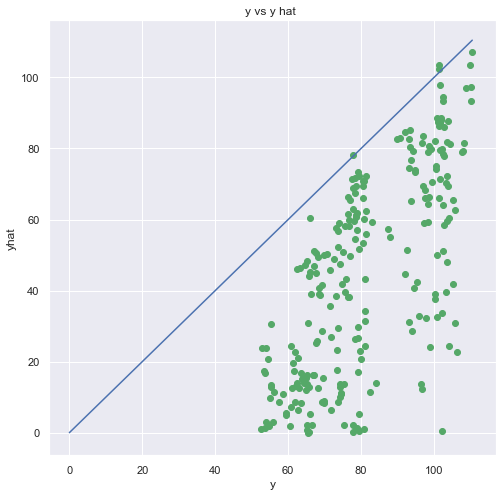

val_rmse:  42.3044
ratio rmse/avy :  0.5201
sigma:  0.0316
For 95% confidence level, confidence interval for ratio 0.5201 is [0.4582, 0.582]


In [400]:
gamma_3 = gamma_2/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_2/2,2*lambda_2]
gamma_range = [gamma_3]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.082425,gamma = 0.00205625
#train performance


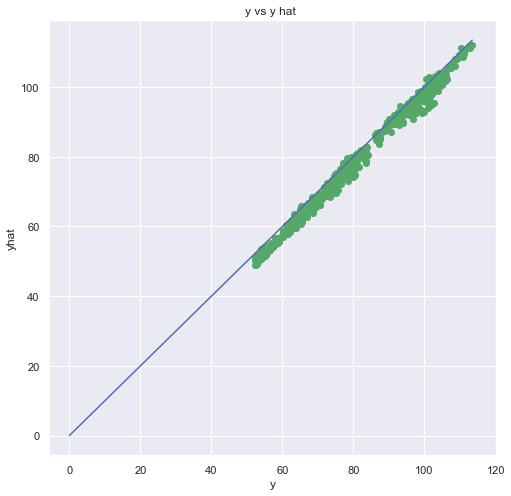

val_rmse:  2.2914
ratio rmse/avy :  0.0284
sigma:  0.0053
For 95% confidence level, confidence interval for ratio 0.0284 is [0.018, 0.0388]
#test performance


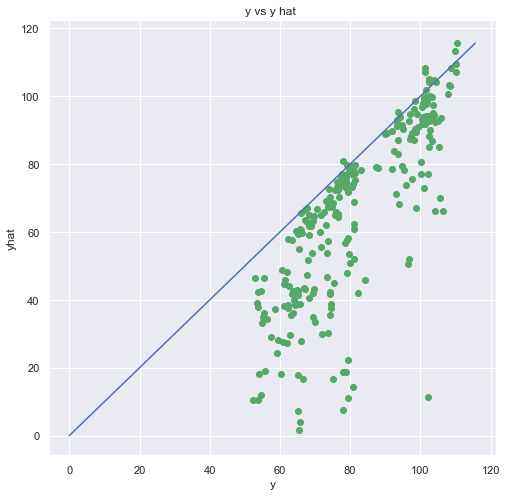

val_rmse:  22.9248
ratio rmse/avy :  0.2818
sigma:  0.0285
For 95% confidence level, confidence interval for ratio 0.2818 is [0.2259, 0.3377]
tuning parameters: lambda =0.082425,gamma = 0.008225
#train performance


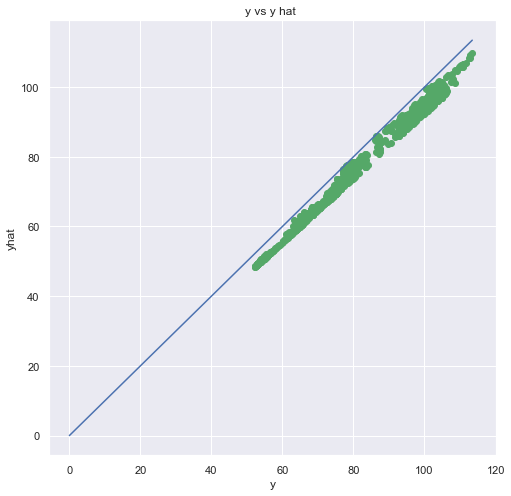

val_rmse:  4.6427
ratio rmse/avy :  0.0576
sigma:  0.0074
For 95% confidence level, confidence interval for ratio 0.0576 is [0.0431, 0.0721]
#test performance


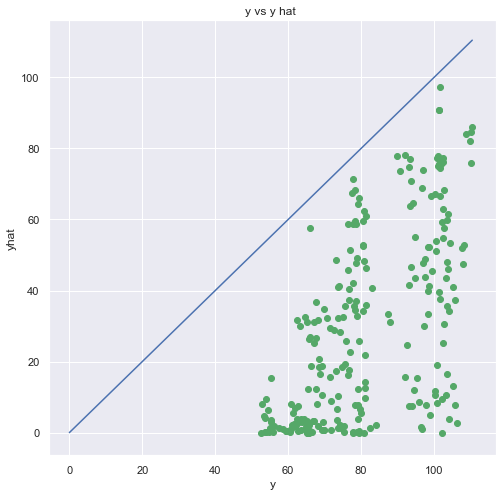

val_rmse:  56.4061
ratio rmse/avy :  0.6934
sigma:  0.0292
For 95% confidence level, confidence interval for ratio 0.6934 is [0.6362, 0.7506]


In [401]:
lambda_3 = lambda_2/2
#tuning with lambda fixed and changing gamma
lambda_range = [lambda_3]
gamma_range = [gamma_3/2,2*gamma_3]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)


tuning parameters: lambda =0.0412125,gamma = 0.00205625
#train performance


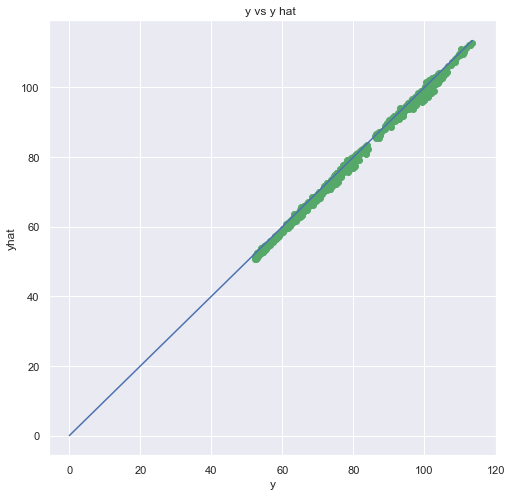

val_rmse:  1.1788
ratio rmse/avy :  0.0146
sigma:  0.0038
For 95% confidence level, confidence interval for ratio 0.0146 is [0.0072, 0.022]
#test performance


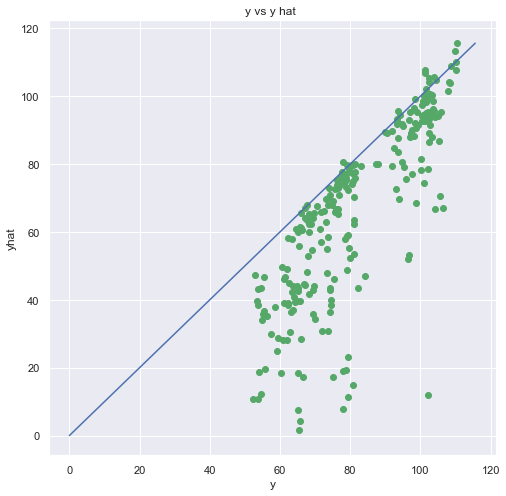

val_rmse:  22.3345
ratio rmse/avy :  0.2746
sigma:  0.0282
For 95% confidence level, confidence interval for ratio 0.2746 is [0.2193, 0.3299]
tuning parameters: lambda =0.16485,gamma = 0.00205625
#train performance


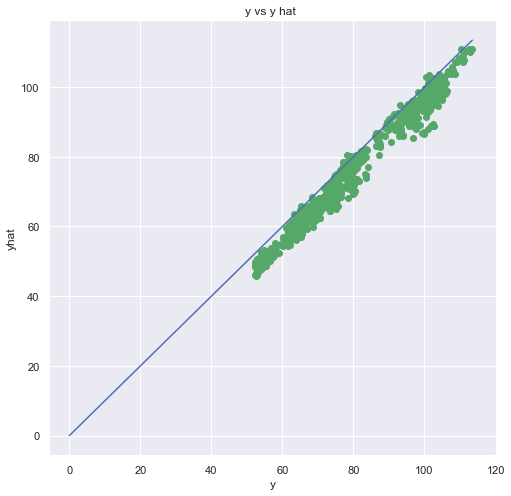

val_rmse:  4.362
ratio rmse/avy :  0.0541
sigma:  0.0072
For 95% confidence level, confidence interval for ratio 0.0541 is [0.04, 0.0682]
#test performance


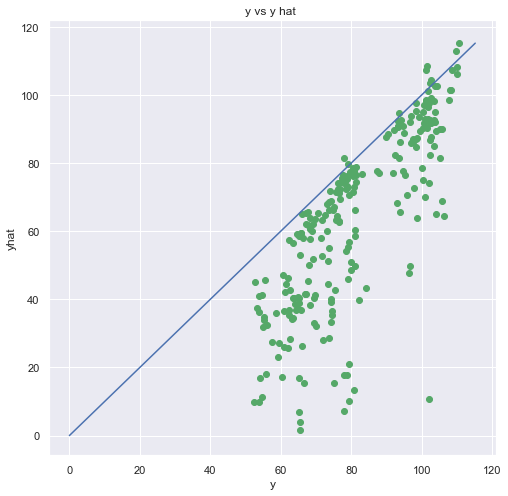

val_rmse:  24.0535
ratio rmse/avy :  0.2957
sigma:  0.0289
For 95% confidence level, confidence interval for ratio 0.2957 is [0.2391, 0.3523]


In [402]:
gamma_4 = gamma_3/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_3/2,2*lambda_3]
gamma_range = [gamma_4]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.0412125,gamma = 0.001028125
#train performance


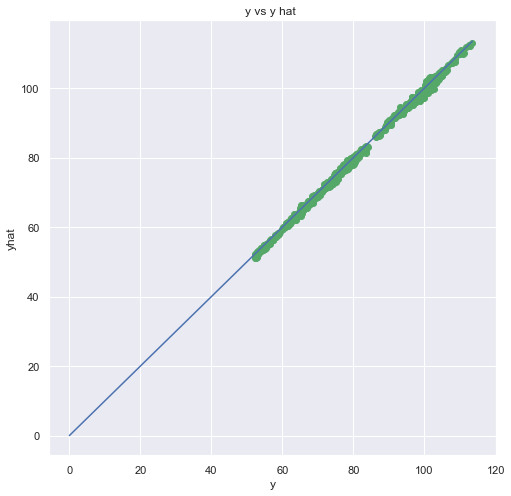

val_rmse:  0.7577
ratio rmse/avy :  0.0094
sigma:  0.0031
For 95% confidence level, confidence interval for ratio 0.0094 is [0.0033, 0.0155]
#test performance


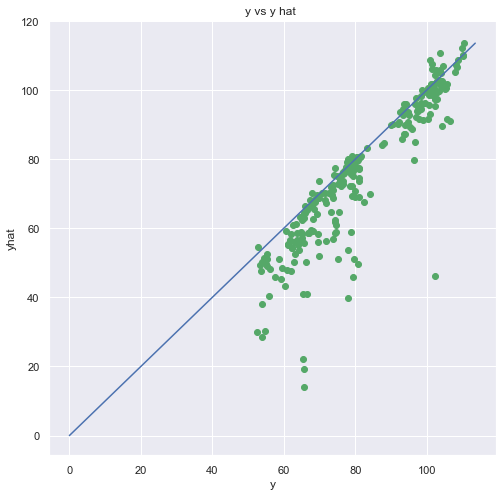

val_rmse:  10.6317
ratio rmse/avy :  0.1307
sigma:  0.0213
For 95% confidence level, confidence interval for ratio 0.1307 is [0.089, 0.1724]
tuning parameters: lambda =0.0412125,gamma = 0.0041125
#train performance


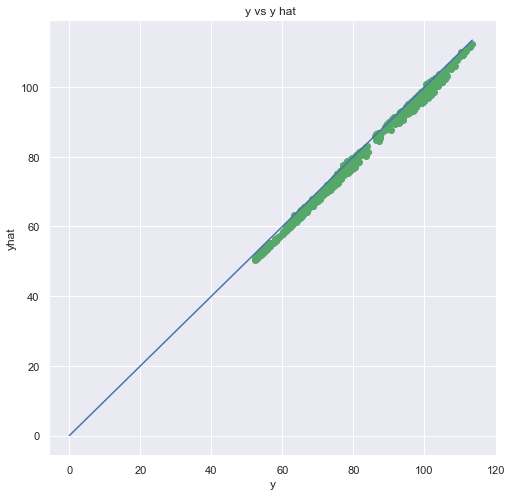

val_rmse:  1.769
ratio rmse/avy :  0.0219
sigma:  0.0046
For 95% confidence level, confidence interval for ratio 0.0219 is [0.0129, 0.0309]
#test performance


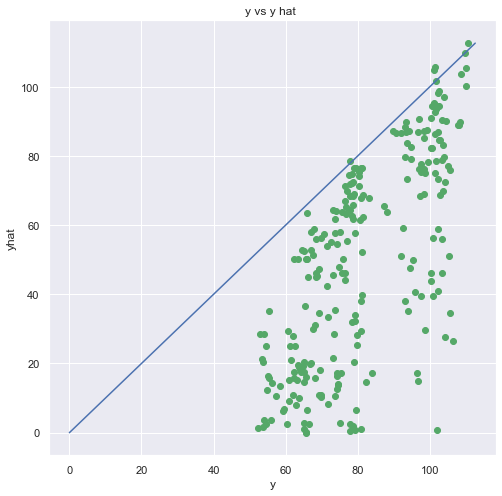

val_rmse:  38.4661
ratio rmse/avy :  0.4729
sigma:  0.0316
For 95% confidence level, confidence interval for ratio 0.4729 is [0.411, 0.5348]


In [403]:
lambda_4 = lambda_3/2
#tuning with lambda fixed and changing gamma
lambda_range = [lambda_4]
gamma_range = [gamma_4/2,2*gamma_4]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
#tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.02060625,gamma = 0.001028125
#train performance


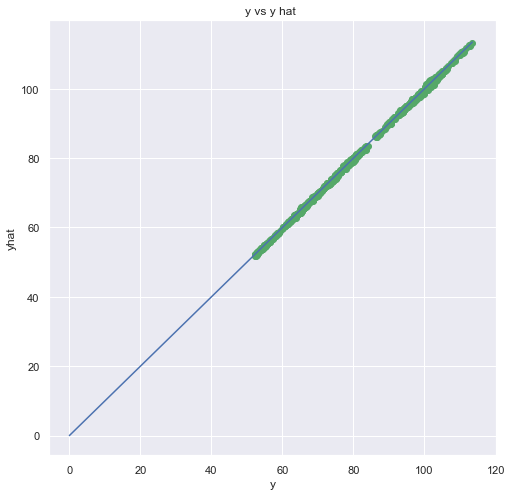

val_rmse:  0.3952
ratio rmse/avy :  0.0049
sigma:  0.0022
For 95% confidence level, confidence interval for ratio 0.0049 is [0.0006, 0.0092]
#test performance


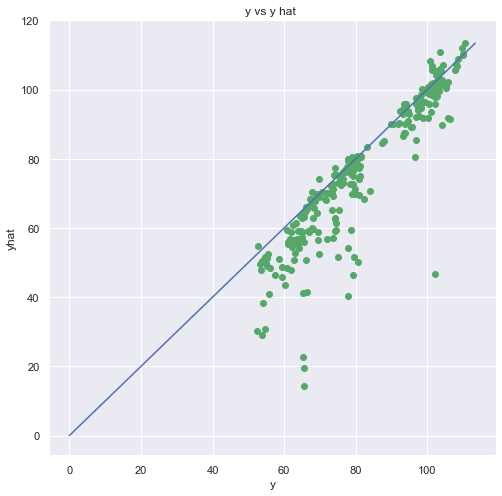

val_rmse:  10.3952
ratio rmse/avy :  0.1278
sigma:  0.0211
For 95% confidence level, confidence interval for ratio 0.1278 is [0.0864, 0.1692]
tuning parameters: lambda =0.082425,gamma = 0.001028125
#train performance


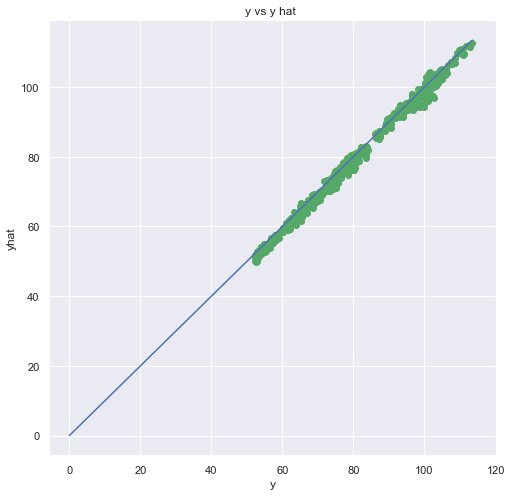

val_rmse:  1.4372
ratio rmse/avy :  0.0178
sigma:  0.0042
For 95% confidence level, confidence interval for ratio 0.0178 is [0.0096, 0.026]
#test performance


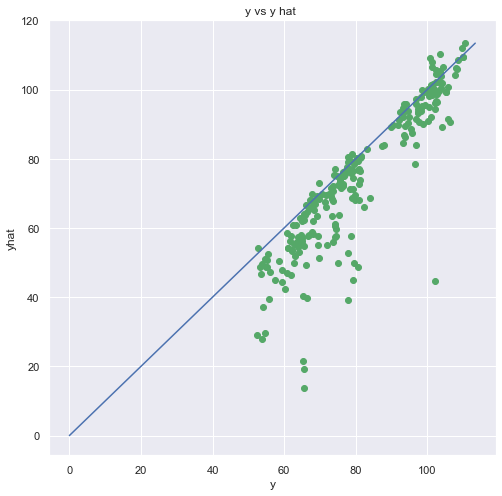

val_rmse:  11.096
ratio rmse/avy :  0.1364
sigma:  0.0217
For 95% confidence level, confidence interval for ratio 0.1364 is [0.0939, 0.1789]


In [404]:
gamma_5 = gamma_4/2
#tuning with gamma fixed and changing lambda
lambda_range = [lambda_4/2,2*lambda_4]
gamma_range = [gamma_5]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
# tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

tuning parameters: lambda =0.02060625,gamma = 0.0005140625
#train performance


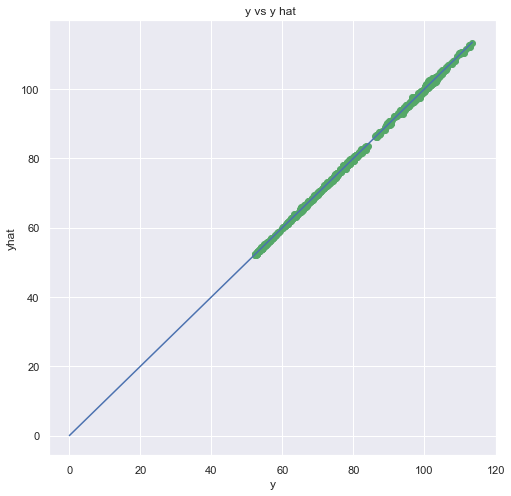

val_rmse:  0.3469
ratio rmse/avy :  0.0043
sigma:  0.0021
For 95% confidence level, confidence interval for ratio 0.0043 is [0.0002, 0.0084]
#test performance


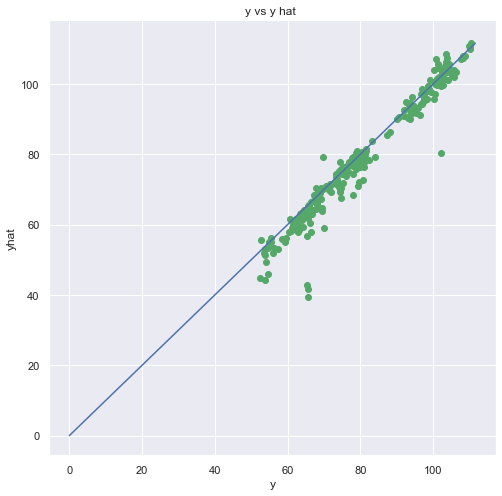

val_rmse:  4.1443
ratio rmse/avy :  0.0509
sigma:  0.0139
For 95% confidence level, confidence interval for ratio 0.0509 is [0.0237, 0.0781]
tuning parameters: lambda =0.02060625,gamma = 0.00205625
#train performance


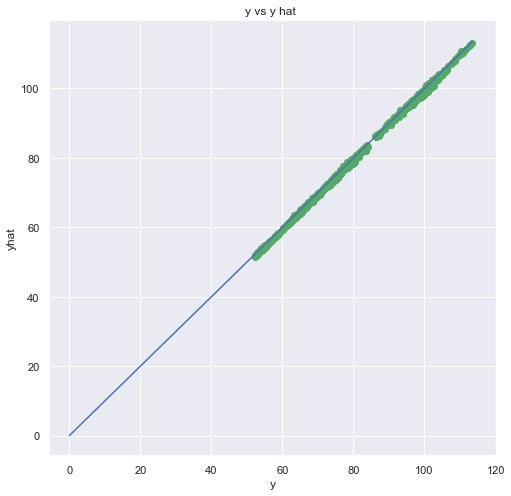

val_rmse:  0.599
ratio rmse/avy :  0.0074
sigma:  0.0027
For 95% confidence level, confidence interval for ratio 0.0074 is [0.0021, 0.0127]
#test performance


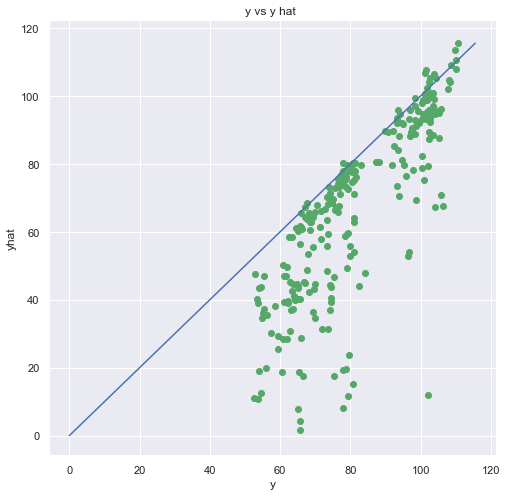

val_rmse:  22.0324
ratio rmse/avy :  0.2709
sigma:  0.0281
For 95% confidence level, confidence interval for ratio 0.2709 is [0.2158, 0.326]


In [405]:
lambda_5 = lambda_4/2
#tuning with lambda fixed and changing gamma
lambda_range = [lambda_5]
gamma_range = [gamma_5/2,2*gamma_5]
tuned_parameters = {'lambda': lambda_range, 'gamma': gamma_range}
# tune_krr(tuned_parameters,df_train,df_test)
krr_radial.tune_krr(tuned_parameters)

In [439]:
#best parameters
best_params = {'lambda': [round(lambda_5,4)], 'gamma': [round(gamma_5/2,4)]}
print('best_params: ',best_params)


best_params:  {'lambda': [0.0206], 'gamma': [0.0005]}


lambda =0.02060625,gamma = 0.0005140625


####train performance for best parameters####


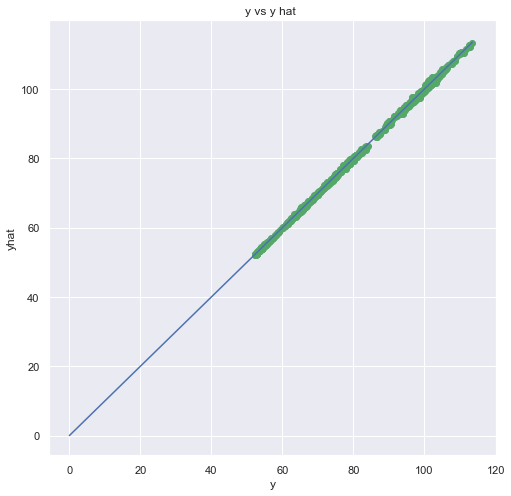

val_rmse:  0.3481
ratio rmse/avy :  0.0043
sigma:  0.0021
For 95% confidence level, confidence interval for ratio 0.0043 is [0.0002, 0.0084]


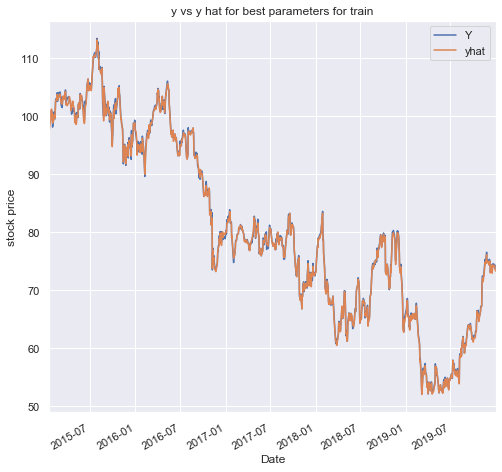

####test performance for best parameters####


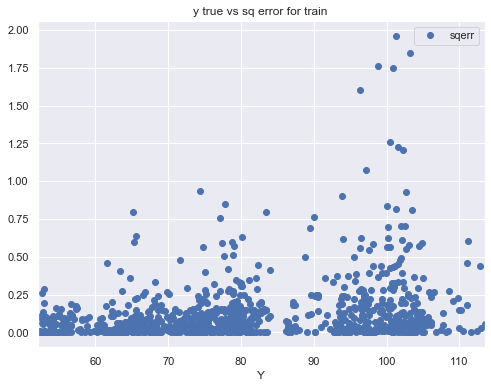

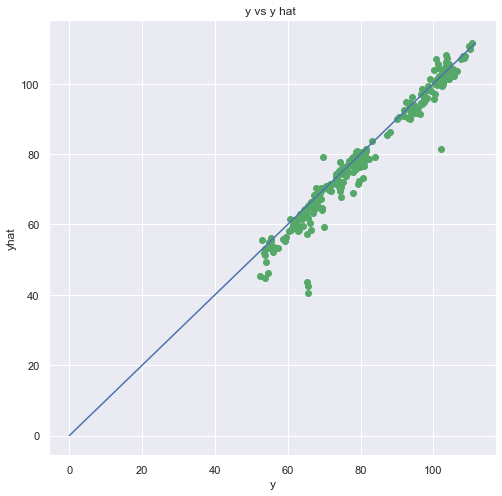

val_rmse:  3.9934
ratio rmse/avy :  0.0491
sigma:  0.0137
For 95% confidence level, confidence interval for ratio 0.0491 is [0.0222, 0.076]


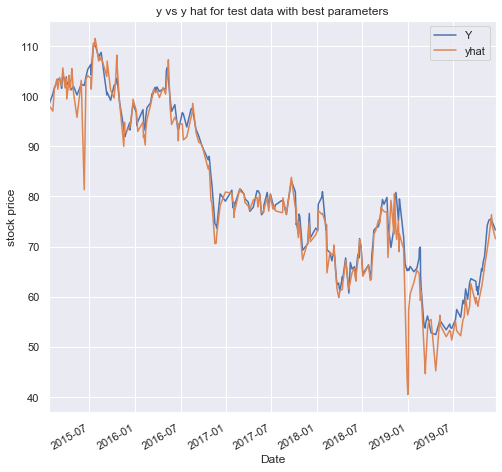

Date          X1          X2         X3         X4          X5  \
0   2018-12-31   65.190002  101.830002  50.369999  37.099998  150.410004   
1   2019-01-02   65.519997  103.120003  51.459999  37.209999  153.169998   
2   2018-12-28   65.239998  101.500000  50.680000  37.119999  150.009995   
3   2015-06-10   99.980003   64.594391  81.489998  51.880001   66.650002   
4   2019-02-19   69.529999  111.239998  59.099998  43.580002  177.779999   
..         ...         ...         ...        ...        ...         ...   
245 2018-11-23   75.089996  102.940002  59.630001  36.889999  148.220001   
246 2015-03-09  101.900002   64.609550  77.629997  51.599998   66.500000   
247 2017-06-27   80.120003   85.470001  64.449997  64.070000  118.320000   
248 2017-02-24   80.860001   85.129997  68.949997  62.450001   95.699997   
249 2018-03-05   67.459999   96.220001  71.910004  56.959999  134.559998   

             X6          X7         X8         X9  ...         X95  \
0     61.880001  122.510002  61.113724  40.450001  ...  160.130005   
1     62.549999  124.449997  61.584312  41.099998  ...  155.020004   
2     62.939999  122.379997  61.027451  40.709999  ...  163.940002   
3    114.750000   81.320000  54.635296  36.549999  ...   65.224998   
4     67.589996  144.259995  62.389999  46.290001  ...  171.309998   
..          ...         ...        ...        ...  ...         ...   
245   66.739998  134.809998  66.321571  41.540001  ...  157.149994   
246  101.809998   72.820000  54.054901  32.160000  ...   67.125000   
247   71.239998   86.620003  72.533333  46.139999  ...  115.050003   
248   69.370003   86.449997  67.419609  40.299999  ...   90.820000   
249   78.690002  101.379997  51.129414  38.209999  ...  133.820007   

            X96         X97        X98        X99        X100  X101  \
0     65.570000  126.730003  63.152943  41.939999  299.929993   1.0   
1     65.120003  123.120003  62.541176  40.259998  303.220001   1.0   
2     67.349998  136.320007  65.717644  42.840000  312.500000   1.0   
3    112.459999   81.949997  55.984314  35.450001  178.520004   1.0   
4     70.050003  138.759995  61.521568  43.910000  305.959991   1.0   
..          ...         ...        ...        ...         ...   ...   
245   71.879997  141.630005  68.211761  42.459999  339.589996   1.0   
246  104.510002   70.860001  56.078430  31.719999  164.520004   1.0   
247   65.150002   84.849998  72.058823  44.730000  231.949997   1.0   
248   65.589996   83.639999  64.647057  40.119999  207.029999   1.0   
249   80.699997  101.000000  54.525490  39.290001  269.000000   1.0   

              Y      yhat       sqerr  
0     65.519997   40.4799  627.006440  
1     65.580002   42.5376  530.952282  
2     65.190002   43.5350  468.939131  
3    102.129997   81.3504  431.791662  
4     69.879997   59.2434  113.137201  
..          ...       ...         ...  
245   75.180000   75.1153    0.004186  
246  102.500000  102.4360    0.004096  
247   80.489998   80.4473    0.001823  
248   81.480003   81.5111    0.000967  
249   68.309998   68.3164    0.000041  

[250 rows x 105 columns]

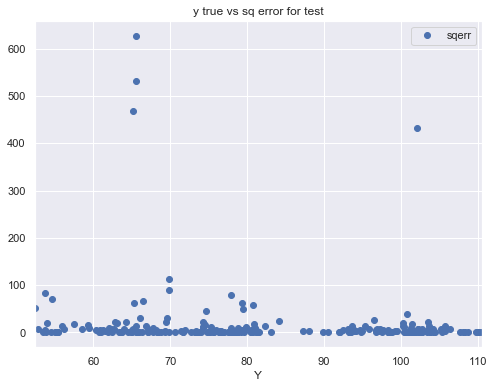

In [408]:
# 3.3. Identify the 10  cases in the TEST set for which the squared prediction error is the largest 


#train performance for best parameters
print('####train performance for best parameters####')
#calc linevector_A for  best params
linevector_A_best = krr_radial.cal_linevector_A(best_params['gamma'][0],best_params['lambda'][0],krr_radial.df_train)

#calc y_predictions
val_rmse_train_best,ratio_rmse_avy_train_best,mat_y_pred_train_best = krr_radial.cal_performance_params(
    best_params['gamma'][0],linevector_A_best,krr_radial.df_train,krr_radial.df_train)

df_train_best_lv = krr_radial.df_train.copy()
df_train_best_lv['yhat'] = np.asarray(mat_y_pred_train_best.T)

krr_radial.plot_results(df_train_best_lv,title= 'y vs y hat for best parameters for train')

#train data - true vs error plot
df_train_best_lv['sqerr'] = np.asarray(np.square(df_train_best_lv['Y']-df_train_best_lv['yhat']))
df_train_best_lv.plot('Y','sqerr',style='o',title = 'y true vs sq error for train ')


#test performance for best parameters
print('####test performance for best parameters####')

#calc y_predictions for test data for best params
val_rmse_test_best,ratio_rmse_avy_test_best,mat_y_pred_test_best = krr_radial.cal_performance_params(
    best_params['gamma'][0],linevector_A_best,krr_radial.df_test,krr_radial.df_train)

df_test_best_lv = krr_radial.df_test.copy()
df_test_best_lv['yhat'] = np.asarray(mat_y_pred_test_best.T)

krr_radial.plot_results(df_test_best_lv,title= 'y vs y hat for test data with best parameters')

#test data - true vs error plot
df_test_best_lv['sqerr'] = np.asarray(np.square(df_test_best_lv['Y']-df_test_best_lv['yhat']))
df_test_best_lv.plot('Y','sqerr',style='o',title = 'y true vs sq error for test')

#calc squared pred error and top 10 largest error cases
#reshaping arguments for RMSE
mat_y_true = np.asmatrix(krr_radial.df_test['Y'])
df_test_error = krr_radial.df_test.copy()
df_test_error['yhat'] = df_test_best_lv['yhat']
df_test_error['sqerr'] = np.asarray(np.square(mat_y_pred_test_best-mat_y_true))[0]
#sqerror_top10 = np.asarray(-np.sort(-np.square(mat_y_pred-mat_y_true))[0,:10])[0]
df_test_error.sort_values(by = ['sqerr'],ascending =False,axis=0,inplace=True)

df_test_error.reset_index(inplace=True,drop=True)
df_test_error.to_excel('df_test_error.xlsx')

df_test_error

--------PCA test data--------
explained_variance_ratio : 0.96


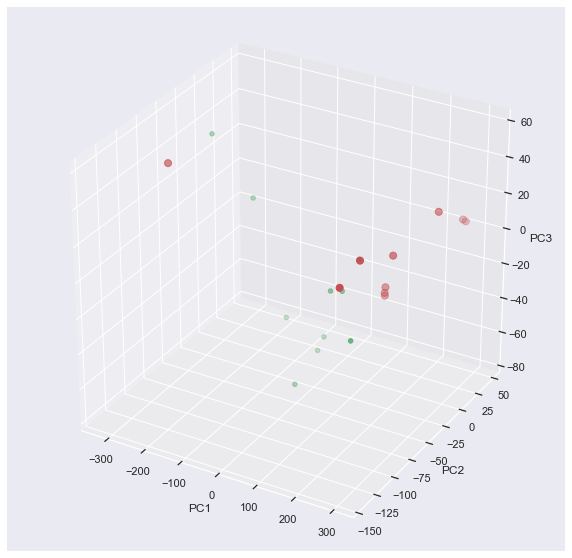

In [441]:
# 3.4.Vizualise the 10 cases by performing a PCA analysis and projecting all the TEST cases 
#onto the first 3 principal eigenvectors of the PCA correlation matrix 


#PCA analysis and projection to 3 components
pca = PCA(n_components=3)
#fit train data
print("--------PCA test data--------")
df_test_error_reduced = pca.fit_transform(df_test_error.loc[:,'X1':'X101'])  
df_test_error_reduced = pd.DataFrame(df_test_error_reduced)
print('explained_variance_ratio :', np.around(np.sum(pca.explained_variance_ratio_),2) )
filepath = 'df_test_error_reduced.xlsx'
with ExcelWriter(filepath) as writer:
    df_test_error_reduced.to_excel(writer,sheet_name = 'df_test_error_reduced' )
    df_test_error.to_excel(writer,sheet_name = 'df_test_error' )
    writer.save()  

size_testerr = df_test_error_reduced.shape[0]

cases_lowerror = np.arange((size_testerr-10),size_testerr)
cases_lowerror

size_testerr = df_test_error_reduced.shape[0]
cases_lowerror = np.arange((size_testerr-10),size_testerr)

threedee = plt.figure(figsize=(10,10)).gca(projection='3d')
threedee.scatter(df_test_error_reduced.loc[0:9,0],
                 df_test_error_reduced.loc[0:9,1], 
                 df_test_error_reduced.loc[0:9,2],c='r',s=50)
threedee.scatter(df_test_error_reduced.loc[cases_lowerror,0],
                 df_test_error_reduced.loc[cases_lowerror,1],
                 df_test_error_reduced.loc[cases_lowerror,2],c='g')
threedee.set_xlabel('PC1')
threedee.set_ylabel('PC2')
threedee.set_zlabel('PC3')
plt.show()


In [442]:
def plot_setspines(ax1):  
  ax1.spines['left'].set_position('zero')
  ax1.spines['right'].set_color('none')
  ax1.spines['bottom'].set_position('zero')
  ax1.spines['top'].set_color('none')
  ax1.spines['left'].set_smart_bounds(True)
  ax1.spines['bottom'].set_smart_bounds(True)
  ax1.xaxis.set_ticks_position('bottom')
  ax1.yaxis.set_ticks_position('left')
  ax1.xaxis.set_label_coords(1,0)
  ax1.yaxis.set_label_coords(-0.1,1)
  return ax1

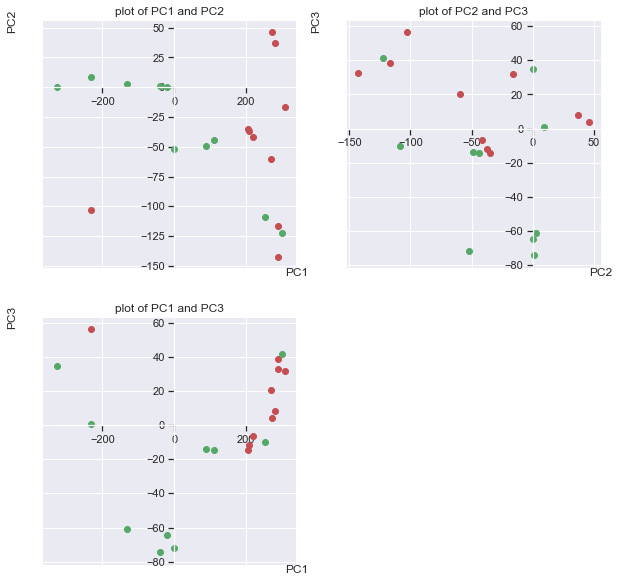

In [443]:
fig = plt.figure(figsize=(10,10))
#plot of PC1 and PC2
ax1 = fig.add_subplot(2,2,1)
ax1 = plot_setspines(ax1)
ax1.scatter(df_test_error_reduced.loc[0:9,0],df_test_error_reduced.loc[0:9,1],color='r')
ax1.scatter(df_test_error_reduced.loc[cases_lowerror,0],df_test_error_reduced.loc[cases_lowerror,1],color='g')
ax1.set(title = 'plot of PC1 and PC2',xlabel = 'PC1', ylabel = 'PC2')


#plot of PC2 and PC3
ax2 = fig.add_subplot(2,2,2)
ax2 = plot_setspines(ax2)
ax2.scatter(df_test_error_reduced.loc[0:9,1],df_test_error_reduced.loc[0:9,2],color='r')
ax2.scatter(df_test_error_reduced.loc[cases_lowerror,1],df_test_error_reduced.loc[cases_lowerror,2],color='g')
ax2.set(title = 'plot of PC2 and PC3',xlabel = 'PC2', ylabel = 'PC3')


#plot of PC1 and PC3
ax3 = fig.add_subplot(2,2,3)
ax3 = plot_setspines(ax3)
ax3.scatter(df_test_error_reduced.loc[0:9,0],df_test_error_reduced.loc[0:9,2],color='r')
ax3.scatter(df_test_error_reduced.loc[cases_lowerror,0],df_test_error_reduced.loc[cases_lowerror,2],color='g')
ax3.set(title = 'plot of PC1 and PC3',xlabel = 'PC1', ylabel = 'PC3')

plt.show()

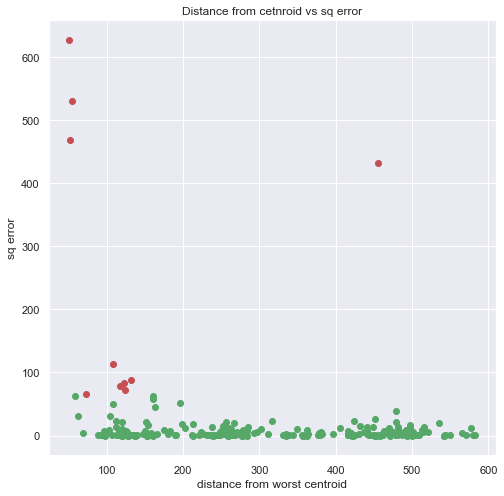

In [444]:
#calculate centroid of 10 worst cases
centroid_worst = np.sum(df_test_error.loc[:9,'X1':'X101' ])/10
centroid_worst

#distance between centroid and each case
df_test_error['Dn_centr_w'] = np.linalg.norm(df_test_error.loc[:,'X1':'X101']- centroid_worst, axis=1)
df_test_error

#scatterplot of distances
fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.plot(df_test_error.loc[0:9,'Dn_centr_w'],df_test_error.loc[0:9,'sqerr'],'ro')
ax.plot(df_test_error.loc[cases_lowerror,'Dn_centr_w'],df_test_error.loc[cases_lowerror,'sqerr'],'go')
ax.plot(df_test_error.loc[10:,'Dn_centr_w'],df_test_error.loc[10:,'sqerr'],'go')
ax.set(title = 'Distance from cetnroid vs sq error',xlabel = 'distance from worst centroid',
       ylabel = 'sq error')

plt.show()

In [445]:
# 3.5.Try to identify what went wrong with the prediction of the absolute worse case X(w) 
#by looking at the terms involved in pred(Xw) and comparing to another case 
#where the prediction erro is really small


print(df_test_error.loc[0:9])
print('least error: \n',df_test_error.loc[(df_test_error.shape[0]-2) :])


df_test_error.to_excel('df_test_error.xlsx')

        Date         X1          X2         X3         X4          X5  \
0 2018-12-31  65.190002  101.830002  50.369999  37.099998  150.410004   
1 2019-01-02  65.519997  103.120003  51.459999  37.209999  153.169998   
2 2018-12-28  65.239998  101.500000  50.680000  37.119999  150.009995   
3 2015-06-10  99.980003   64.594391  81.489998  51.880001   66.650002   
4 2019-02-19  69.529999  111.239998  59.099998  43.580002  177.779999   
5 2018-10-24  72.449997   97.419998  67.889999  35.959999  148.300003   
6 2019-03-11  52.930000  125.040001  49.950001  48.560001  169.259995   
7 2018-11-26  75.180000  102.410004  59.660000  36.509998  148.199997   
8 2019-03-12  53.750000  126.330002  50.470001  49.480000  173.559998   
9 2018-12-20  68.589996  100.650002  53.380001  35.959999  153.649994   

           X6          X7         X8         X9  ...         X96         X97  \
0   61.880001  122.510002  61.113724  40.450001  ...   65.570000  126.730003   
1   62.549999  124.449997  61.584312



# 3.6 worst case analysis
pred(x) = A1 K(x, X(1)) + ... + Am K(x,X(m)) = U1 + ... +Um

consider the list LIST(x) of positive  numbers V(1)= |U1| ... V(m) = |Um|

find the sublist LIST5(x) of the 5 largest numbers in LISTx , and denote them

V(m1) > V(m2) > V(m3)) > V(m4) > V(m5) 

Do this for x = worst test case  to get  [m1 m2 m3 m4 m5]

Do this for x = good test case  to get  [M1 M2 M3 M4 M5] 

compare 
[m1 m2 m3 m4 m5] and [M1 M2 M3 M4 M5] 

repeat this comparison for a  few more good cases to check if you find  interpretable patterns of indices 
you can also apply the same method of sublists extraction  to the list  of positive  numbers W(1)= K(x,X(1)) ... W(m) = K(x,X(m)) 



In [419]:
best_params

#worst 10 cases indices in pred(x)
mat_pred_worst10 = krr_radial.cal_indices_pred(best_params['gamma'][0],linevector_A_best,
                              krr_radial.df_train,df_test_error.loc[0:9])

#calculate indices of highest Ui values in pred_x summation for worst 10 cases
mat_list_indices_worst10 = np.argsort(-np.abs(mat_pred_worst10))[:,0:5]
print('mat_list_indices_worst:\n',mat_list_indices_worst10)

pd.DataFrame(mat_list_indices_worst10).to_excel('mat_list_indices_worst10.xlsx')

#best 10 cases indices in pred(x)
req_index = (df_test_error.shape[0]-10)
mat_pred_best10 = krr_radial.cal_indices_pred(best_params['gamma'][0],linevector_A_best,
                              krr_radial.df_train,df_test_error.loc[ req_index: ])

#calculate indices of highest Ui values in pred_x summation for worst 10 cases
mat_list_indices_best10 = np.argsort(-np.abs(mat_pred_best10))[:,0:5]
print('mat_pred_best10:\n',mat_list_indices_best10)


pd.DataFrame(mat_list_indices_best10).to_excel('mat_list_indices_best10.xlsx')


mat_list_indices_worst:
 [[792 793 797 795 791]
 [793 792 797 795 794]
 [792 791 793 789 795]
 [ 78  77  76  79  80]
 [817 818 820 819 811]
 [741 728 733 731 767]
 [827 828 826 829 825]
 [774 775 784 786 787]
 [828 827 829 826 830]
 [789 788 787 791 792]]
mat_pred_best10:
 [[487 486 491 468 471]
 [230 229 223 237 232]
 [630 631 627 634 639]
 [526 528 529 527 525]
 [708 711 709 707 712]
 [774 775 773 784 772]
 [ 28  26  27  10  22]
 [491 487 486 492 489]
 [450 455 410 458 460]
 [630 644 639 631 634]]


In [420]:
# Question 4 : Analysis of the best predicting formula pred(x)

# 4.1. Fix the best choice of parameters as found in the preceding question. 


# 4.2. reorder the |A1|, |A2|, ....|Am| in decreasing order , which gives a list B1 > B2 ... > Bm  >0 and
#plot the decreasing curve Bj versus j


pd.DataFrame(np.asarray(linevector_A_best[0:10])[0]).to_excel('linevector_A_best.xlsx')

(linevector_A_best[0:10])[0].shape

best_params

{'lambda': [0.0206], 'gamma': [0.0005]}

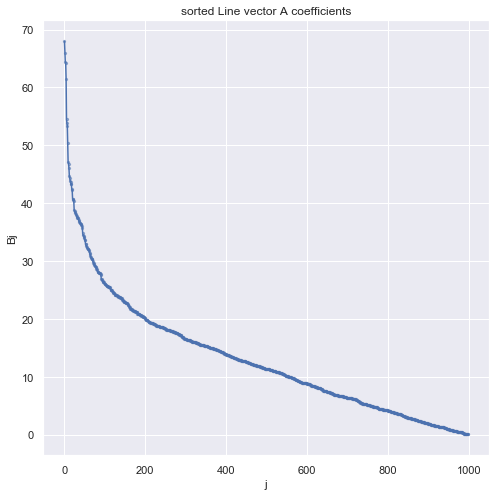

In [421]:
#sorting in descending order
sort_linevector_A_best = np.asarray(np.abs(linevector_A_best))[0]
sort_linevector_A_best[::-1].sort()

sort_linevector_A_best[0:10]

fig, ax = plt.subplots(figsize=krr_radial.f_size)

ax.plot(np.arange(1,sort_linevector_A_best.shape[0]+1),sort_linevector_A_best,  '-')
ax.scatter(np.arange(1,sort_linevector_A_best.shape[0]+1),sort_linevector_A_best, c='b',s=5, alpha=.5)
ax.set(title = 'sorted Line vector A coefficients', xlabel = 'j', ylabel = 'Bj')
       
plt.show()


In [422]:

# 4.3.Compute the ratios bj = (B1 + ... + Bj)/(B1 + ...+Bm)and plot the increasing curve bj versus j


ratio_sorted_lv_A = sort_linevector_A_best.cumsum()/sort_linevector_A_best.sum()
# Where does Bj>.99
a_idx = np.where(ratio_sorted_lv_A>.99)[0][0] #gets the index
a = ratio_sorted_lv_A[a_idx] #gets the value at index
print('At linevector coef bj', (a_idx+1),'THR = Bj = ', format(sort_linevector_A_best[a_idx], '.2f'),
      'we get a ratio of', format(a, '.2%'))

val_threshold = sort_linevector_A_best[a_idx]
val_threshold

At linevector coef bj 882 THR = Bj =  2.27 we get a ratio of 99.00%


2.2681421208578754

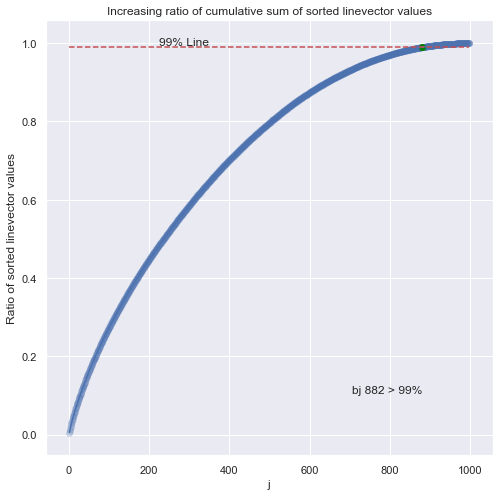

In [424]:
# 4.4.Compute the smaller j such that bj > 99%. and the corresponding threshold value THR = Bj 

fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.plot(np.arange(1,sort_linevector_A_best.shape[0]+1),ratio_sorted_lv_A,  '-')
ax.scatter(np.arange(1,sort_linevector_A_best.shape[0]+1),ratio_sorted_lv_A, c='b', alpha=.2)

ax.scatter(a_idx, a, c='green', alpha=1)
ax.plot(range(len(ratio_sorted_lv_A)), [.99]*sort_linevector_A_best.shape[0], 'r--', alpha=1)
ax.text(350,a,'99% Line', horizontalalignment = 'right', verticalalignment = 'bottom')
ax.text(a_idx,.1,'bj {0} > 99%'.format(a_idx+1),
        horizontalalignment = 'right', verticalalignment = 'bottom')

ax.set(title = 'Increasing ratio of cumulative sum of sorted linevector values',
       xlabel = 'j', ylabel = 'Ratio of sorted linevector values')
       
plt.show()


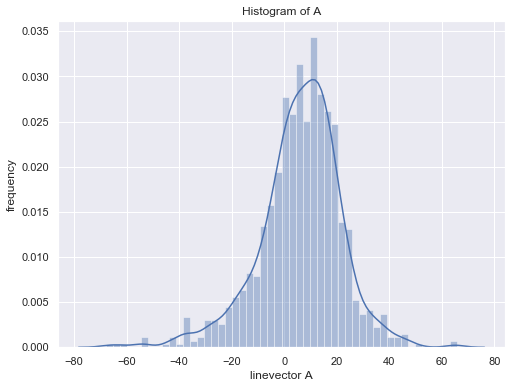

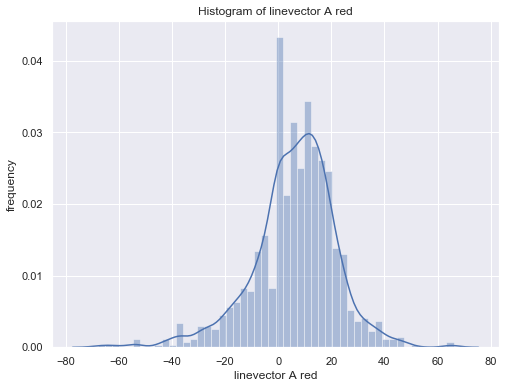

In [425]:
# 4.5. For i =1... m, if |Ai|> THR set AAi = Ai   and otherwise set AAi = 0. This yields a reduced formula 
# PRED(x)  = AA1 K(x, X(1)) + ... + AAm K(x,X(m))


#linevector_A_red = np.where(np.abs(linevector_A_best)>val_threshold,linevector_A_best,0)
linevector_A_red = linevector_A_best.copy()
linevector_A_red[np.abs(linevector_A_red)<val_threshold] = 0 


ax = sns.distplot(linevector_A_best,label= 'linevector A ', bins =50)
ax.set(title = 'Histogram of A',
      xlabel = 'linevector A', ylabel = 'frequency')
      #  xticks = np.arange(1,gramian_eig_val.shape[0]+1))
       
plt.show()

ax = sns.distplot(linevector_A_red, bins =50)
ax.set(title = 'Histogram of linevector A red',
      xlabel = 'linevector A red', ylabel = 'frequency')
      #  xticks = np.arange(1,gramian_eig_val.shape[0]+1))
       
plt.show()

# pd.DataFrame(np.asarray(linevector_A_red)[0]).to_excel('linevector_A_red.xlsx')


In [426]:
filepath = 'linevector_comp.xlsx'
with ExcelWriter(filepath) as writer:
    pd.DataFrame(linevector_A_best.T).to_excel(writer,sheet_name = 'linevector_A_best' )
    pd.DataFrame(linevector_A_red.T).to_excel(writer,sheet_name = 'linevector_A_red' )
    writer.save() 

In [427]:

sum(sum(np.asarray(linevector_A_red!=0)))

print('number of non-zero Ais in reduced linevector A are: ',sum(sum(np.asarray(linevector_A_red!=0))),
      ' out of ',linevector_A_red.shape[1])


number of non-zero Ais in reduced linevector A are:  882  out of  998


best_params:  {'lambda': [0.0206], 'gamma': [0.0005]}
#####performance of reduced linevector on Train data#####


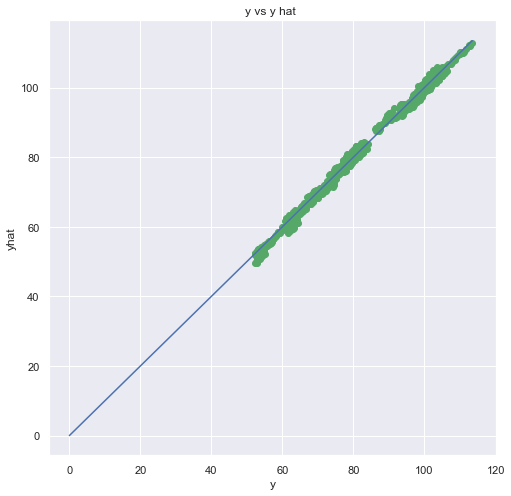

val_rmse:  1.0563
ratio rmse/avy :  0.0131
sigma:  0.0036
For 95% confidence level, confidence interval for ratio 0.0131 is [0.006, 0.0202]


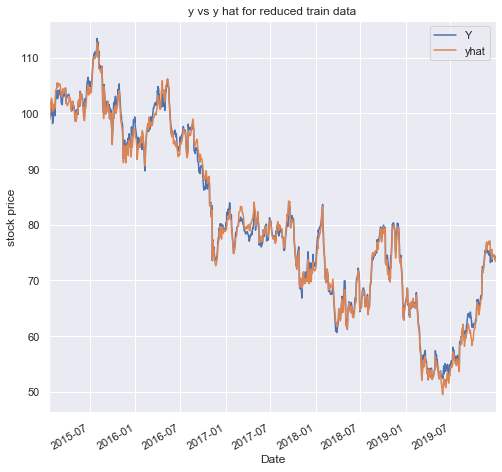

#####performance of reduced linevector on Test data#####


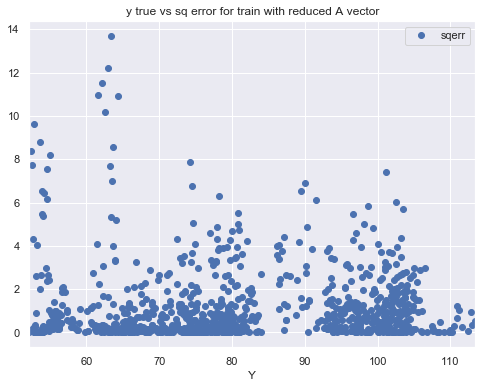

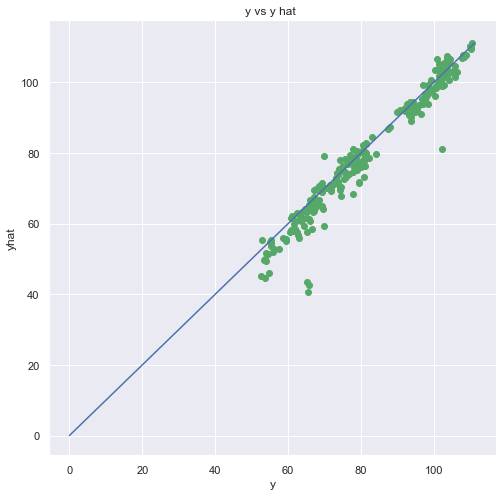

val_rmse:  4.134
ratio rmse/avy :  0.0508
sigma:  0.0139
For 95% confidence level, confidence interval for ratio 0.0508 is [0.0236, 0.078]


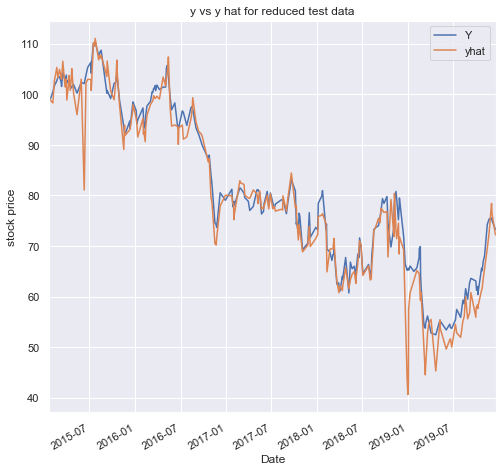

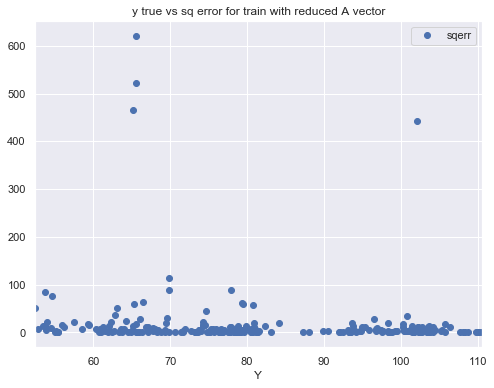

In [428]:
# 4.6. Run this reduced formula on the TRAIN and TEST sets to evaluate its performances

print('best_params: ',best_params)

#calc y_predictions for train set for best parameters with reduced linevector A
print('#####performance of reduced linevector on Train data#####')
val_rmse_test,ratio_rmse_avy_test,mat_y_pred_train_red = krr_radial.cal_performance_params(
    best_params['gamma'][0],linevector_A_red,krr_radial.df_train,krr_radial.df_train)

df_train_reduced_lv = krr_radial.df_train.copy()
df_train_reduced_lv['yhat'] = np.asarray(mat_y_pred_train_red.T)

krr_radial.plot_results(df_train_reduced_lv,title= 'y vs y hat for reduced train data')

#train data wiht reduced linevector A - true vs error plot
df_train_reduced_lv['sqerr'] = np.asarray(np.square(df_train_reduced_lv['Y']-df_train_reduced_lv['yhat']))
df_train_reduced_lv.plot('Y','sqerr',style='o',title = 'y true vs sq error for train with reduced A vector')


print('#####performance of reduced linevector on Test data#####')
val_rmse_test,ratio_rmse_avy_test,mat_y_pred_test_red = krr_radial.cal_performance_params(
    best_params['gamma'][0],linevector_A_red,krr_radial.df_test,krr_radial.df_train)

df_test_reduced = krr_radial.df_test.copy()
df_test_reduced['yhat'] = np.asarray(mat_y_pred_test_red.T)

krr_radial.plot_results(df_test_reduced,title= 'y vs y hat for reduced test data')

#test data with reduced linevector A - true vs error plot
df_test_reduced['sqerr'] = np.asarray(np.square(df_test_reduced['Y']-df_test_reduced['yhat']))
df_test_reduced.plot('Y','sqerr',style='o',title = 'y true vs sq error for train with reduced A vector')

In [ ]:
# 4.7.Compare these performances to the original formula pred(x) and interpret the results

###pre-existing model prediction for train data###
rmse_model_train:  0.3480605198649085
ratio rmse/avy:  0.0043
sigma:  0.0021
For 95% confidence level, confidence interval for ratio 0.0043 is [0.0002, 0.0084]


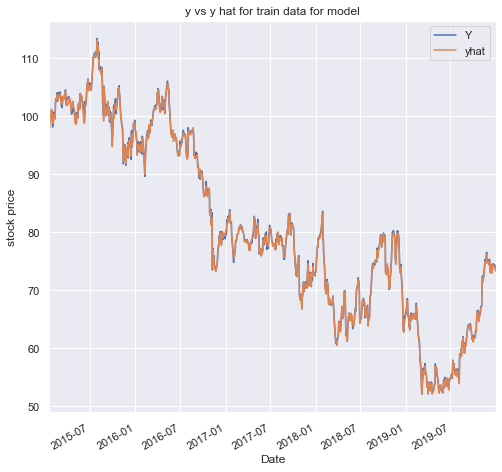

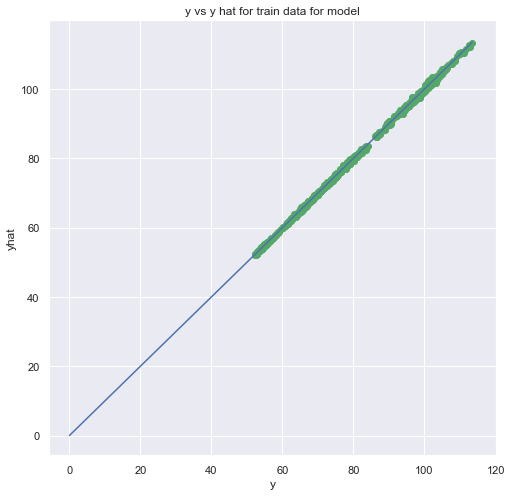

###pre-existing model prediction for test data###
rmse:  3.9934411963874537
ratio rmse/avy:  0.0491
sigma:  0.0137
For 95% confidence level, confidence interval for ratio 0.0491 is [0.0222, 0.076]


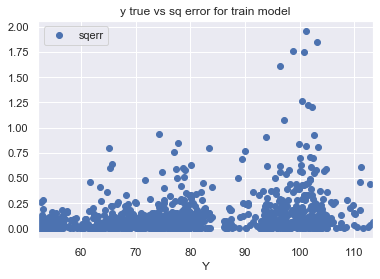

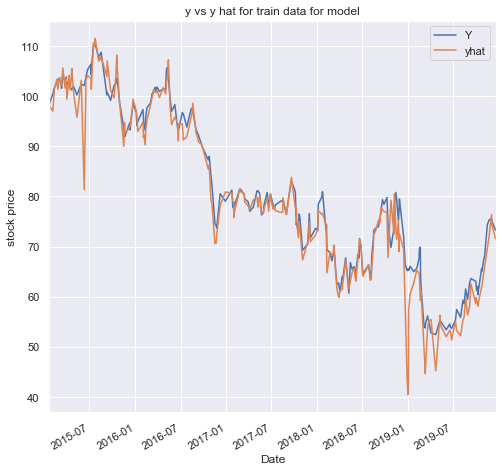

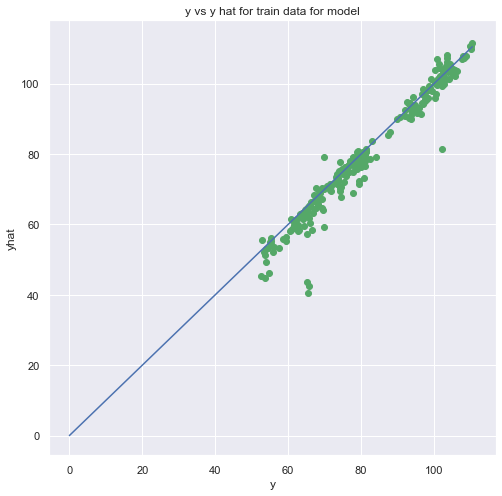

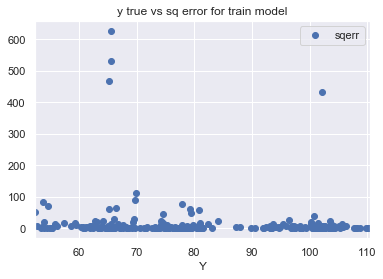

In [435]:
#Question 5 (optional): Implement KRR using a pre existing function

# 5.1. using the best parameters found above try to use a pre-existing software function implementing the KRR technique


best_params

clf = KernelRidge(alpha=best_params['lambda'][0],kernel = 'rbf',gamma = best_params['gamma'][0])
clf.fit(krr_radial.df_train.loc[:,'X1':'X101'], krr_radial.df_train.loc[:,'Y'])


#pre-existing model prediction for train data
print('###pre-existing model prediction for train data###')
pred_y = clf.predict(krr_radial.df_train.loc[:,'X1':'X101'])
rmse_model_train = krr_radial.cal_rmse(krr_radial.df_train.loc[:,'Y'],pred_y)
print('rmse_model_train: ',rmse_model_train)
#print('cal_performance_params variable mat_pred_x:\n',mat_pred_x)
#reshaping arguments for RMSE
mat_y_true = np.asmatrix(krr_radial.df_train['Y'])
mat_y_pred = np.asmatrix(pred_y).reshape(mat_y_true.shape)

#calculate ratio RMSE/avy for test
val_avy_test = np.mean(np.abs(mat_y_true))
ratio_rmse_avy_test = np.around(rmse_model_train/val_avy_test,4)
print('ratio rmse/avy: ',ratio_rmse_avy_test)

confint_ratio_test = krr_radial.err_est_element(ratio_rmse_avy_test,krr_radial.df_train['Y'].shape[0],False)

print('For 95% confidence level, confidence interval for ratio {0} is {1}'.format(ratio_rmse_avy_test,
                                                                                  confint_ratio_test))

df_train_model = krr_radial.df_train.copy()
df_train_model['yhat'] = np.asarray(pred_y)

krr_radial.plot_results(df_train_model,title= 'y vs y hat for train data for model')

#plotting y vs yhat for test for best parameters for reduced LV
xlim = np.min(df_train_model['Y'])
ylim = np.max(df_train_model['Y'])
fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.plot( [0,ylim],[0,ylim] )
ax.scatter(df_train_model['Y'],df_train_model['yhat'],c = 'g')
ax.set(title = 'y vs y hat for train data for model' , xlabel = 'y', ylabel = 'yhat')
plt.show()

#test data with reduced linevector A - true vs error plot
df_train_model['sqerr'] = np.asarray(np.square(df_train_model['Y']-df_train_model['yhat']))
df_train_model.plot('Y','sqerr',style='o',title = 'y true vs sq error for train model')

#model prediction for test data
print('###pre-existing model prediction for test data###')
pred_y = clf.predict(krr_radial.df_test.loc[:,'X1':'X101'])
rmse_model_test = krr_radial.cal_rmse(krr_radial.df_test.loc[:,'Y'],pred_y)

#print('cal_performance_params variable mat_pred_x:\n',mat_pred_x)
#reshaping arguments for RMSE
mat_y_true = np.asmatrix(krr_radial.df_test['Y'])
mat_y_pred = np.asmatrix(pred_y).reshape(mat_y_true.shape)

#calculate ratio RMSE/avy for test
val_avy_test = np.mean(np.abs(mat_y_true))
ratio_rmse_avy_test = np.around(rmse_model_test/val_avy_test,4)
print('rmse: ',rmse_model_test)
print('ratio rmse/avy: ',ratio_rmse_avy_test)

confint_ratio_test = krr_radial.err_est_element(ratio_rmse_avy_test,krr_radial.df_test['Y'].shape[0],False)

print('For 95% confidence level, confidence interval for ratio {0} is {1}'.format(ratio_rmse_avy_test,
                                                                                  confint_ratio_test))

df_test_model = krr_radial.df_test.copy()
df_test_model['yhat'] = np.asarray(pred_y)

krr_radial.plot_results(df_test_model,title= 'y vs y hat for train data for model')

#plotting y vs yhat for test for best parameters for reduced LV

ylim = np.max(df_test_model['Y'])
fig, ax = plt.subplots(figsize=krr_radial.f_size)
ax.plot( [0,ylim],[0,ylim] )
ax.scatter(df_test_model['Y'],df_test_model['yhat'],c = 'g')
ax.set(title = 'y vs y hat for train data for model' , xlabel = 'y', ylabel = 'yhat')
plt.show()

#test data with reduced linevector A - true vs error plot
df_test_model['sqerr'] = np.asarray(np.square(df_test_model['Y']-df_test_model['yhat']))
df_test_model.plot('Y','sqerr',style='o',title = 'y true vs sq error for train model')
